# IMA Math-to-Industry Bootcamp Final Project

### 3M Data Science Challenge, July 2018
#### <font color='teal'>  Author: Michelle Pinharry, University of Minnesota </font>

[This link](https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+under+dynamic+gas+mixtures) describes the dataset and has data available for download. This should download a zip file. One must first rename this to `data.zip` and put it in the directory of this notebook. Next, extract the data, which should result in a folder names `data` with two data files in it. These are text files.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imp
import numpy as np

%matplotlib inline

<font color='red'> Update </font> All the custom functions needed to run this notebook can be imported from the python script below 

In [2]:
import IMA_3M_DataScienceChallenge as ima3m

## Day 1, 07/19 - Data Exploration

Let us begin by reading the data set. Please note that this assumes that a `data` folder exists in the directory where you are executing this notebook. You could easily change the path to point to wherever you extracted the data.

In [3]:
# Change this if you don't extract the data folder to the notebook location
data_location = 'data/ethylene_CO.txt'

# The header in the data file doesn't name each column, so we'll do it for them
names = ['timestamp', 'CO_conc', 'ethylene_conc', 'TGS2602_1', 'TGS2602_2', 'TGS2600_1', 'TGS2600_2', 'TGS2610_1',
         'TGS2610_2', 'TGS2620_1', 'TGS2620_2', 'TGS2602_3', 'TGS2602_4', 'TGS2600_3', 'TGS2600_4', 'TGS2610_3', 
         'TGS2610_4', 'TGS2620_3', 'TGS2620_4']

data_df = pd.read_csv(data_location, delim_whitespace=True, names=names, header=0)

# Let us check out the first few items
data_df.head()

timestamp  CO_conc  ethylene_conc  TGS2602_1  TGS2602_2  TGS2600_1  \
0       0.00      0.0            0.0     -50.85      -1.95     -41.82   
1       0.01      0.0            0.0     -49.40      -5.53     -42.78   
2       0.01      0.0            0.0     -40.04     -16.09     -27.59   
3       0.03      0.0            0.0     -47.14     -10.57     -32.28   
4       0.04      0.0            0.0     -33.58     -20.79     -33.25   

   TGS2600_2  TGS2610_1  TGS2610_2  TGS2620_1  TGS2620_2  TGS2602_3  \
0       1.30      -4.07     -28.73     -13.49      -3.25   55139.95   
1       0.49       3.58     -34.55      -9.59       5.37   54395.77   
2       0.00      -7.16     -42.14     -12.52      -5.86   53960.02   
3       4.40     -11.22     -37.94      -7.16      -1.14   53047.71   
4       6.03       3.42     -34.22     -14.46       8.31   52700.28   

   TGS2602_4  TGS2600_3  TGS2600_4  TGS2610_3  TGS2610_4  TGS2620_3  TGS2620_4  
0   50669.50    9626.26    9762.62   24544.02   21420.68    7650.61    6928.42  
1   50046.91    9433.20    9591.21   24137.13   20930.33    7498.79    6800.66  
2   49299.30    9324.40    9449.81   23628.90   20504.94    7369.67    6697.47  
3   48907.00    9170.64    9305.58   23101.66   20101.42    7285.13    6578.52  
4   48330.96    9073.64    9163.47   22689.54   19694.07    7156.74    6468.32

Let us also check out the dimensions of our dataset

In [5]:
data_df.shape

(4208261, 19)

First, let us plot the four different types of sensors together. Note that we only do that over a small chunk of the data, just to get a sense of what the readings look like.

From this, we notice that all of the types of sensors pick up on both gases, although some are seemingly more sensitive to one gas over the other.

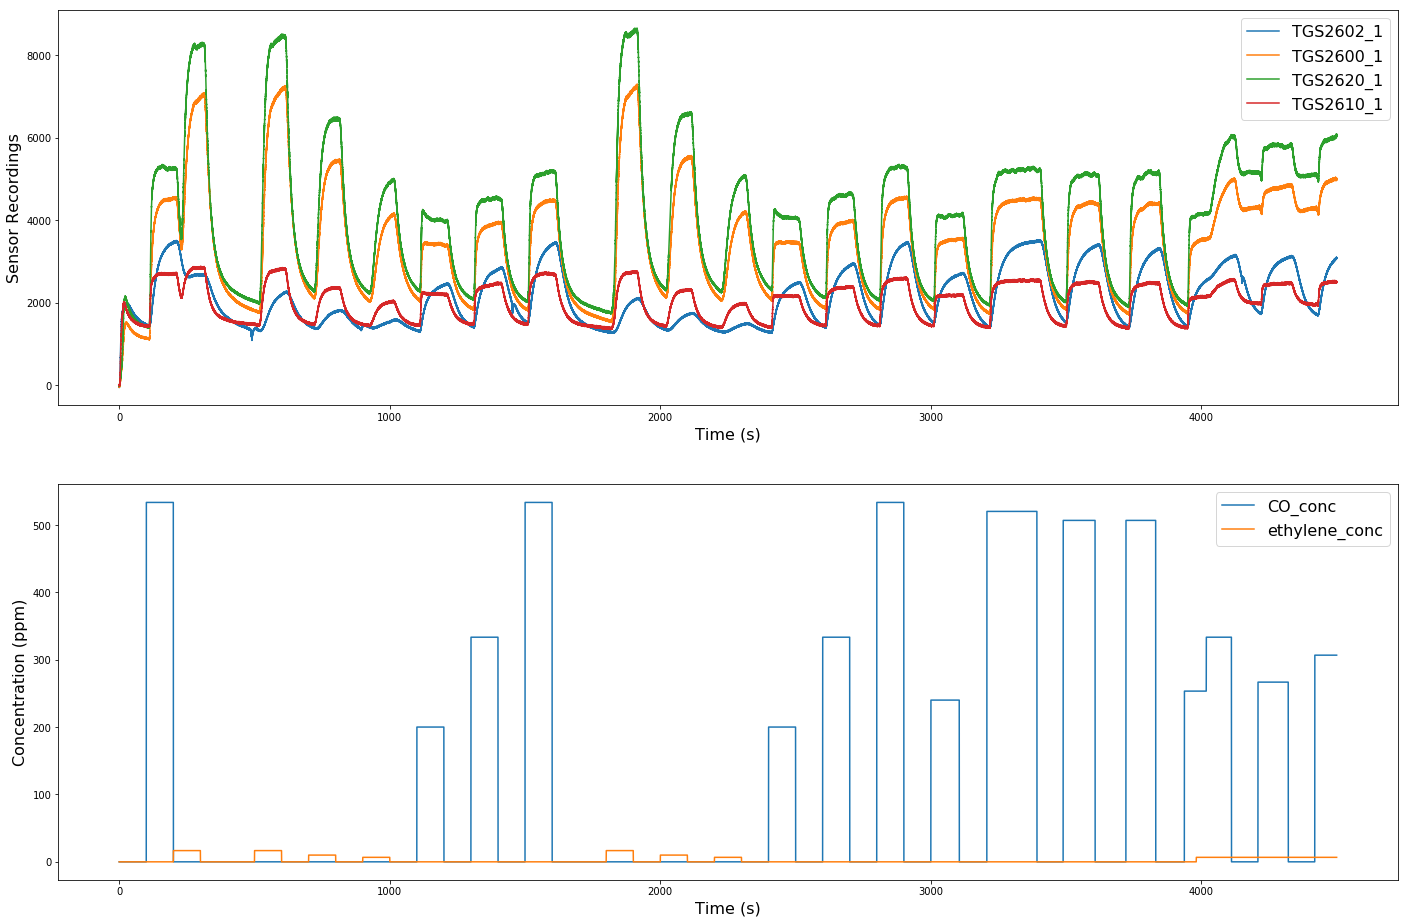

In [6]:
trimmed_data = data_df.head(450000) #Keep a chunk of the data
cols_to_keep = ['TGS2602_1', 'TGS2600_1', 'TGS2620_1', 'TGS2610_1', 'CO_conc','ethylene_conc']
timestamp = trimmed_data['timestamp']
trimmed_data = trimmed_data[cols_to_keep]

plt.figure(figsize=(24,16))
plt.subplot(2,1,1)
plt.plot(timestamp, trimmed_data[['TGS2602_1', 'TGS2600_1','TGS2620_1', 'TGS2610_1']])
plt.legend(['TGS2602_1', 'TGS2600_1','TGS2620_1', 'TGS2610_1'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Sensor Recordings', fontsize=16)

plt.subplot(2,1,2)
plt.plot(timestamp, trimmed_data[['CO_conc','ethylene_conc']])
plt.legend(['CO_conc','ethylene_conc'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)


plt.show()

Next, let us plot the different replicates of each type together.

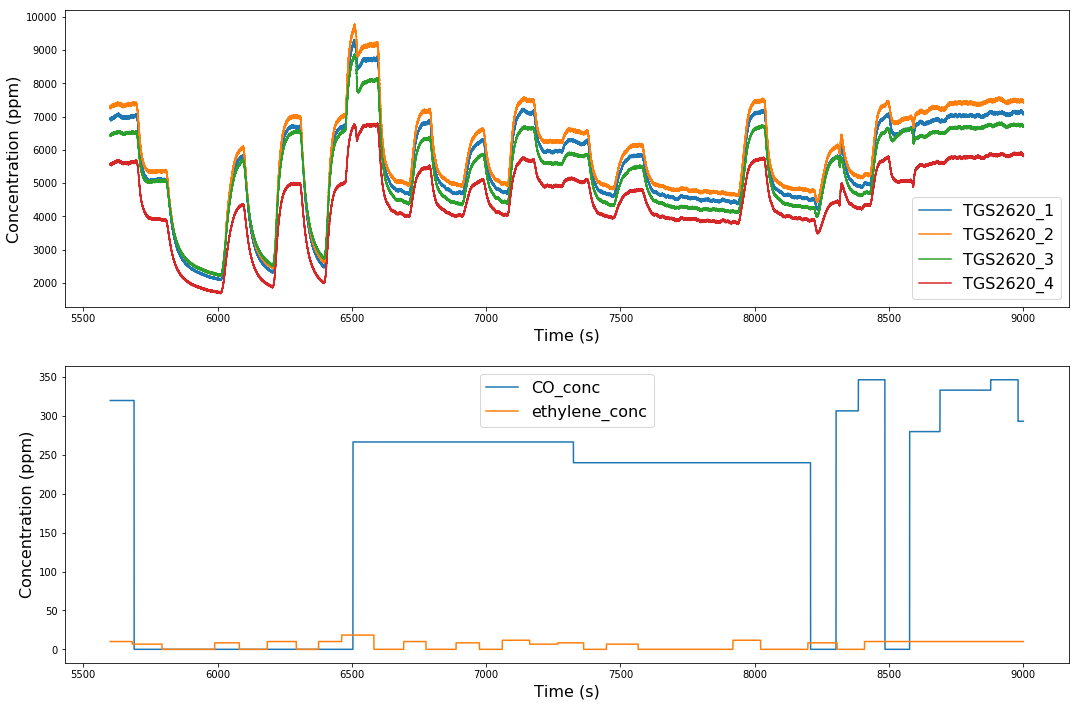

In [8]:
# TGS2620

trimmed_data = data_df.loc[560000:900000]
cols_to_keep = ['TGS2620_1', 'TGS2620_2', 'TGS2620_3', 'TGS2620_4', 'CO_conc','ethylene_conc']
timestamp = trimmed_data['timestamp']
trimmed_data = trimmed_data[cols_to_keep]

plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.plot(timestamp, trimmed_data[['TGS2620_1', 'TGS2620_2', 'TGS2620_3', 'TGS2620_4']])
plt.legend(['TGS2620_1', 'TGS2620_2', 'TGS2620_3', 'TGS2620_4'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)

plt.subplot(2,1,2)
plt.plot(timestamp, trimmed_data[['CO_conc','ethylene_conc']])
plt.legend(['CO_conc','ethylene_conc'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)


plt.show()

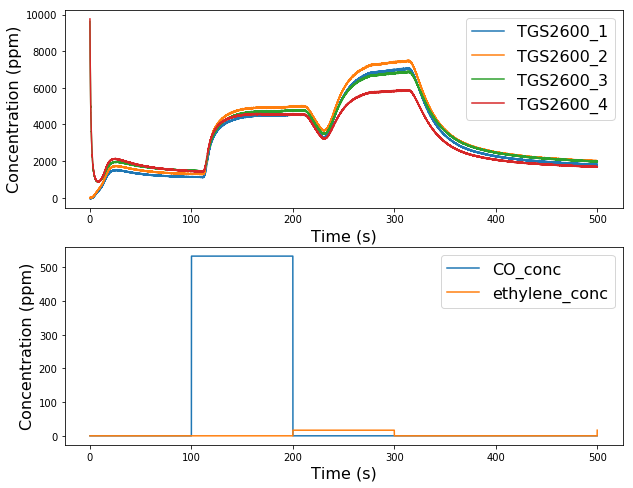

In [9]:
# TGS2600

trimmed_data = data_df.loc[0:50000]
cols_to_keep = ['TGS2600_1', 'TGS2600_2', 'TGS2600_3', 'TGS2600_4', 'CO_conc','ethylene_conc']
timestamp = trimmed_data['timestamp']
trimmed_data = trimmed_data[cols_to_keep]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(timestamp, trimmed_data[['TGS2600_1', 'TGS2600_2', 'TGS2600_3', 'TGS2600_4']])
plt.legend(['TGS2600_1', 'TGS2600_2', 'TGS2600_3', 'TGS2600_4'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)

plt.subplot(2,1,2)
plt.plot(timestamp, trimmed_data[['CO_conc','ethylene_conc']])
plt.legend(['CO_conc','ethylene_conc'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)


plt.show()

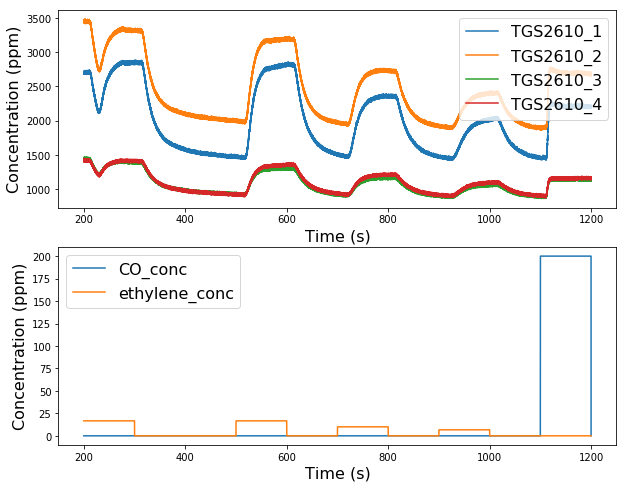

In [10]:
#TGS2610

trimmed_data = data_df.loc[20000:120000]
cols_to_keep = ['TGS2610_1', 'TGS2610_2', 'TGS2610_3', 'TGS2610_4', 'CO_conc','ethylene_conc']
timestamp = trimmed_data['timestamp']
trimmed_data = trimmed_data[cols_to_keep]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(timestamp, trimmed_data[['TGS2610_1', 'TGS2610_2', 'TGS2610_3', 'TGS2610_4']])
plt.legend(['TGS2610_1', 'TGS2610_2', 'TGS2610_3', 'TGS2610_4'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)

plt.subplot(2,1,2)
plt.plot(timestamp, trimmed_data[['CO_conc','ethylene_conc']])
plt.legend(['CO_conc','ethylene_conc'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)


plt.show()

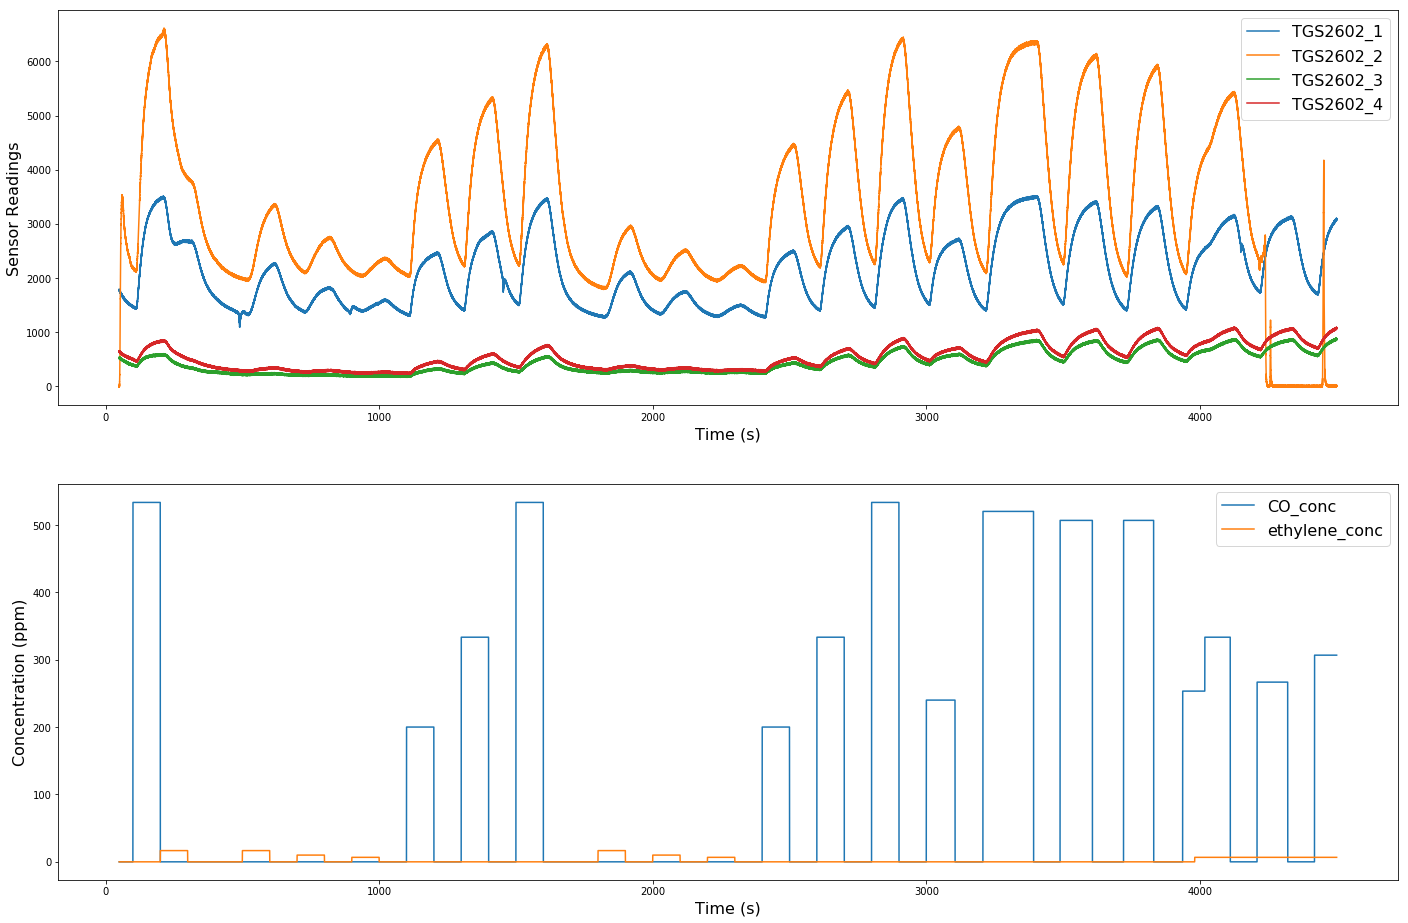

In [11]:
# TGS2602

trimmed_data = data_df.loc[5000:450000]
cols_to_keep = ['TGS2602_1', 'TGS2602_2', 'TGS2602_3', 'TGS2602_4', 'CO_conc','ethylene_conc']
timestamp = trimmed_data['timestamp']
trimmed_data = trimmed_data[cols_to_keep]

plt.figure(figsize=(24,16))
plt.subplot(2,1,1)
plt.plot(timestamp, trimmed_data[['TGS2602_1', 'TGS2602_2', 'TGS2602_3', 'TGS2602_4']])
plt.legend(['TGS2602_1', 'TGS2602_2', 'TGS2602_3', 'TGS2602_4'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Sensor Readings', fontsize=16)

plt.subplot(2,1,2)
plt.plot(timestamp, trimmed_data[['CO_conc','ethylene_conc']])
plt.legend(['CO_conc','ethylene_conc'], fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Concentration (ppm)', fontsize=16)


plt.show()

### <font color='blue' > Observations </font>
* The different types of sensors behave differently. For example, some of them have 'tableau like' readings, while others have readings that look more like shark fins.
* They all pick up changeds in the gas concentrations, but do not distinguish between the two gases.
* The different replicates can also exhibit different behaviours. For example, some of them have different "amplitudes" and others barely detect changes (e.g. TGS2602 reps 3 & 4 above
* There seems to be a lag between the sensor change-points and the true concentration check points

### <font color='orange'> Idea </font>
* Detect change-points and compute lag
* Extract features from sub-time-series (perhaps using tsfresh)
* Train regression model (e.g. SVR) using by treating each subtimesies as individual 

## Day 2, 07/20 - Change point Detection

In [4]:
# Sort data by timestamp
# Note that there are dublicate time stamps

sorted_data=data_df.sort_values(by=["timestamp"])
sorted_data.head(10)

timestamp  CO_conc  ethylene_conc  TGS2602_1  TGS2602_2  TGS2600_1  \
0       0.00      0.0            0.0     -50.85      -1.95     -41.82   
1       0.01      0.0            0.0     -49.40      -5.53     -42.78   
2       0.01      0.0            0.0     -40.04     -16.09     -27.59   
3       0.03      0.0            0.0     -47.14     -10.57     -32.28   
4       0.04      0.0            0.0     -33.58     -20.79     -33.25   
5       0.05      0.0            0.0     -48.59     -11.54     -36.16   
6       0.06      0.0            0.0     -48.27      -9.11     -31.31   
7       0.07      0.0            0.0     -47.14      -4.56     -16.57   
8       0.07      0.0            0.0     -42.30      -2.77     -20.79   
9       0.09      0.0            0.0     -44.56       3.58     -45.04   

   TGS2600_2  TGS2610_1  TGS2610_2  TGS2620_1  TGS2620_2  TGS2602_3  \
0       1.30      -4.07     -28.73     -13.49      -3.25   55139.95   
1       0.49       3.58     -34.55      -9.59       5.37   54395.77   
2       0.00      -7.16     -42.14     -12.52      -5.86   53960.02   
3       4.40     -11.22     -37.94      -7.16      -1.14   53047.71   
4       6.03       3.42     -34.22     -14.46       8.31   52700.28   
5       6.03       0.33     -29.05     -16.74      -1.14   51910.52   
6       5.37      -7.97     -30.34      -8.62       7.00   51458.44   
7       4.40      -2.28     -24.35     -13.17      -6.34   51043.22   
8      23.98      -2.12     -27.59      -6.83      -0.81   50353.63   
9       2.77      -0.65     -35.52      -7.64      -6.34   49853.87   

   TGS2602_4  TGS2600_3  TGS2600_4  TGS2610_3  TGS2610_4  TGS2620_3  TGS2620_4  
0   50669.50    9626.26    9762.62   24544.02   21420.68    7650.61    6928.42  
1   50046.91    9433.20    9591.21   24137.13   20930.33    7498.79    6800.66  
2   49299.30    9324.40    9449.81   23628.90   20504.94    7369.67    6697.47  
3   48907.00    9170.64    9305.58   23101.66   20101.42    7285.13    6578.52  
4   48330.96    9073.64    9163.47   22689.54   19694.07    7156.74    6468.32  
5   47609.00    8982.88    9021.08   22159.12   19332.57    7067.61    6385.31  
6   47047.36    8860.51    8966.48   21931.81   19027.69    6976.13    6300.97  
7   46757.50    8776.93    8868.04   21504.46   18780.21    6900.01    6248.81  
8   46196.84    8709.46    8775.21   21124.62   18439.18    6827.34    6183.33  
9   45652.18    8623.26    8682.15   20835.63   18209.37    6789.64    6101.90

The first thing we do is to de-noise that data with the Savitzky-Golay filter. Let us try out this out on a small part of the data set.

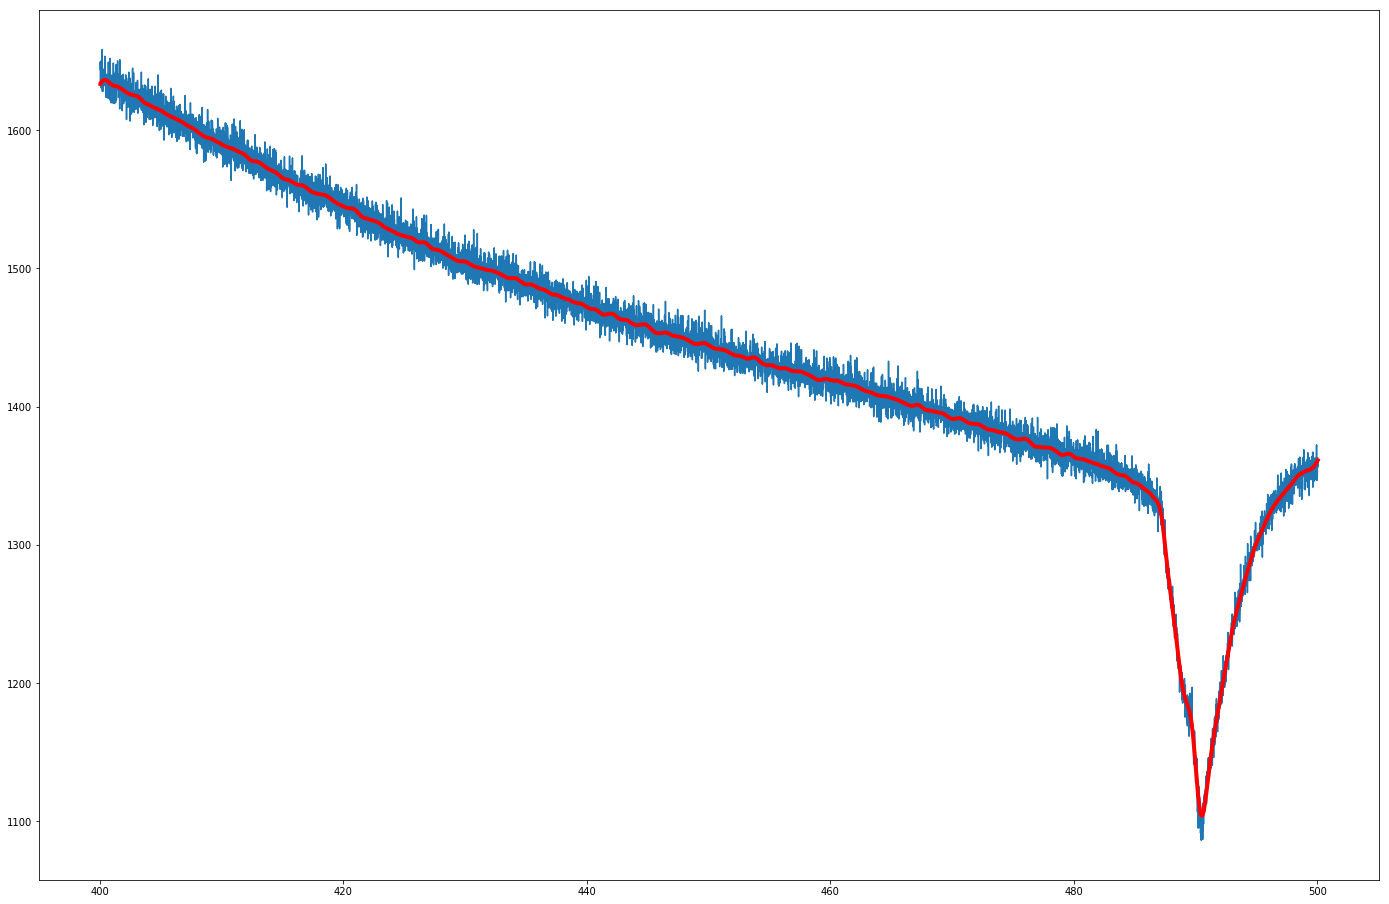

In [8]:
import numpy as np

x1=sorted_data.T.values[0]
y1=sorted_data.T.values[3]
x=x1[40000:50000]
y=y1[40000:50000]

yhat = ima3m.savitzky_golay(y, 121,2) # window size 121, polynomial order 2
yhat2=ima3m.savitzky_golay(yhat,121,2)

plt.figure(1, figsize=(24,16))
plt.plot(x,y)
#plt.plot(x,yhat,color="green")

plt.plot(x,yhat2, color='red',linewidth=4)
plt.show()

Now that we have confirmed it works, let us smooth out the whole data set (denoising).

In [5]:
# Let's begin by creating a new data frame with the time stamp and concentrations.

df_smooth=sorted_data[['timestamp','CO_conc','ethylene_conc']]

# Add the smoothed out data for each sensor
for i in range(3,19):
    y=sorted_data.T.values[i]
    yhat = ima3m.savitzky_golay(y, 121,2) # window size 121, polynomial order 2
    yhat2= ima3m.savitzky_golay(yhat,121,2)
    df_smooth.loc[:,'TGS%d'%(i)]=yhat2
    
# Rename the data           
df_smooth=df_smooth.rename(columns={'TGS3':'TGS2602_1','TGS4':'TGS2602_2', 'TGS5':'TGS2600_1', 'TGS6':'TGS2600_2',
                                    'TGS7':'TGS2610_1','TGS8':'TGS2610_2', 'TGS9':'TGS2620_1', 'TGS10':'TGS2620_2',
                                    'TGS11':'TGS2602_3', 'TGS12':'TGS2602_4','TGS13':'TGS2600_3', 'TGS14':'TGS2600_4',
                                    'TGS15':'TGS2610_3','TGS16':'TGS2610_4', 'TGS17':'TGS2620_3', 'TGS18':'TGS2620_4'})
df_smooth.head()

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


timestamp  CO_conc  ethylene_conc  TGS2602_1  TGS2602_2  TGS2600_1  \
0       0.00      0.0            0.0 -50.910815  -9.751781 -42.008036   
1       0.01      0.0            0.0 -50.740598  -9.659271 -41.645882   
2       0.01      0.0            0.0 -50.570858  -9.565558 -41.284323   
3       0.03      0.0            0.0 -50.403961  -9.470220 -40.926286   
4       0.04      0.0            0.0 -50.239498  -9.373429 -40.571334   

   TGS2600_2  TGS2610_1  TGS2610_2  TGS2620_1  TGS2620_2     TGS2602_3  \
0   0.383720  -5.061016 -32.781043 -14.005055  -4.392945  47100.717473   
1   0.596123  -4.916461 -32.740674 -13.841490  -4.209484  47090.192109   
2   0.808279  -4.773812 -32.704906 -13.678901  -4.029301  47058.854228   
3   1.018602  -4.632992 -32.670217 -13.515183  -3.850801  47006.882166   
4   1.227685  -4.491543 -32.635824 -13.353972  -3.674461  46934.612351   

      TGS2602_4    TGS2600_3    TGS2600_4     TGS2610_3     TGS2610_4  \
0  42938.087841  8279.927608  8375.362079  19606.212759  17160.710845   
1  42928.839756  8278.730621  8374.157979  19602.054321  17157.191715   
2  42901.290530  8275.194656  8370.598048  19589.712336  17146.788136   
3  42855.711729  8269.355657  8364.730308  19569.368115  17129.640959   
4  42792.268578  8261.273505  8356.604286  19541.205733  17105.898699   

     TGS2620_3    TGS2620_4  
0  6463.898066  5852.572722  
1  6462.863066  5851.638563  
2  6459.805681  5848.873495  
3  6454.770608  5844.314041  
4  6447.790377  5838.000994

Next, we store the derivative approximations by finite differences. Note that the chosen step size (10) is a sensitive parameter. Anything lower and we might miss some peaks.

In [6]:
df_der=df_smooth[['timestamp','CO_conc','ethylene_conc']]
for i in range(3,19):
    df_der.loc[:,'der%d'%(i)]=df_smooth.iloc[:,[i]].shift(-10)-df_smooth.iloc[:,[i]] #Approximate by differences of step 10
df_der.head()


C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


timestamp  CO_conc  ethylene_conc      der3      der4      der5      der6  \
0       0.00      0.0            0.0  1.607790  1.001569  3.442252  2.051869   
1       0.01      0.0            0.0  1.583816  1.017064  3.392516  2.030537   
2       0.01      0.0            0.0  1.557179  1.033510  3.336247  2.007091   
3       0.03      0.0            0.0  1.528995  1.049002  3.276443  1.981566   
4       0.04      0.0            0.0  1.500667  1.066138  3.212932  1.952611   

       der7      der8      der9     der10        der11        der12  \
0  1.393011  0.361061  1.572657  1.719140 -1011.070933  -885.939888   
1  1.379073  0.357367  1.546582  1.700334 -1206.850835 -1057.117939   
2  1.367189  0.357649  1.518930  1.684166 -1399.607954 -1225.412731   
3  1.355574  0.357691  1.487653  1.666931 -1589.115464 -1390.749566   
4  1.341868  0.359262  1.459176  1.647363 -1775.197866 -1552.848527   

        der13       der14       der15       der16       der17       der18  
0 -111.935313 -112.118224 -388.292056 -327.273636  -96.441791  -87.194842  
1 -133.310069 -133.476410 -462.051075 -389.453920 -114.831421 -103.806706  
2 -154.223670 -154.356735 -534.017177 -450.156622 -132.815266 -120.045934  
3 -174.655639 -174.754346 -604.185347 -509.373650 -150.386572 -135.899886  
4 -194.625094 -194.668694 -672.552135 -567.068202 -167.535789 -151.374347

#### Next, we plot the derivatives against the concentrations for all sensors, grouped by replicates, to see which of them give good, clean peaks.

After doing this, we find that the following sensors are GOOD at detecting time steps (sharp peaks):
- 02, replicate 1
- 00, all replicates
- 10, replicates 1&2
- 20, all replicates


Note that these have different scaling factors for plotting (this just makes it easier to see the graphs)
- 02 rep 1: 450
- 00 reps 1&2, 10 reps 1&2, 20 rep 3: 250
- the rest of the good sensors: 100

From this we see that perhaps sensors 00 and 20 are better overall. Still not enough evidence to back this up though.

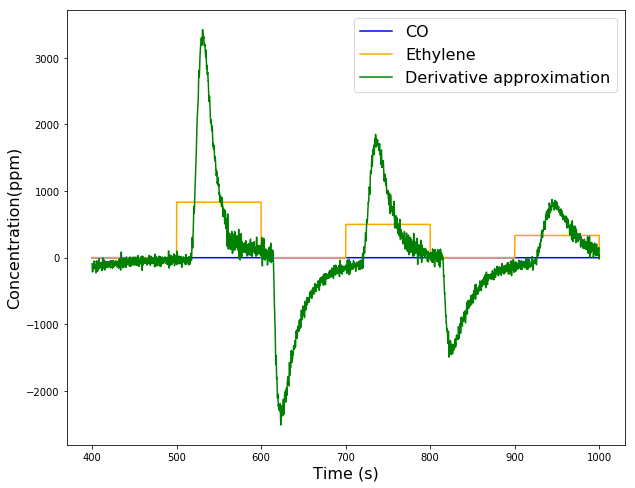

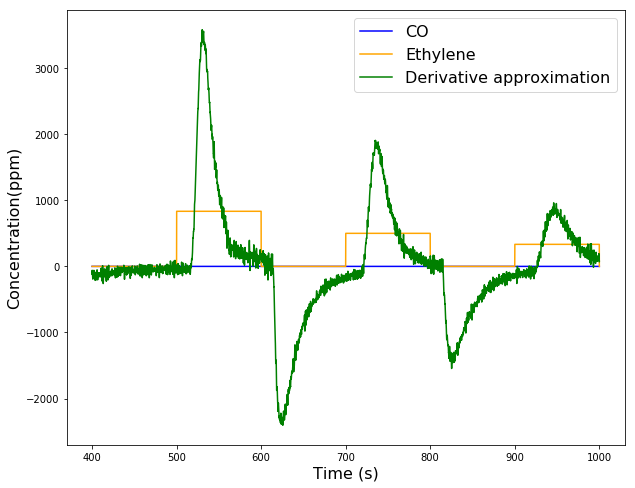

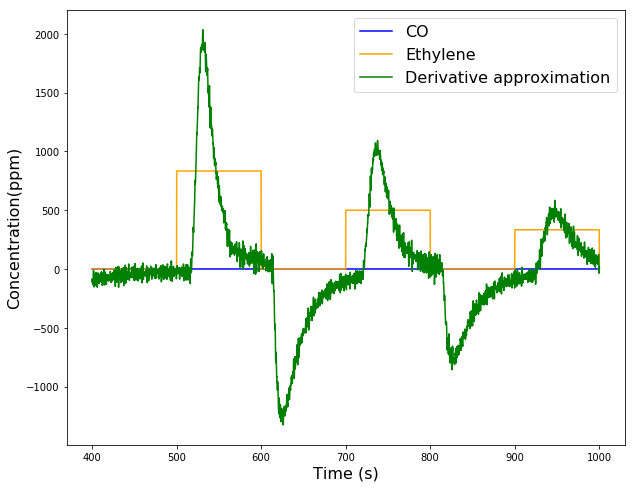

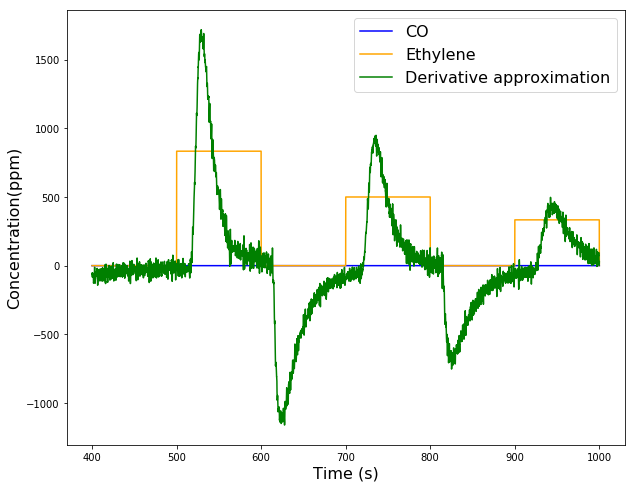

In [26]:
# Sensor 00

k=1
for i in [5,6]:
    ima3m.plot_der(i,40000,100000,150,df_smooth,df_der,k)
    k=k+1
    
for i in [13,14]:
    ima3m.plot_der(i,40000,100000,100,df_smooth,df_der,k)
    k=k+1

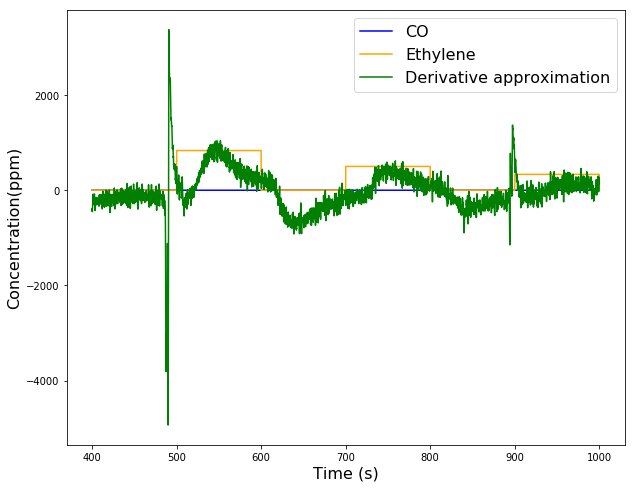

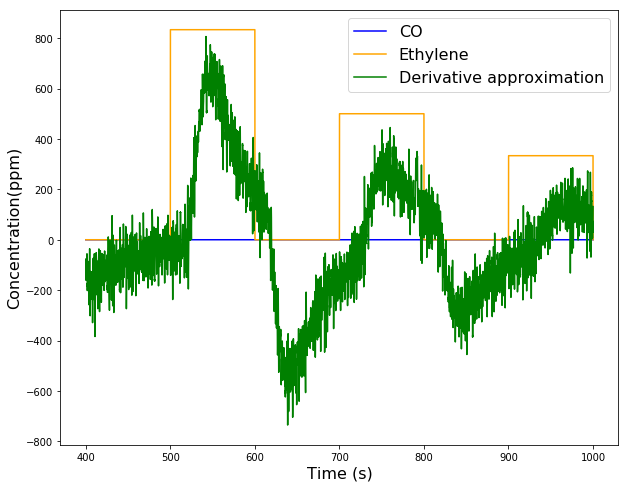

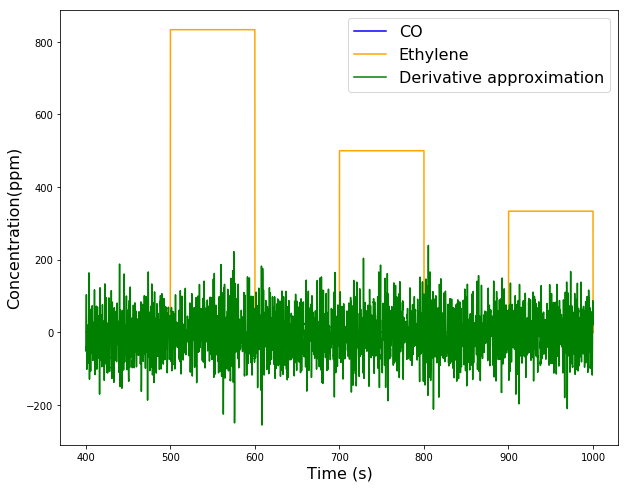

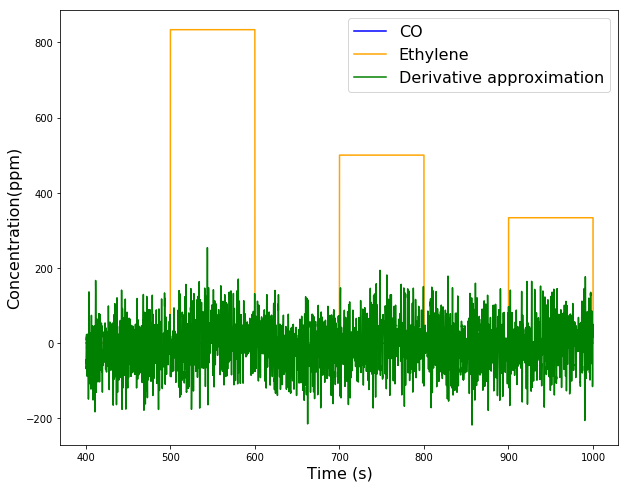

In [28]:
# Sensor 02 
# Seems pretty bad for time-step detection

ima3m.plot_der(3,40000,100000,450,df_smooth,df_der,1)
k=2
for i in [4,11,12]:
    ima3m.plot_der(i,40000,100000,250,df_smooth,df_der,k)
    k=k+1

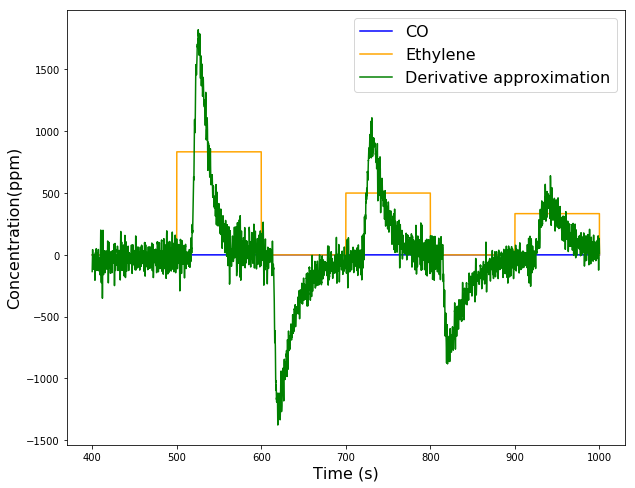

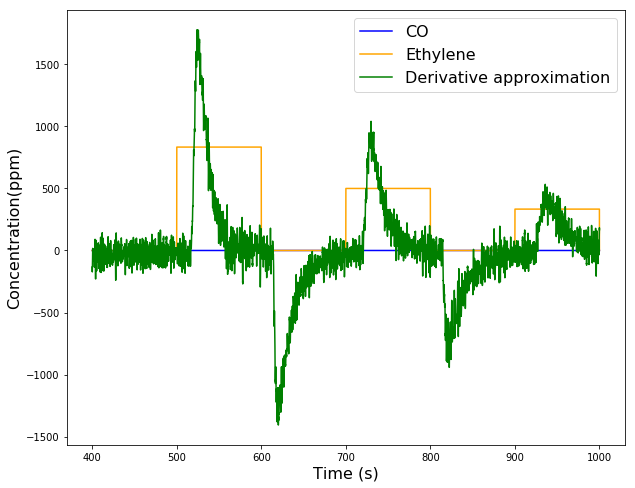

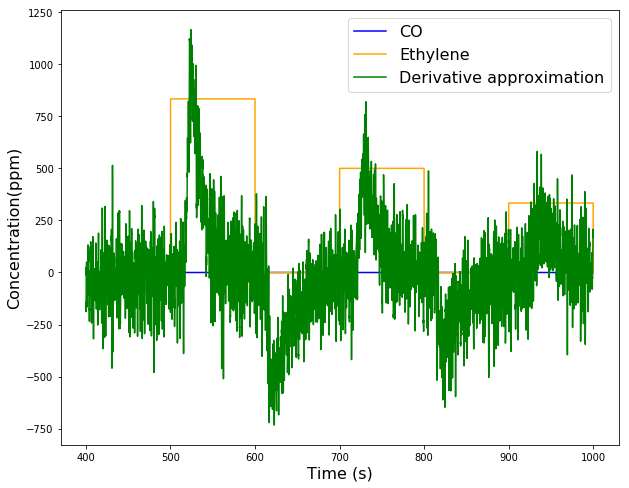

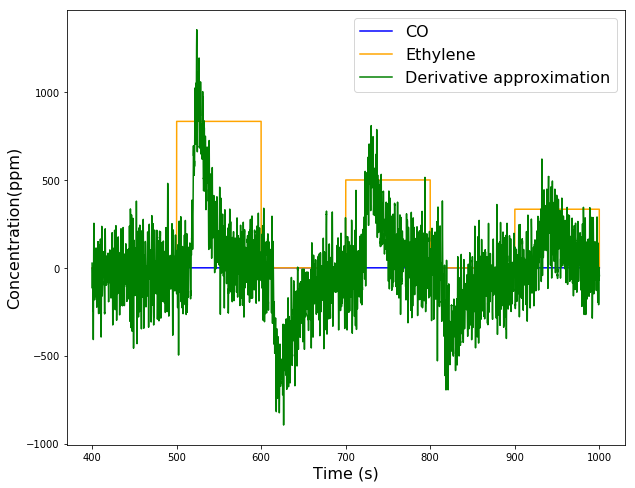

In [29]:
# Sensor 10 
# Seems rather weak at detecting change points

k=1
for i in [7,8]:
    ima3m.plot_der(i,40000,100000,250,df_smooth, df_der,k)
    k=k+1
    
for i in [15,16]:
    ima3m.plot_der(i,40000,100000,450,df_smooth, df_der,k)
    k=k+1

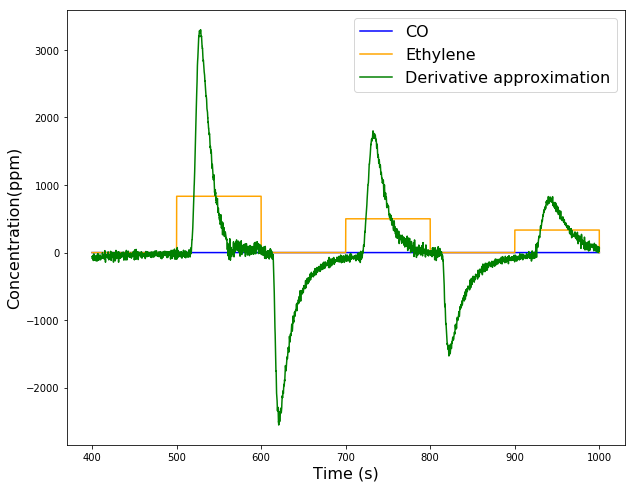

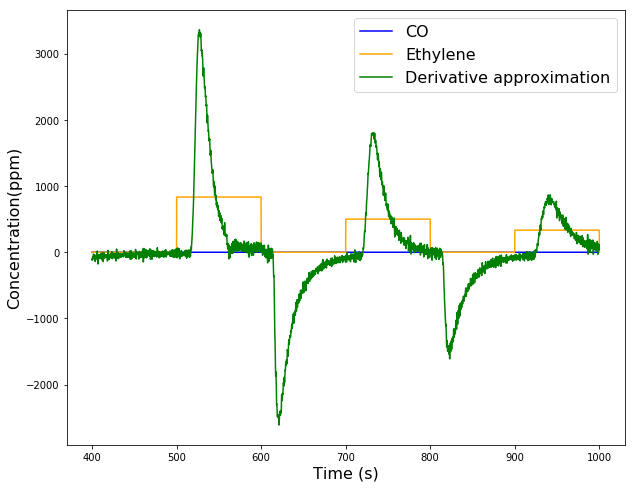

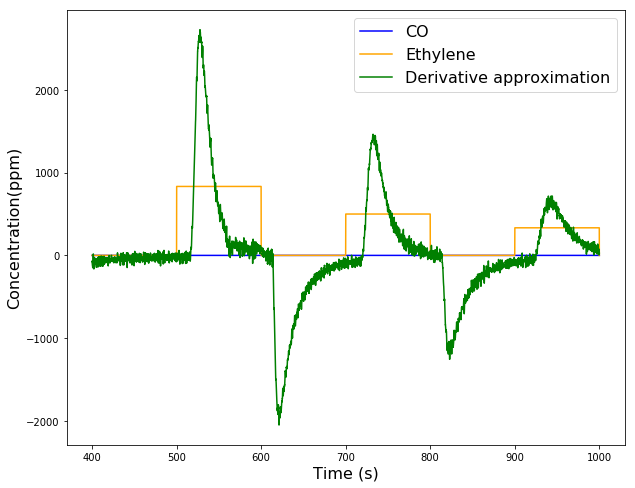

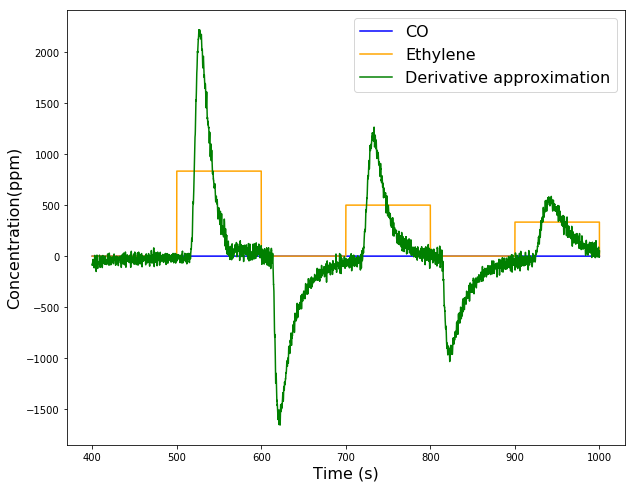

In [30]:
# Sensor 20 
# Seems pretty good at detecting change points

k=1
for i in [9,10,17,18]:
    ima3m.plot_der(i,40000,100000,100,df_smooth,df_der, k)
    k=k+1

\
\
### The next step is peak-detection

To do this, we try out a git-hub code, peakdetect. Keep in mind that we need to adjust the peak coordinates by the scaling factor when we plot.

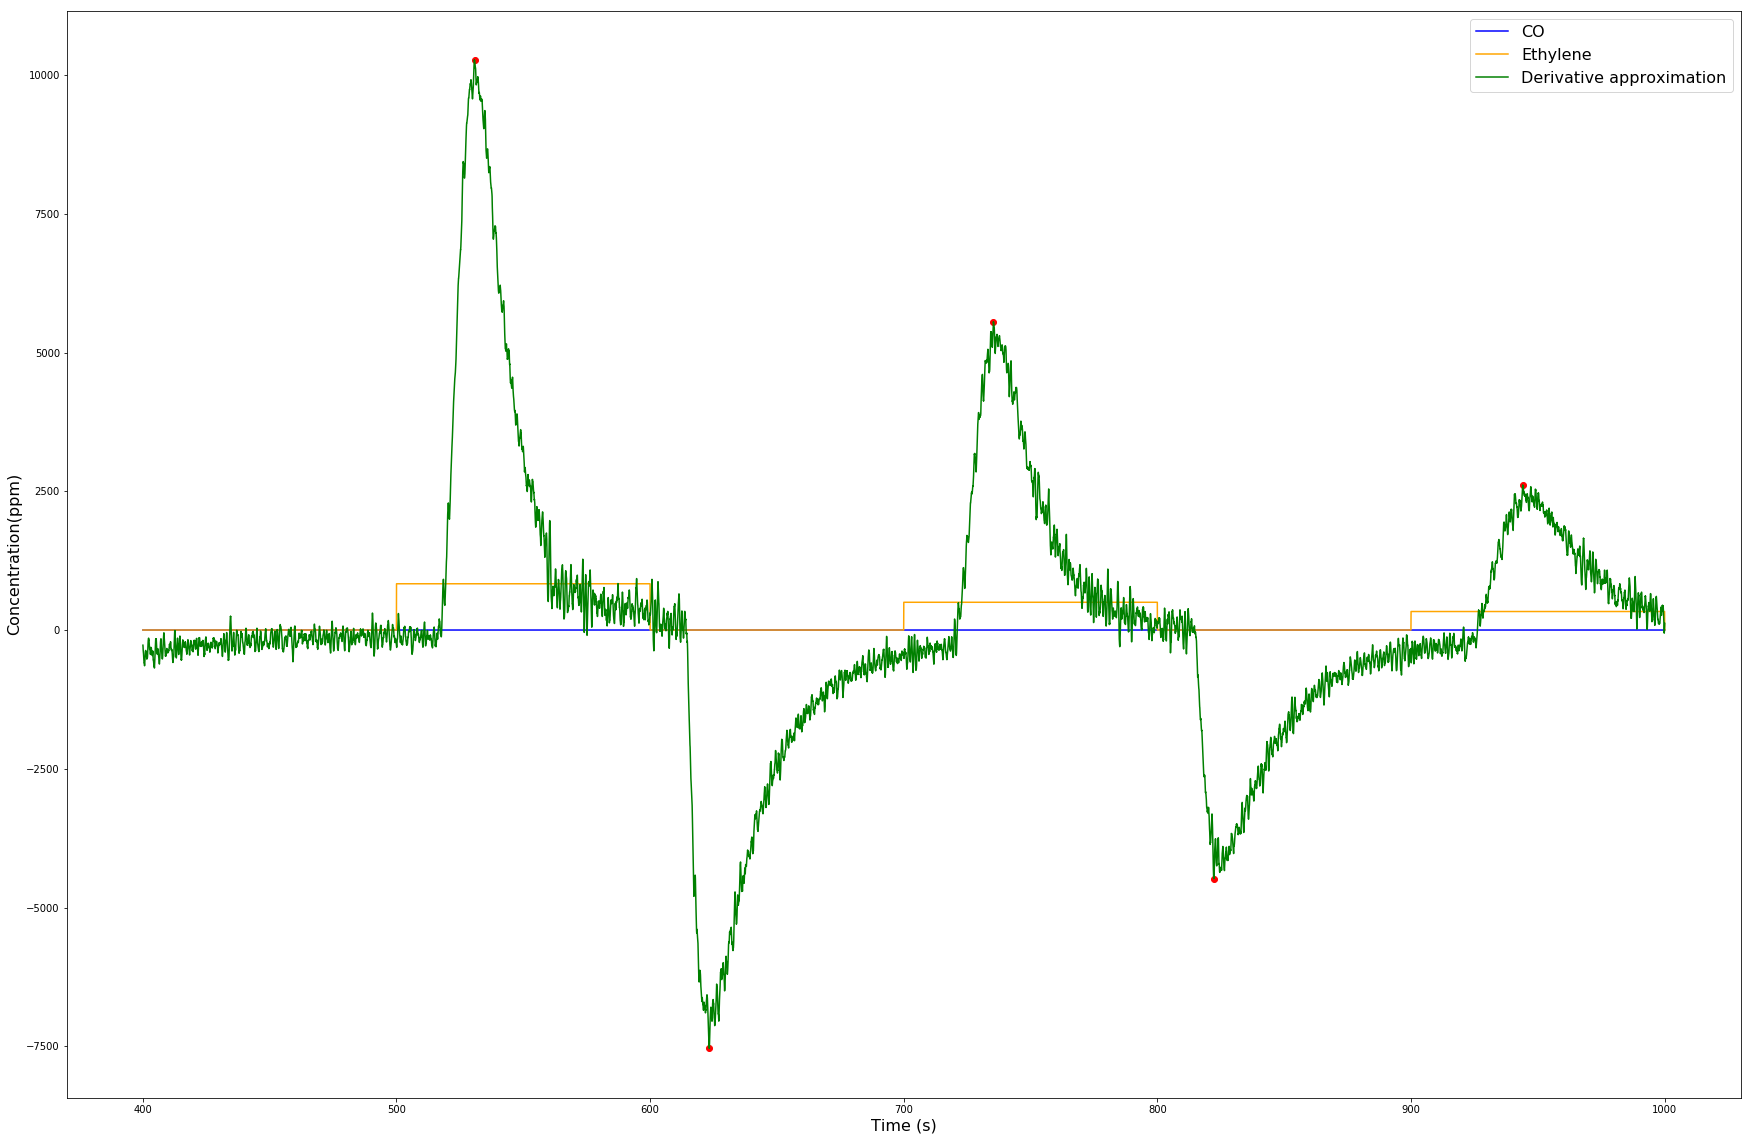

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
import peakdetect
# Check https://gist.github.com/endolith/250860 for download and documentation

# Let's begin with a test run on sensor 5

x=df_der.T.values[0]
y=df_der.T.values[5]
x=x[40000:100000]
y=y[40000:100000]

peaks=peakdetect.peakdet(y,5,x)

#Plot peaks
plt.figure(1,figsize=(30,20))
for i in range(0,len(peaks[0])):
    plt.plot(peaks[0][i][0],450*peaks[0][i][1],'ro')
#Plot valleys    
for i in range(0,len(peaks[1])):
    plt.plot(peaks[1][i][0],450*peaks[1][i][1],'ro')
ima3m.plot_der(5,40000,100000,450,df_smooth,df_der)
plt.show

# WOOOOOOHOOOOO it works.
# Now I will try it for more chunks of data.


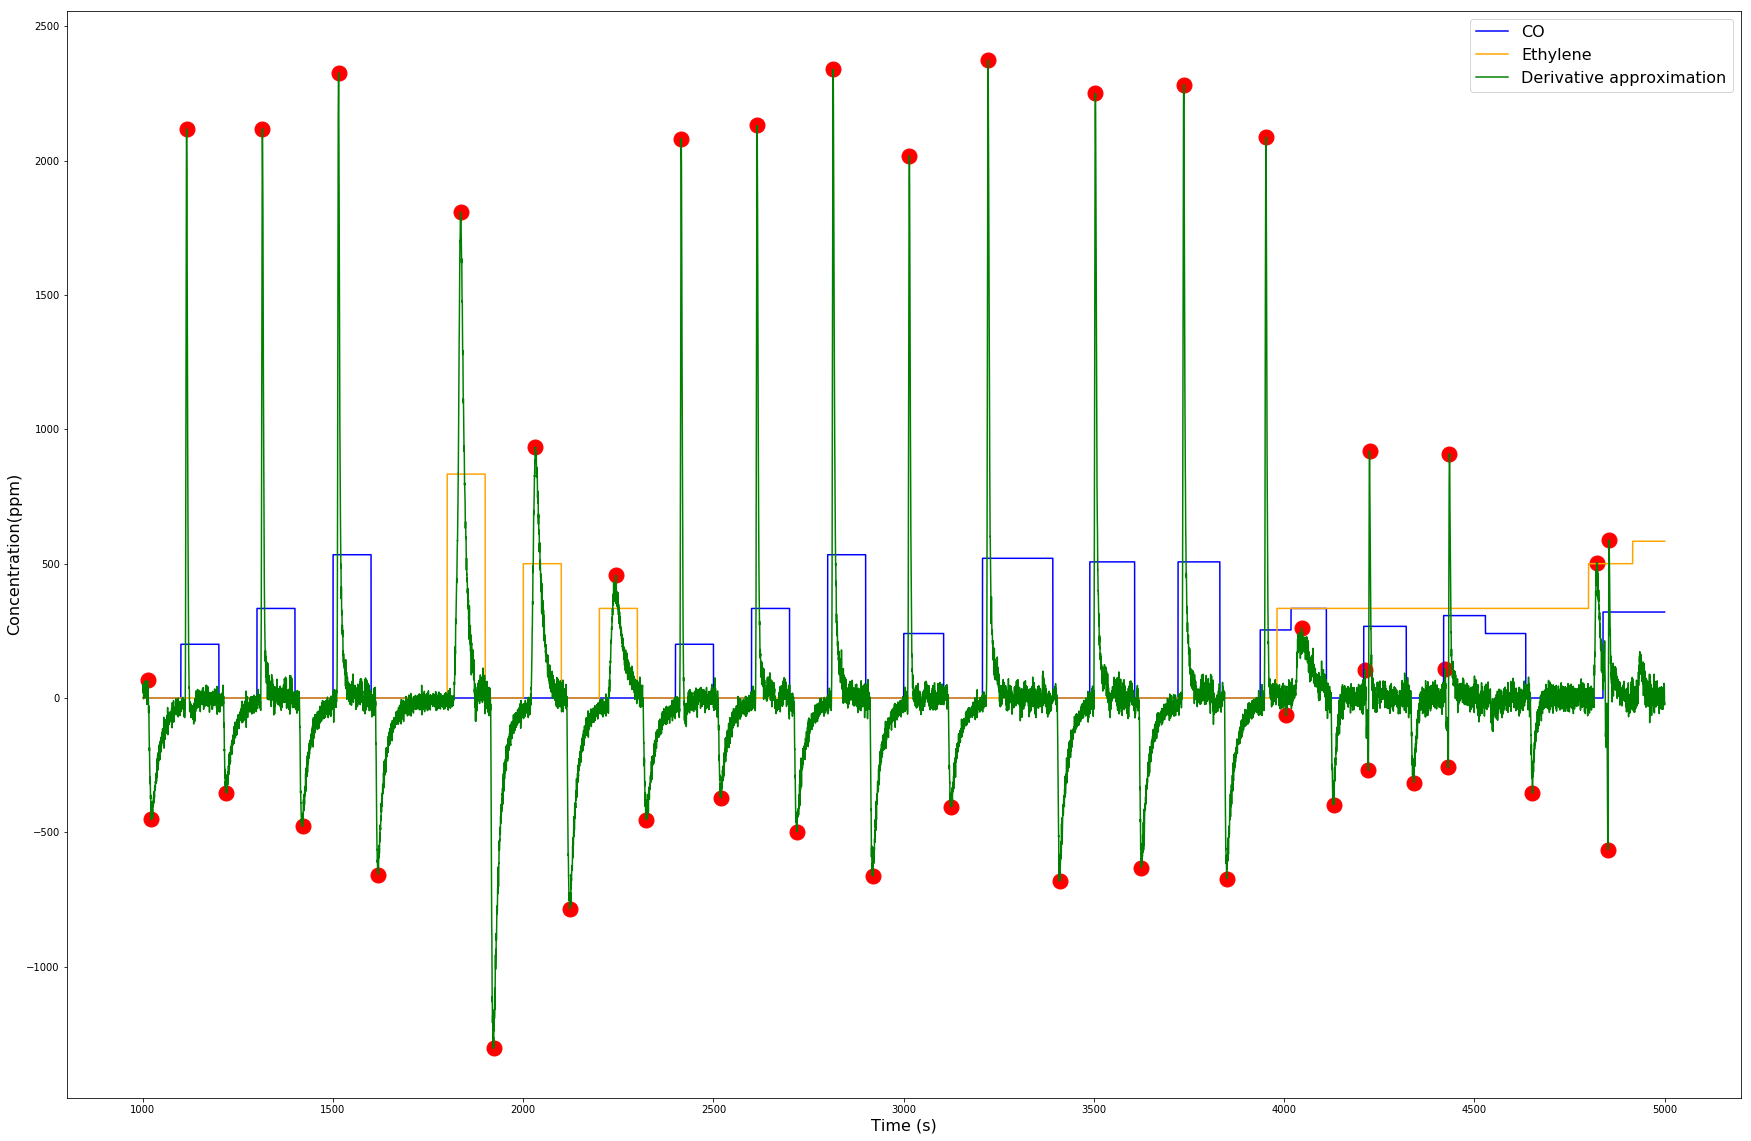

<function matplotlib.pyplot.show(*args, **kw)>

In [34]:
# Let us try a bigger chunk now, on a different sensor
x=df_der.T.values[0]
y=df_der.T.values[10]
x=x[100050:500000]
y=y[100050:500000]

peaks=peakdetect.peakdet(y,5,x)

#Plot peaks
plt.figure(1,figsize=(30,20))
for i in range(0,len(peaks[0])):
    plt.plot(peaks[0][i][0],50*peaks[0][i][1],'ro',markersize=15)
#Plot valleys    
for i in range(0,len(peaks[1])):
    plt.plot(peaks[1][i][0],50*peaks[1][i][1],'ro',markersize=15)
ima3m.plot_der(10,100000,500000,50,df_smooth,df_der,1)



plt.show

Next, we try this on all of the sensors

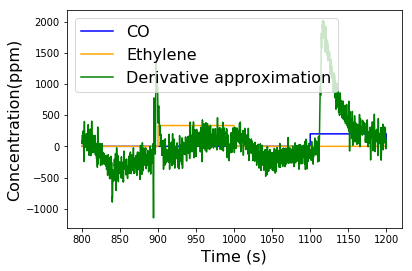

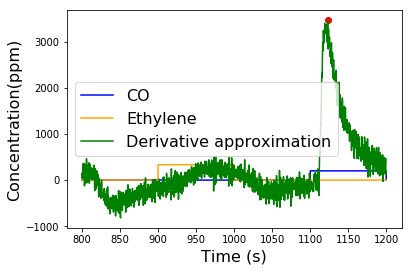

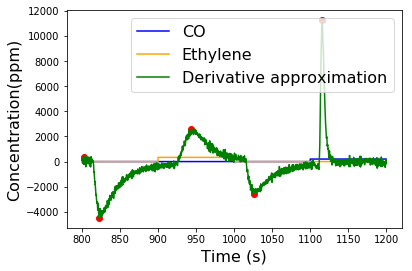

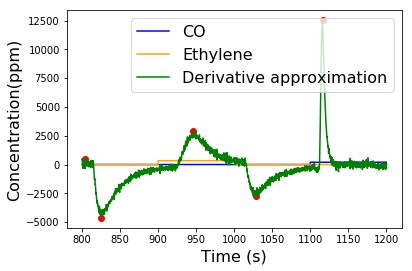

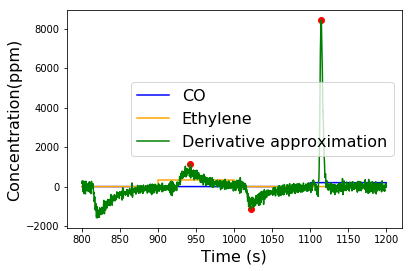

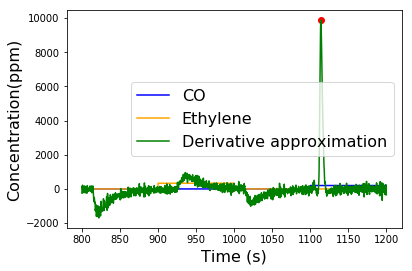

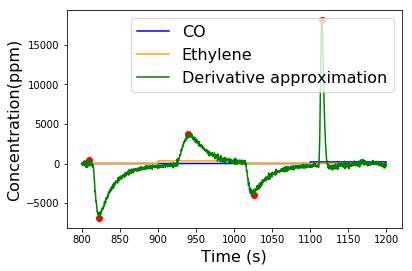

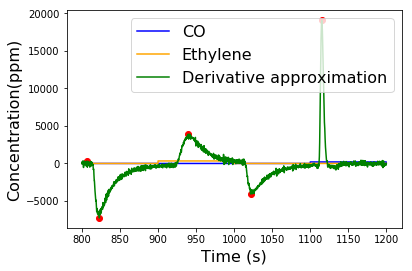

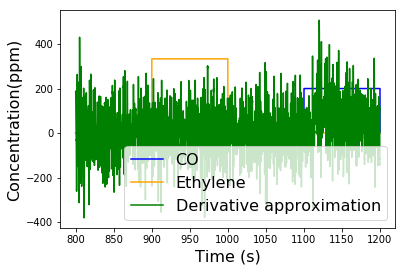

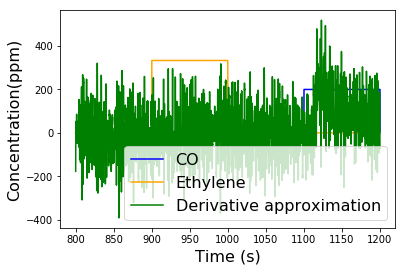

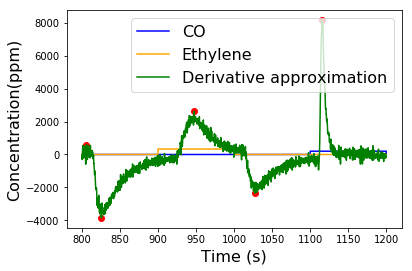

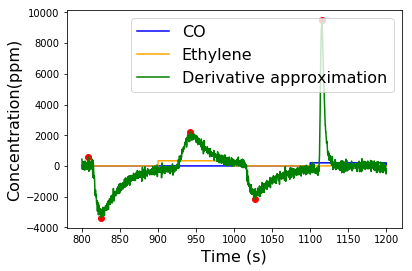

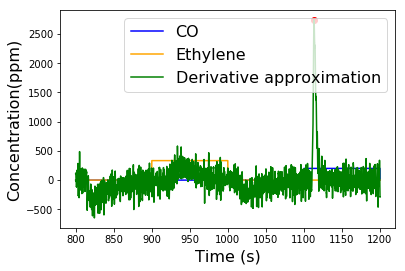

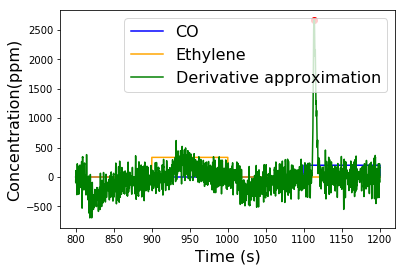

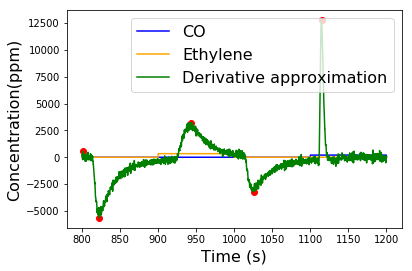

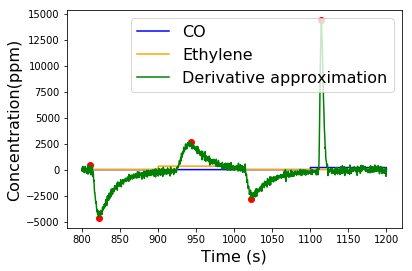

In [35]:
# Now we try it for all of the sensors
k=1

for j in range(3,19):
    x=df_der.T.values[0]
    y=df_der.T.values[j]
    x=x[80000:120000]
    y=y[80000:120000]

    peaks=peakdetect.peakdet(y,5,x)
    plt.figure(k)
    #Plot peaks
    for i in range(0,len(peaks[0])):
        plt.plot(peaks[0][i][0],450*peaks[0][i][1],'ro')
    #Plot valleys    
    for i in range(0,len(peaks[1])):
        plt.plot(peaks[1][i][0],450*peaks[1][i][1],'ro')
    plt.show
    ima3m.plot_der(j,80000,120000,450,df_smooth, df_der,k)
    k=k+1

\
\
## Day 3: 07/21 - Change-points

From the above we see that the best sensors in terms of peak detection are sensors 5,6,7,9,10,13,14,17,18 (Not hard to find their real names from their column numbers).

####  You do <font color='red'> NOT </font> need to run this following little part
I just used to find how many changepoints are detected by each sensor.

In [ ]:
# This is to compute the number of change points detected from each sensor.

x=df_der.T.values[0]
x=x[10000:]
num_change=[]
for i in [5,6,7,9,10,13,14,17,18]:
    y=df_der.T.values[i]
    y=y[10000:]
    #Compute the change-points
    peaks=peakdetect.peakdet(y,5,x)
    num_change=num_change+[len(peaks[0])+len(peaks[1])]
num_change

Now we store the detected changepoints for each sensor.
We store both the x coords and y coords for each sensor

In [8]:
'''
Initialize dataframe.
The are 454 rows, the maximum number of change points detected by some sensor.
Computed beforehand that the number of changepoints detected is
[388, 404, 232, 436, 454, 396, 370, 422, 412]

#Note that sensor 10 detects the most points, while sensor 7 detects the least.

(I am sure there is a more elegant way to do this, but time is short)

Note:
We are ignoring the first 100 seconds (i.e. 10000 first data frames) because of noise.

'''

df_changepoints = pd.DataFrame(index=range(0,454),columns=['t5','t6','t7','t9','t10','t13','t14','t17','t18'])
k=0
x=df_der.T.values[0]
x=x[10000:]
for i in [5,6,7,9,10,13,14,17,18]:
    y=df_der.T.values[i]
    y=y[10000:]
    #Compute the change-points
    peaks=peakdetect.peakdet(y,5,x)
    
    xcoords=[] #Initialize array to store x coordinates
    ycoords=[] #Initialize array to store y coordinates     
    
    #Record peak time-steps
    for i in range(0,len(peaks[0])):
        xcoords=xcoords+[peaks[0][i][0]]
    #Record valley time-steps
    for i in range(0,len(peaks[1])):
        xcoords=xcoords+[peaks[1][i][0]]
    xcoords=np.sort(xcoords) #sort coordinates
    df_changepoints.iloc[0:len(xcoords),k]=xcoords #Each sensor can potentially detect a different number of changepoints
    
    k=k+1

<function matplotlib.pyplot.show(*args, **kw)>

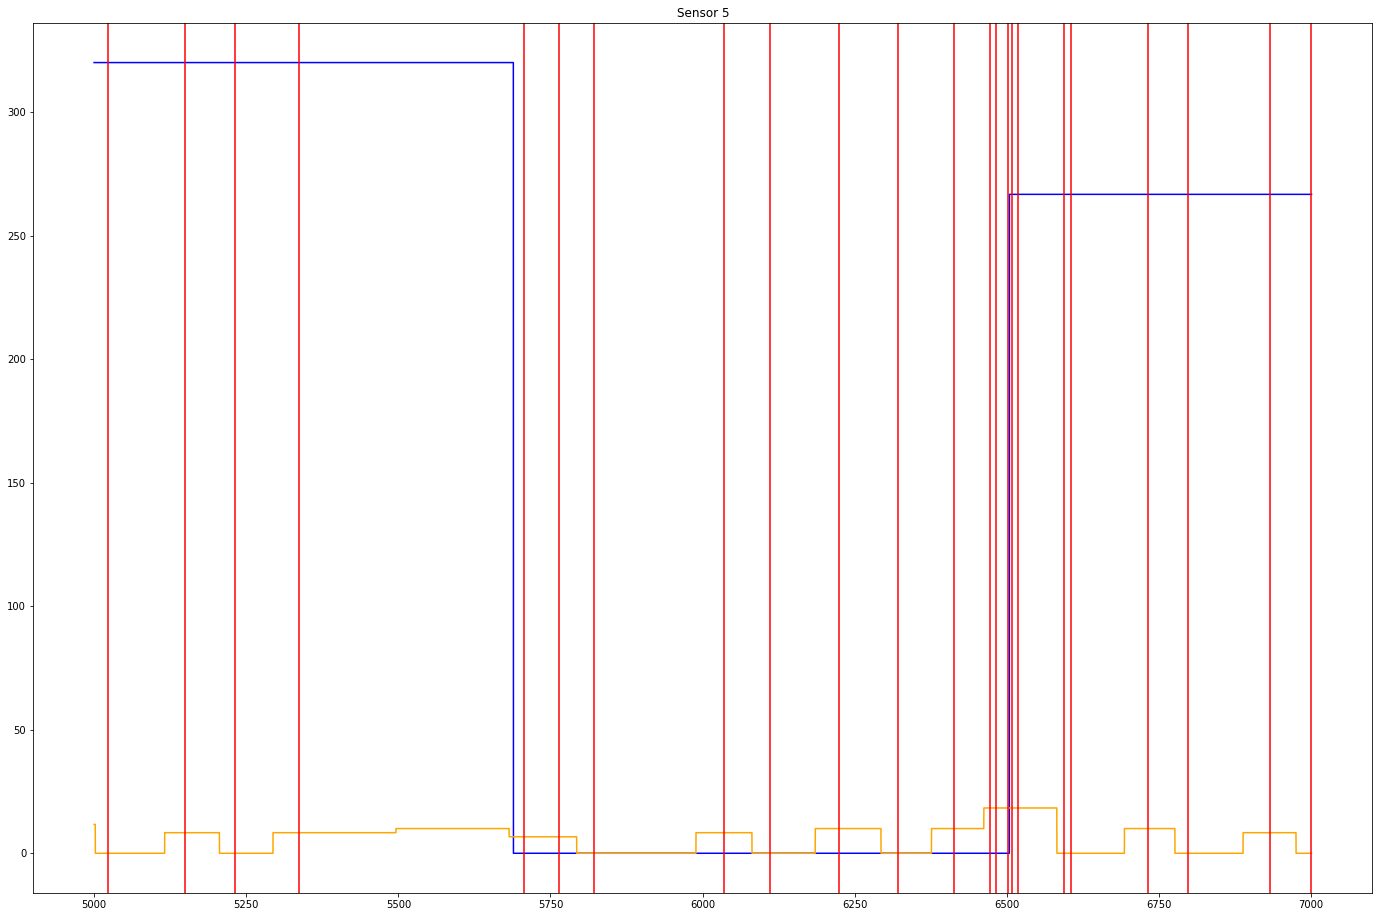

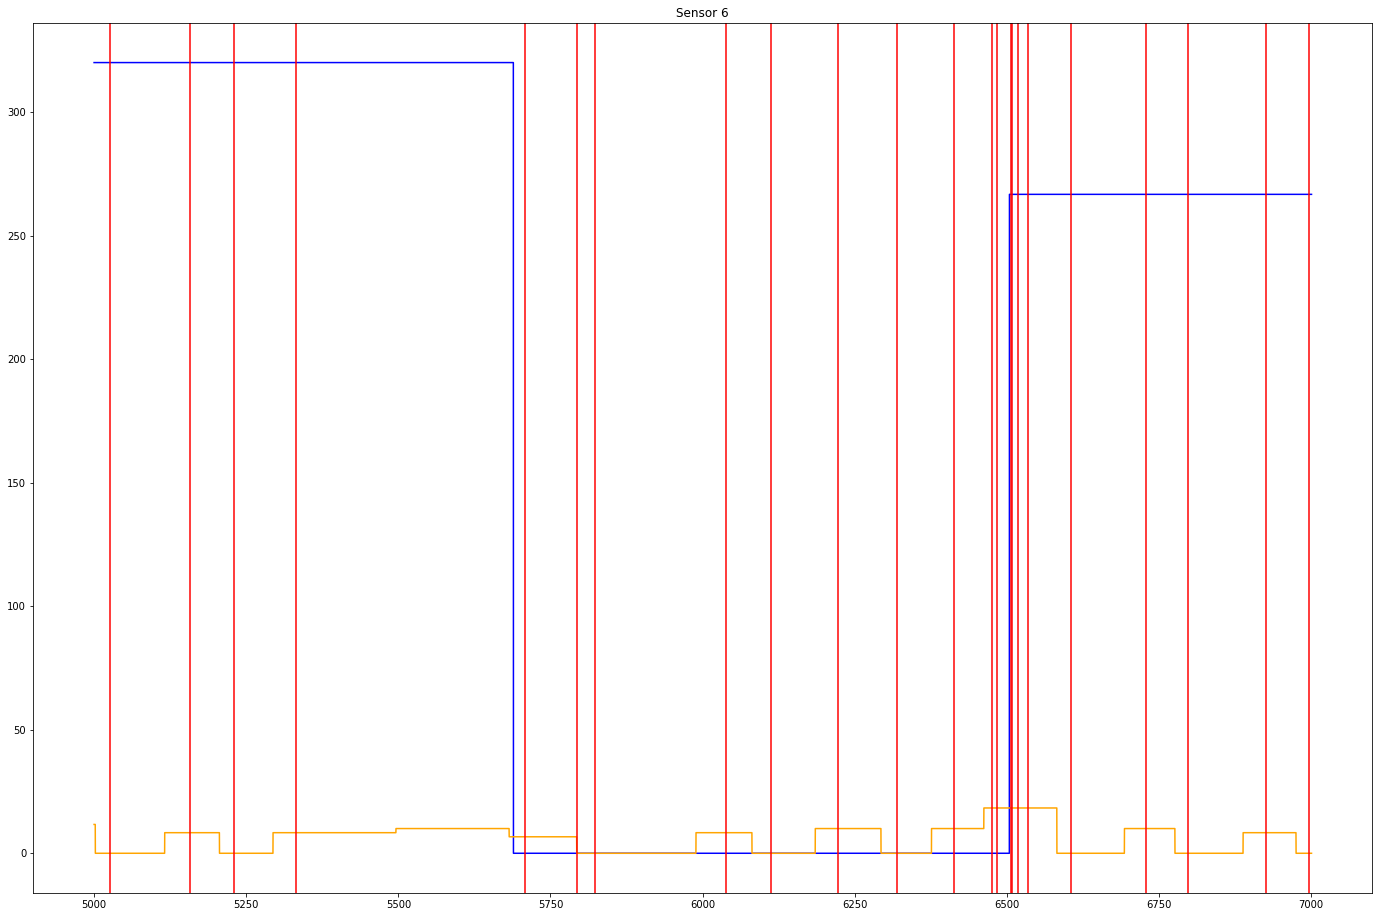

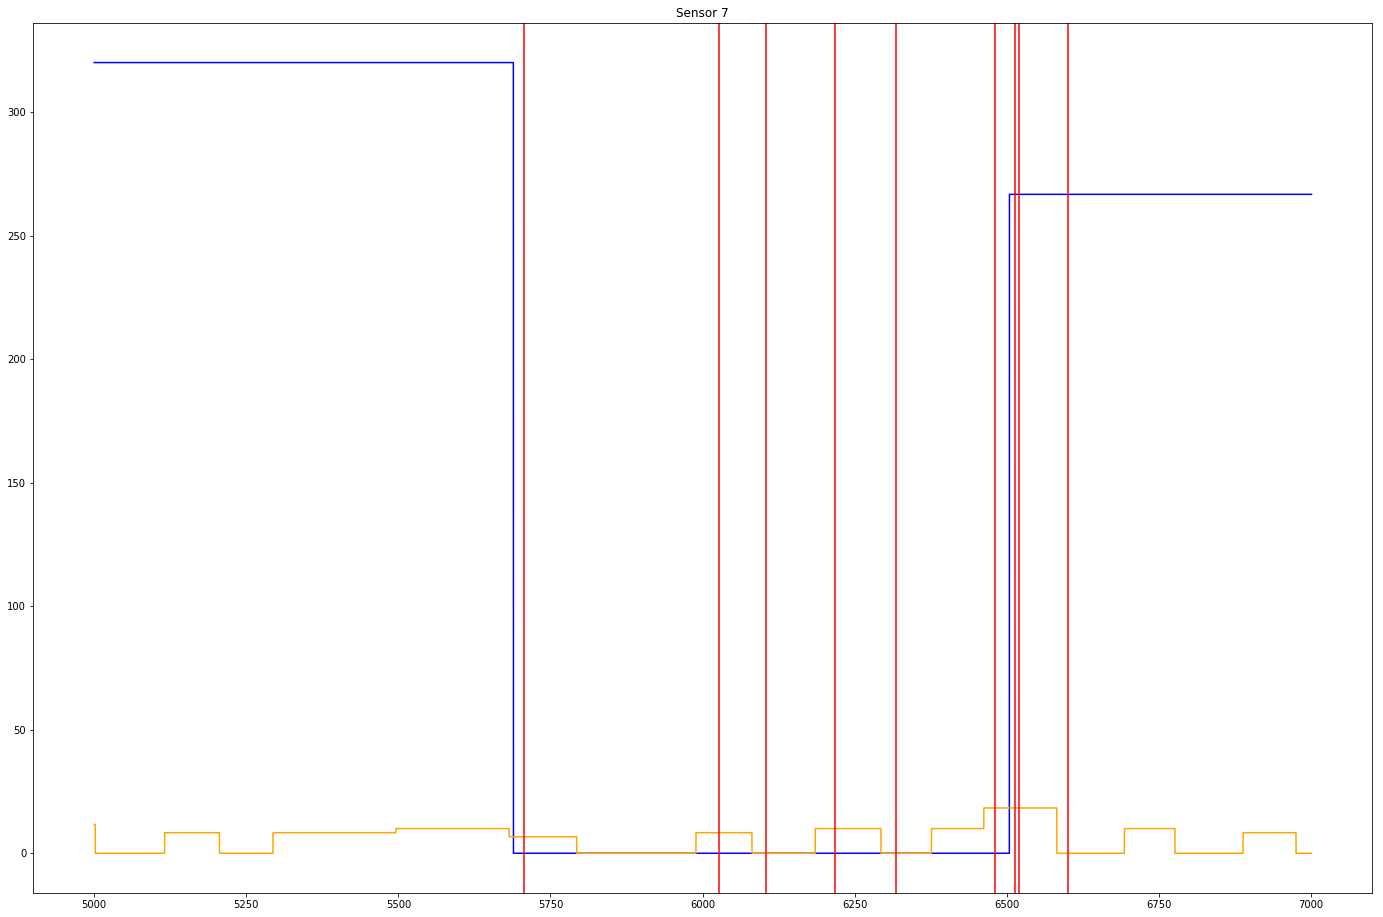

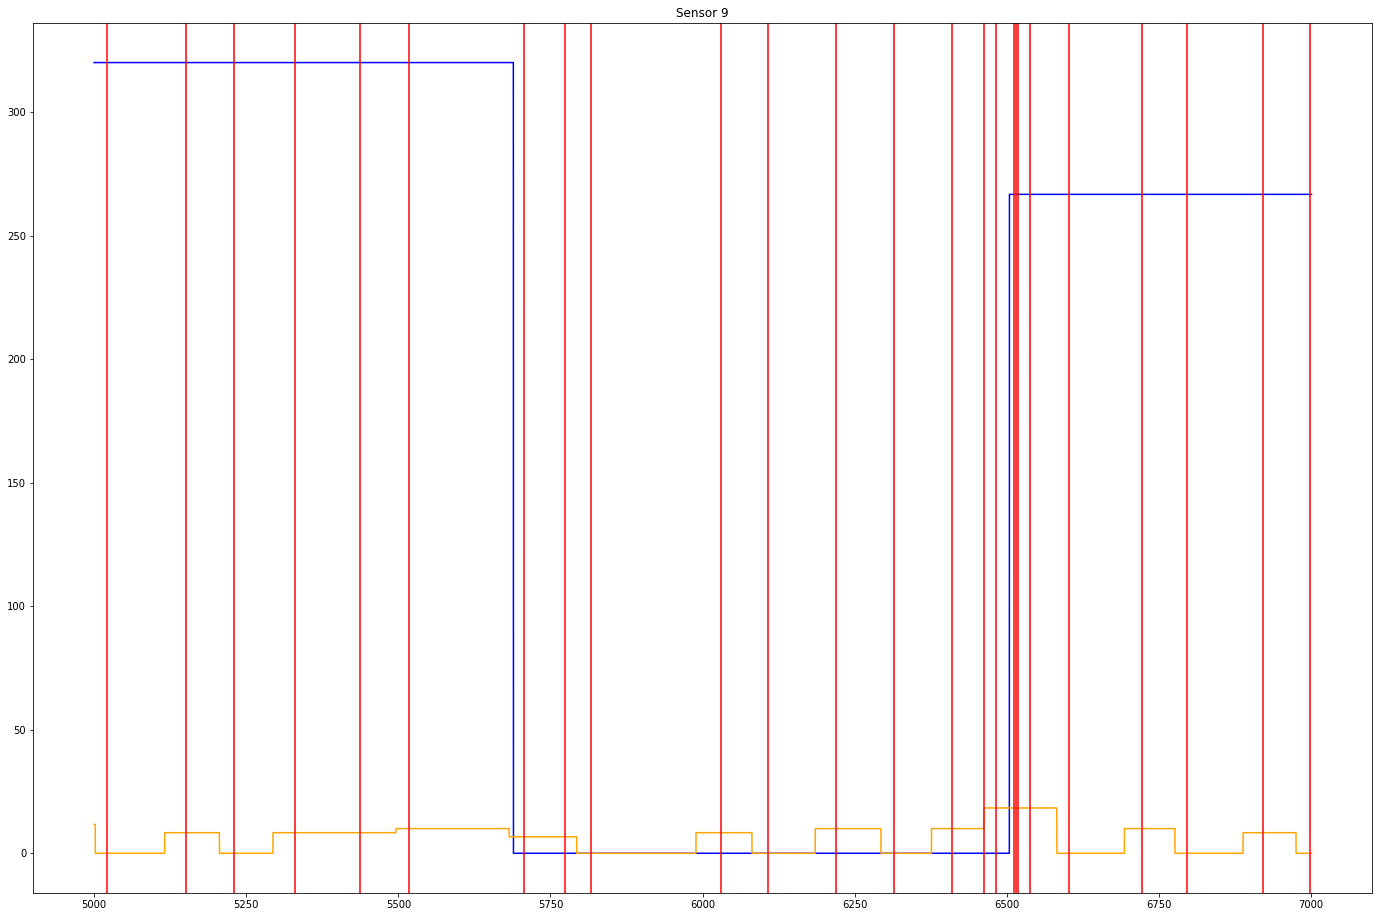

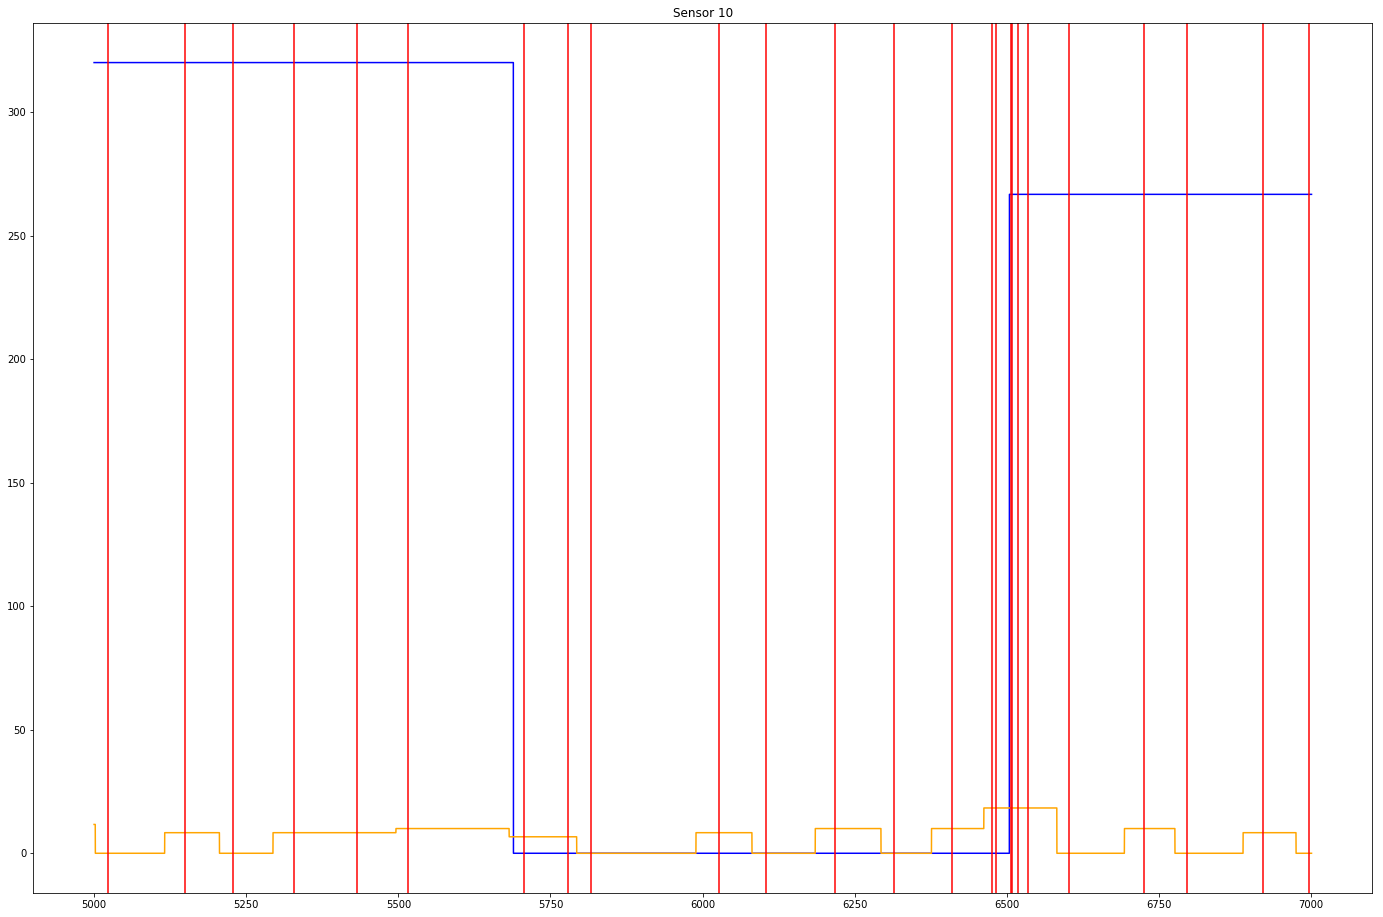

In [9]:
# Let's check some of these out. 

x=df_smooth.T.values[0]
y=df_smooth.T.values[1]
z=df_smooth.T.values[2]
x=x[500000:700000]
y=y[500000:700000]
z=z[500000:700000]
k=1
for j in [5,6,7,9,10]:
    plt.figure(k,figsize=[24,16])
    plt.plot(x,y,color='blue')
    plt.plot(x,z,color='orange')
    #only pick the values in the limits we chose
    temp_df=df_changepoints[(5000<df_changepoints['t%d'%(j)]) & (df_changepoints['t%d'%(j)]<7000)]
    for i in temp_df['t%d'%(j)].T.values:      
        plt.axvline(x=i,color='red')
        plt.title('Sensor %d'%(j))
    k=k+1
plt.show

# SENSOR 7 is not very good. Let us not use it.

#### <font color='red'> New problem: </font>
We now have change points from 9 different sensors. Which ones do we use and how do we combine them?

#### Some observations so far:
1. Sensor 7 not very good at detecting change-points. Let us not use that one.
2. Each sensor computes a different number of change points. How do we align these?

#### To simplify things, let us first just use 4 sensors (6,9,13,17)

In [ ]:
df_changepoints.iloc[250:,[1,3,5,7]]

# From this we see that sensor 9 is a little bit off, so, again, to simplify things, let us use only sensors 6,13 and 17 
# to compute the change-points. (Use one replicate for each type of a sensor)

Next, let us store the combined change_points from these sensors.
For simplicity, I just took the mean of three of the sensors.


In [10]:
# Sensors to keep
keep=df_changepoints[['t6','t13','t17']]
comb_change=[]
for i in range(0,396):
    comb_change=comb_change+[np.mean(keep.values[i])]

Mini moment of truth: Let us see what we got by plotting the points against the concentration.

<function matplotlib.pyplot.show(*args, **kw)>

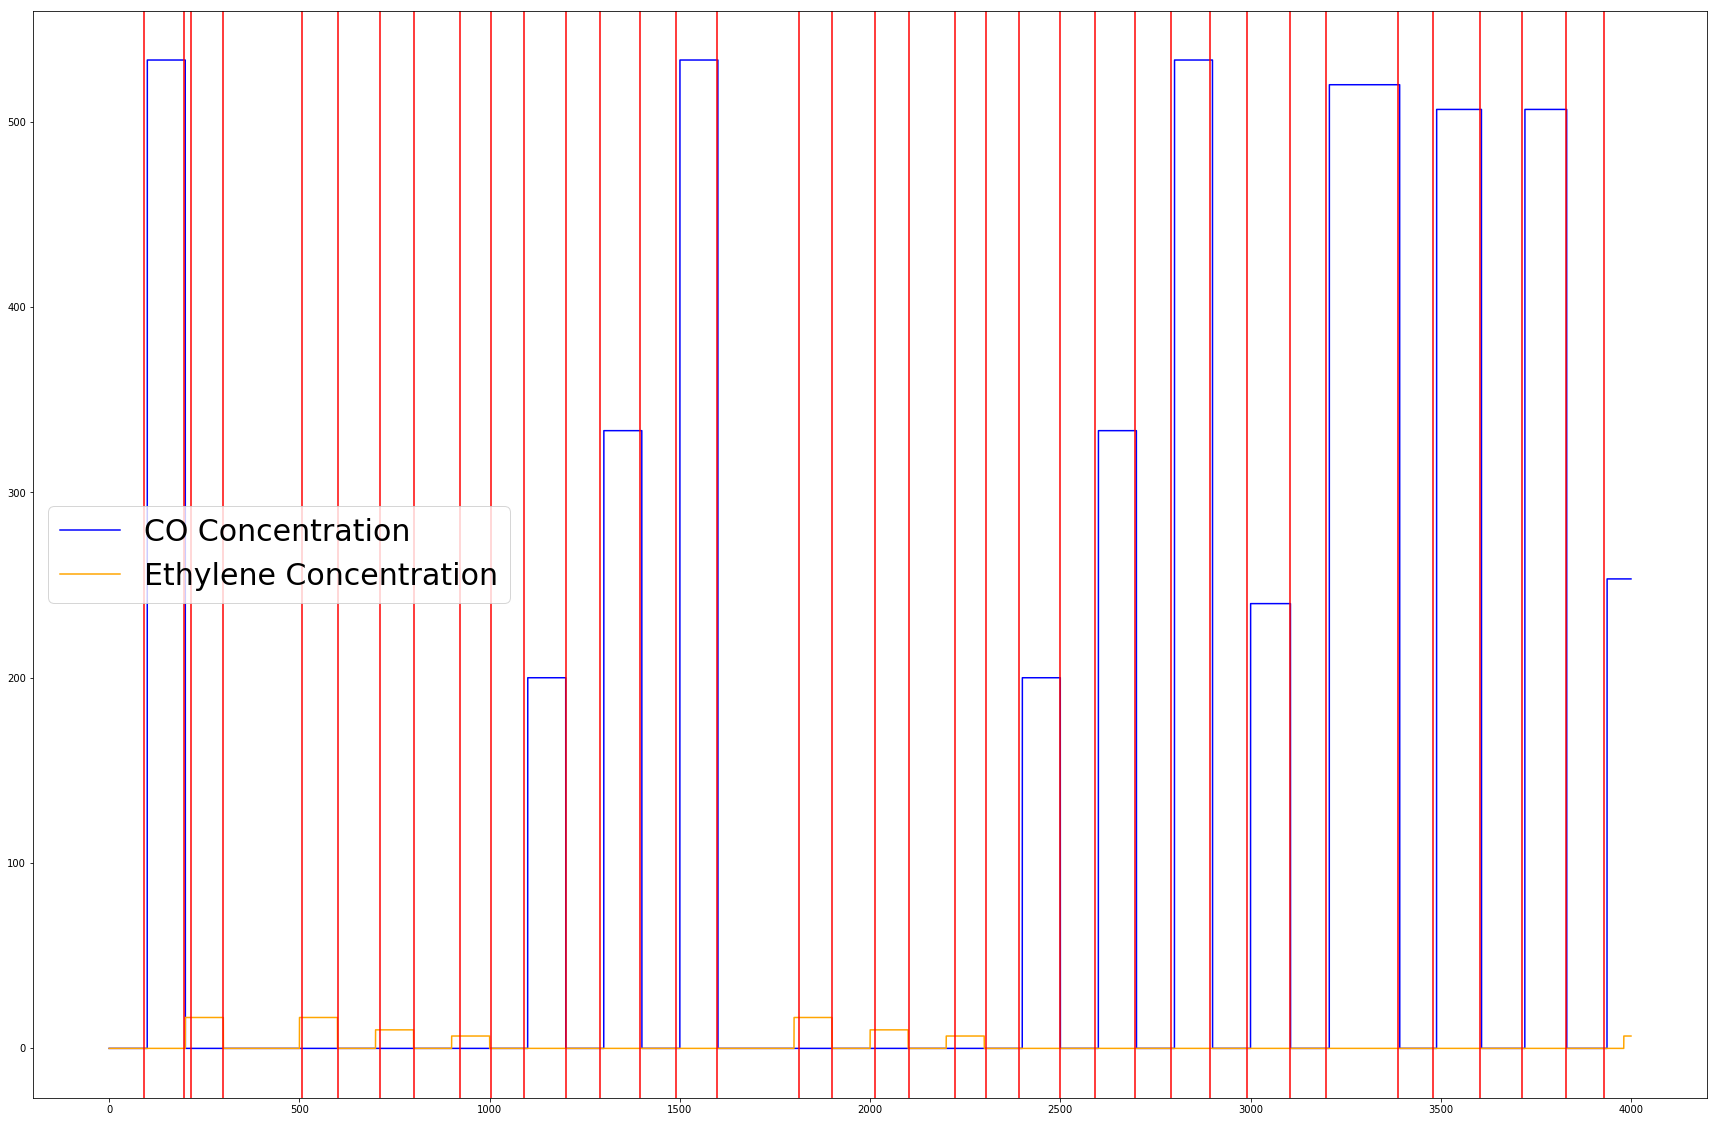

In [11]:
x=df_smooth.T.values[0]
y=df_smooth.T.values[1]
z=df_smooth.T.values[2]
x=x[0:400000]
y=y[0:400000]
z=z[0:400000]
plt.figure(1,figsize=[30,20])
plt.plot(x,y,color='blue',label='CO Concentration')
plt.plot(x,z,color='orange',label='Ethylene Concentration')
for i in comb_change: #Here I am eye-balling which ones are in the range I am plotting
        if i<4000:
            plt.axvline(x=i-24,color='red') # This is lagged by 24 seconds
        else:
            break
plt.legend(fontsize=30)
plt.show

#### Little issue: lag
Approximately, we have 15 seconds lag for CO and 35~38 seconds for ethylyne.
Another problem is the the changepoints do not distinguish between CO and ethylene.

As a temporary solutions, lets us take the lag to be the average of the two lags, i.e. 24~26 seconds.

### <font color='orange'> Next Step:</font> Extract features from sub-time series.

The next step is decide which features to extract from the sub-time series defined by the change-points. One first, naive feature would be to fit a linear regression model (since many sensor readings are quite flat) and take the slope and intercept as a feature.

To decide this, it might be helpful to take a look at the sensor data again, this time in the sub-timeseries windows we have.

<function matplotlib.pyplot.show(*args, **kw)>

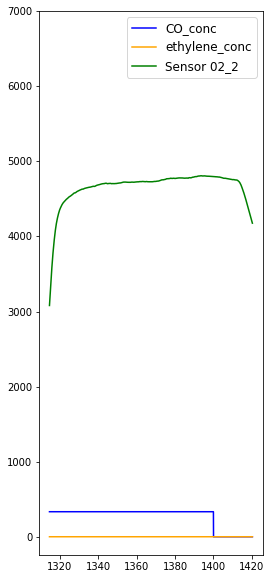

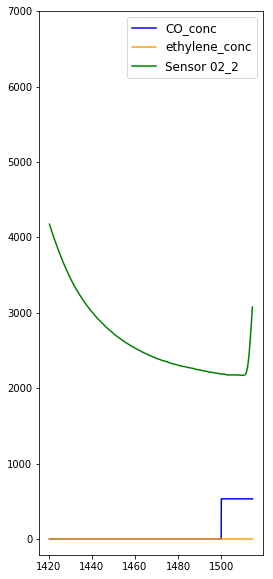

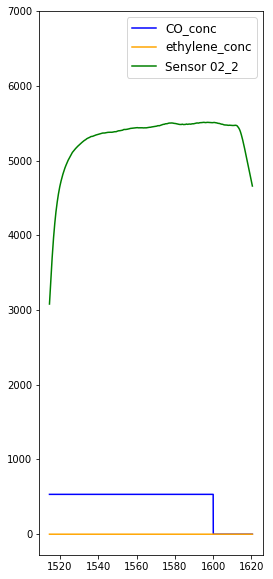

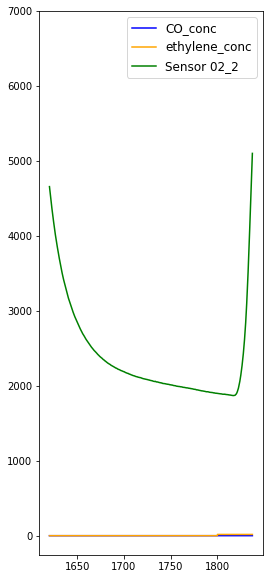

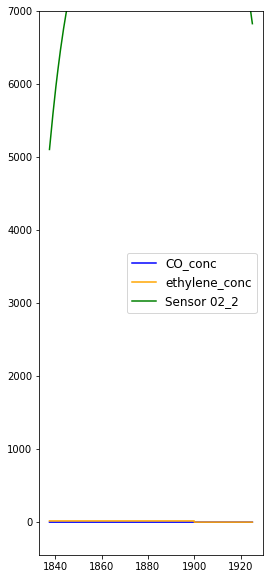

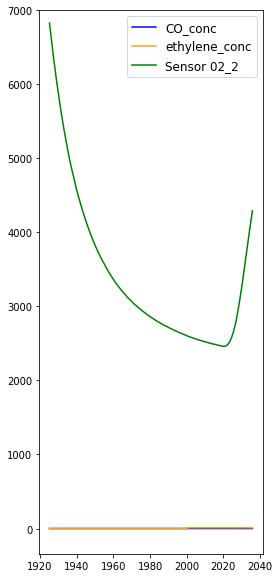

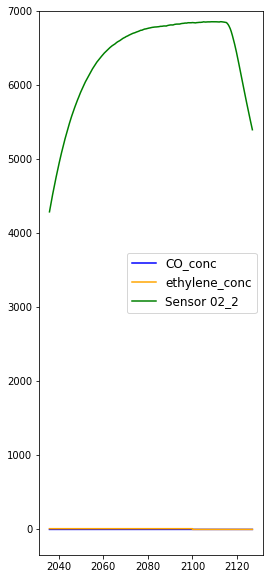

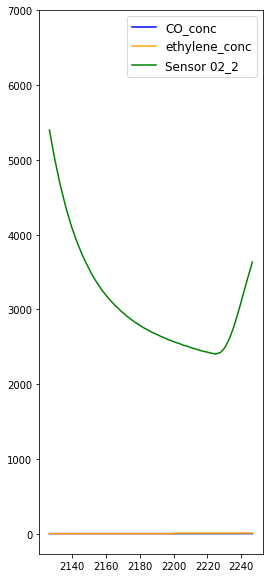

In [72]:
# Let's us plot a few of these sub-time-series to get a feel
k=1

for i in range(12,20): # Here, I randomly chose to view the 12th to 20th block.
    subseries=df_smooth[(comb_change[i]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[i+1])]
    # Let's plot some of the sensor data now
    x=subseries.T.values[0]
    y=subseries.T.values[1]
    z=subseries.T.values[2]

    plt.figure(k,figsize=(4,10))
    plt.plot(x,y,color='blue')
    plt.plot(x,z,color='orange')
    #plt.plot(x,subseries.T.values[3],color='green')
    plt.plot(x,subseries.T.values[10],color='green')
    plt.legend(['CO_conc', 'ethylene_conc', 'Sensor 02_2 ', 'Sensor 20_3'], fontsize=12)
    plt.ylim(ymax=7000)
    k=k+1

plt.show

## Day 4: 07/22 - Feature Extraction
#### Note:
Let us record an interesting question for the future: Can we somehow use all of the time lags from the different sensors to classify when a changepoint occured because of a change in ethylene or CO or both?

#### Now onward with feature extraction!
Some ideas for features:
- Linear regression (custom or usual): Take intercept and slope as features
- Extract features and select relevant ones with tsfresh


First, let us try the usual <font color='orange'> linear regression </font>, or customise it by "chopping off" the sides of the time series and extract the intercept (and perhaps slope) as features.

<function matplotlib.pyplot.show(*args, **kw)>

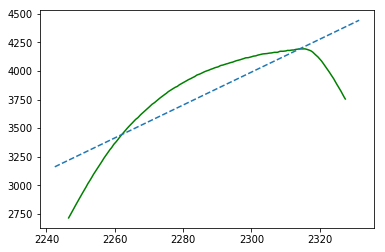

In [12]:
# Linear regression

# Let's first try it on a small chunk, e.g. the 20th chunk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

k=1
subseries=df_smooth[(comb_change[20]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[21])]
# Let's plot some of the sensor data now
x=subseries.T.values[0].reshape(-1,1)
y=subseries.iloc[:,5] #select sensor 5
regr=linear_model.LinearRegression()
regr.fit(x,y)

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

plt.figure(1)
plt.plot(x,y,color='green')
abline(regr.coef_,regr.intercept_)
plt.show

# Cool. This seems to work. 

Let us store all of the regression coefficients in a new data frame

In [13]:
temp=[]
for i in range(3,19):
    temp=temp+['coef%d'%(i),'intercept%d'%(i)]
lin_df=pd.DataFrame(index=range(0,395),columns=temp)

    
for i in range(0,395):
    subseries=df_smooth[(comb_change[i]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[i+1])]
    x=subseries.T.values[0].reshape(-1,1)
    k=0
    for j in range(3,19):
        y=subseries.iloc[:,j] #select sensor 5
        regr=linear_model.LinearRegression()
        regr.fit(x,y)
        lin_df.iloc[i,k]=regr.coef_[0]
        lin_df.iloc[i,k+1]=regr.intercept_
        k=k+2


## Tsfresh
- Concern: Most of their examples were classification problems, not regression problems. They have no mention of a regression example in their paper
- Idea: Apart from using tsfresh with the sub-timeseries identified above, we could also try it on the sub-timeseries given by the 'true' change-points given by the gases.

#### <font color='red'> Update (July 25th) </font>
You can load the data below so that you don't have to do everything from scratch.

In [14]:
#Load data
features_df=pd.read_pickle('filtered_features_1')
features_filtered=features_df.iloc[:,:5012] # Remove CO and ethylene

# Store CO and ethylene in lists
CO_response=[]
eth_response=[]
for i in range(0,len(features_df)):
    CO_response.append(features_df.iloc[i,5012])
    eth_response.append(features_df.iloc[i,5013])

In [ ]:
import tsfresh
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh import extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute

<font color=red> Note </font> You do not have to run the following. Tsfresh is quite time consuming.

In [ ]:
#The first thing we have to do is make an array of the type exctract_features takes as input.

df_smooth['ts_id']=np.nan # Add empty column to hold the timeseries id

# Next, we find the index of the first time step.
k=0
for k in range(0,100000):
    if (df_smooth.iloc[k,0]>114.9433):
        break
#k is now where the 1st chunk should start (we ignore the first part of the original time series)
for i in range(0,395):
    subseries=df_smooth[(comb_change[i]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[i+1])]
    df_smooth.iloc[k:k+len(subseries),19]=[i+1]*len(subseries)
    k=k+len(subseries) 
    
# We also need to remove the CO_conc and ethylene_con
extract_input=df_smooth.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

extract_input.head()
# Looks good.

Compute co_values and ethylene_values for each chunk (the median value) and store them.

In [ ]:
CO_response=[]
for i in range(0,395):
    subseries=df_smooth[(comb_change[i]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[i+1])]
    CO_response=CO_response+[np.median(subseries['CO_conc'])]
    
ethylene_response=[]
for i in range(0,395):
    subseries=df_smooth[(comb_change[i]<=df_smooth.timestamp) & (df_smooth.timestamp<=comb_change[i+1])]
    ethylene_response=ethylene_response+[np.median(subseries['ethylene_conc'])]

## Day 5, 07/23: Feature Extraction, Machine Learning

<font color='blue'> Update: </font> tsfresh was taking a bit too long last night so let us check out the sizes of the sub-timeseries first.

In [95]:
sizes=[]
for i in range(0,395):
    sizes.append((comb_change[i+1]-comb_change[i])*100)
print('maximum size:',"%.2f" %max(sizes))
print('minimum size:',"%.2f"% min(sizes))
print('average:',"%.2f"% np.average(sizes))
print('mean:', "%.2f"% np.mean(sizes))
print('standard deviation:', "%.2f"% np.std(sizes))

maximum size: 39644.33
minimum size: 1477.67
average: 10297.02
mean: 10297.02
standard deviation: 5241.36


Let us now try tsfresh on a smaller chunk again, but with less points (take measurement for about every second, i.e. every 100 measurements from before).


In [ ]:
# Coarseness 100, data size 70

# Down-sample by a size of 100
df_coarse=extract_input.iloc[range(0,len(extract_input),100),:]

#Tiny data set of size 70
trim=df_coarse.iloc[range(1000,1070),:]
#Let's try to extract from this now.
extracted_features=extract_features(trim, column_id='ts_id',column_sort='timestamp')
extracted_features.head()


#Phew! At least this on worked.

Plan for now: Gradually increase data size and fineness until we get a reasonable time for the whole data set.

In [ ]:
# Coarseness 100, data size 7000
trim=df_coarse.iloc[1000:8000,:]
extracted_features=extract_features(trim, column_id='ts_id',column_sort='timestamp')

# RUNTIME 2.42 minutes

In [ ]:
# Coarseness 100, data size 10000
trim=df_coarse.iloc[1000:11000,:]
extracted_features=extract_features(trim, column_id='ts_id',column_sort='timestamp')

# RUNTIME 4:04 minutes

In [ ]:
# Check where the first chunk starts. It is 115.
trim=df_coarse.iloc[114:117,:]
print(trim['ts_id'])

#Check where the last chunk ends. It is 40784.
trim=df_coarse.iloc[40784:40787,:]
print(trim['ts_id'])

Now we try it on the whole dataset, with coarseness 100 as before.
#### <font color='red'> Expect this step to take some time </font>

In [ ]:
# Coarseness 100, data size 42082
# Note that this is the full data size
trim=df_coarse.iloc[115:40784,:]
extracted_features=extract_features(trim, column_id='ts_id',column_sort='timestamp')

# RUNTIME 16.42 minutes

In [ ]:
# Remove irrelevant features and extract the relevant ones.
# It turns out ~5000 of them were selected.
# Note that we can probably remove more of these with standard methods
# since tsfresh does not remove redundant features (i.e. keeps both mean
# average even though they are highly correlated)

impute(extracted_features)
features_filtered=select_features(extracted_features,np.asarray(CO_response))
features_filtered.shape

In [ ]:
# Let us store this along with the concentration response values.
features_filtered['CO_conc']=CO_response
features_filtered['ethylene_conc']=ethylene_response
features_filtered.to_pickle('filtered_features_1')

## Further feature selection:
With 5000 features, it's probably best we further select some features. Let us try some of scikit's feature selection methods.

In [43]:
# SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_new = SelectKBest(f_regression, k=10).fit_transform(features_filtered, CO_response)
X_new.shape


(395, 10)

## Training the model
In this section, we fit various regression models to our data.

1. SVR (Support Vector Regression) with linear and nolinear kernel
2. Lasso & Multitask Lasso
3. Ridge + Kernel
4. Random Forest Regression

### <font color='red'> Warning: </font> Do not run SVR with a lot of features. It takes forever (>2 hours)

### 1. Support Vector Regression
SVR with reduced feature vectors. Note that running this with a linear kernel takes a very long time. Using radial or polynomial kernel is fast but gives very bad results.

#### <font color='red'> Note: </font> You need to run the feature selection in the previous chunk before you run this.

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


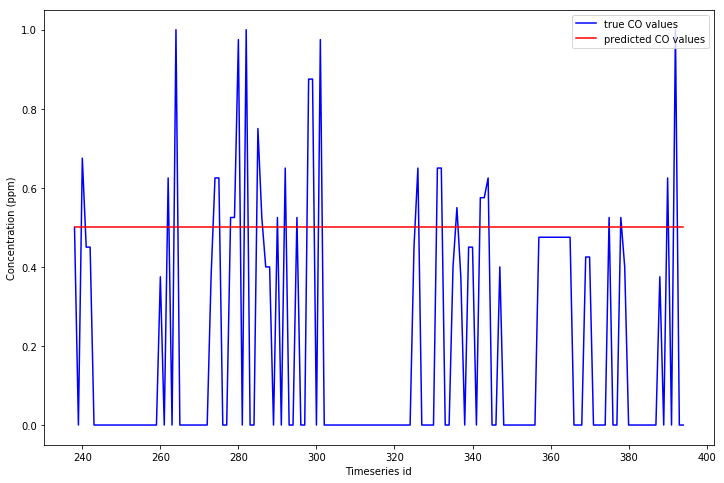

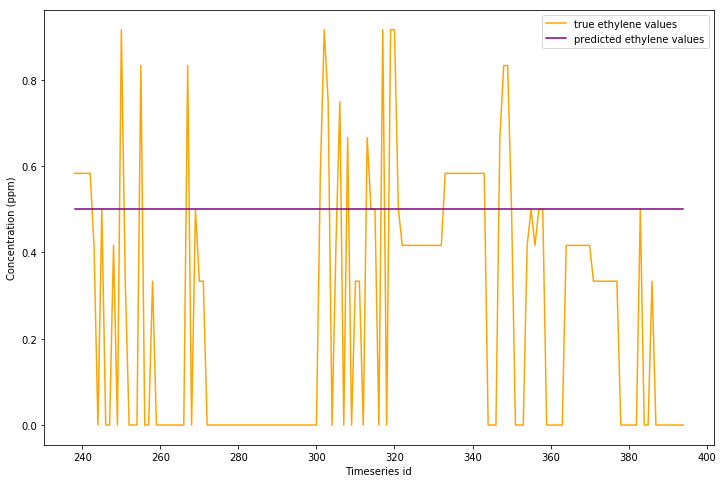

In [42]:
#SVR with 10 features and radial kernel

ima3m.svr_plot(X_new,CO_response,eth_response)


C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


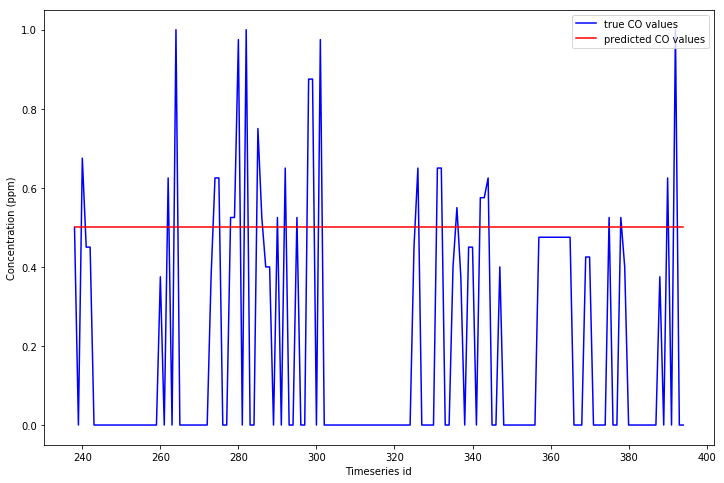

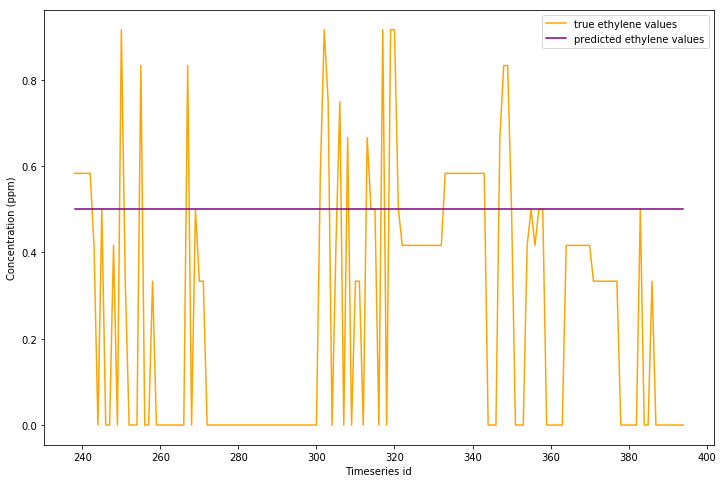

In [40]:
#SVR with 10 best features and polynomial kernel

ima3m.svr_plot(X_new,CO_response,eth_response,'poly')


From this we see that SVR with radial basis and polynomial kernel doesn't do the trick. Note that we also tried this with different parameters in the SVR model as well as more features but got the same results.

### 2. Lasso

Here, we try lasso regression with the 5012 features extracted and selected with tsfresh. We chose this regression model because of its 'embedded' feature selection.

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


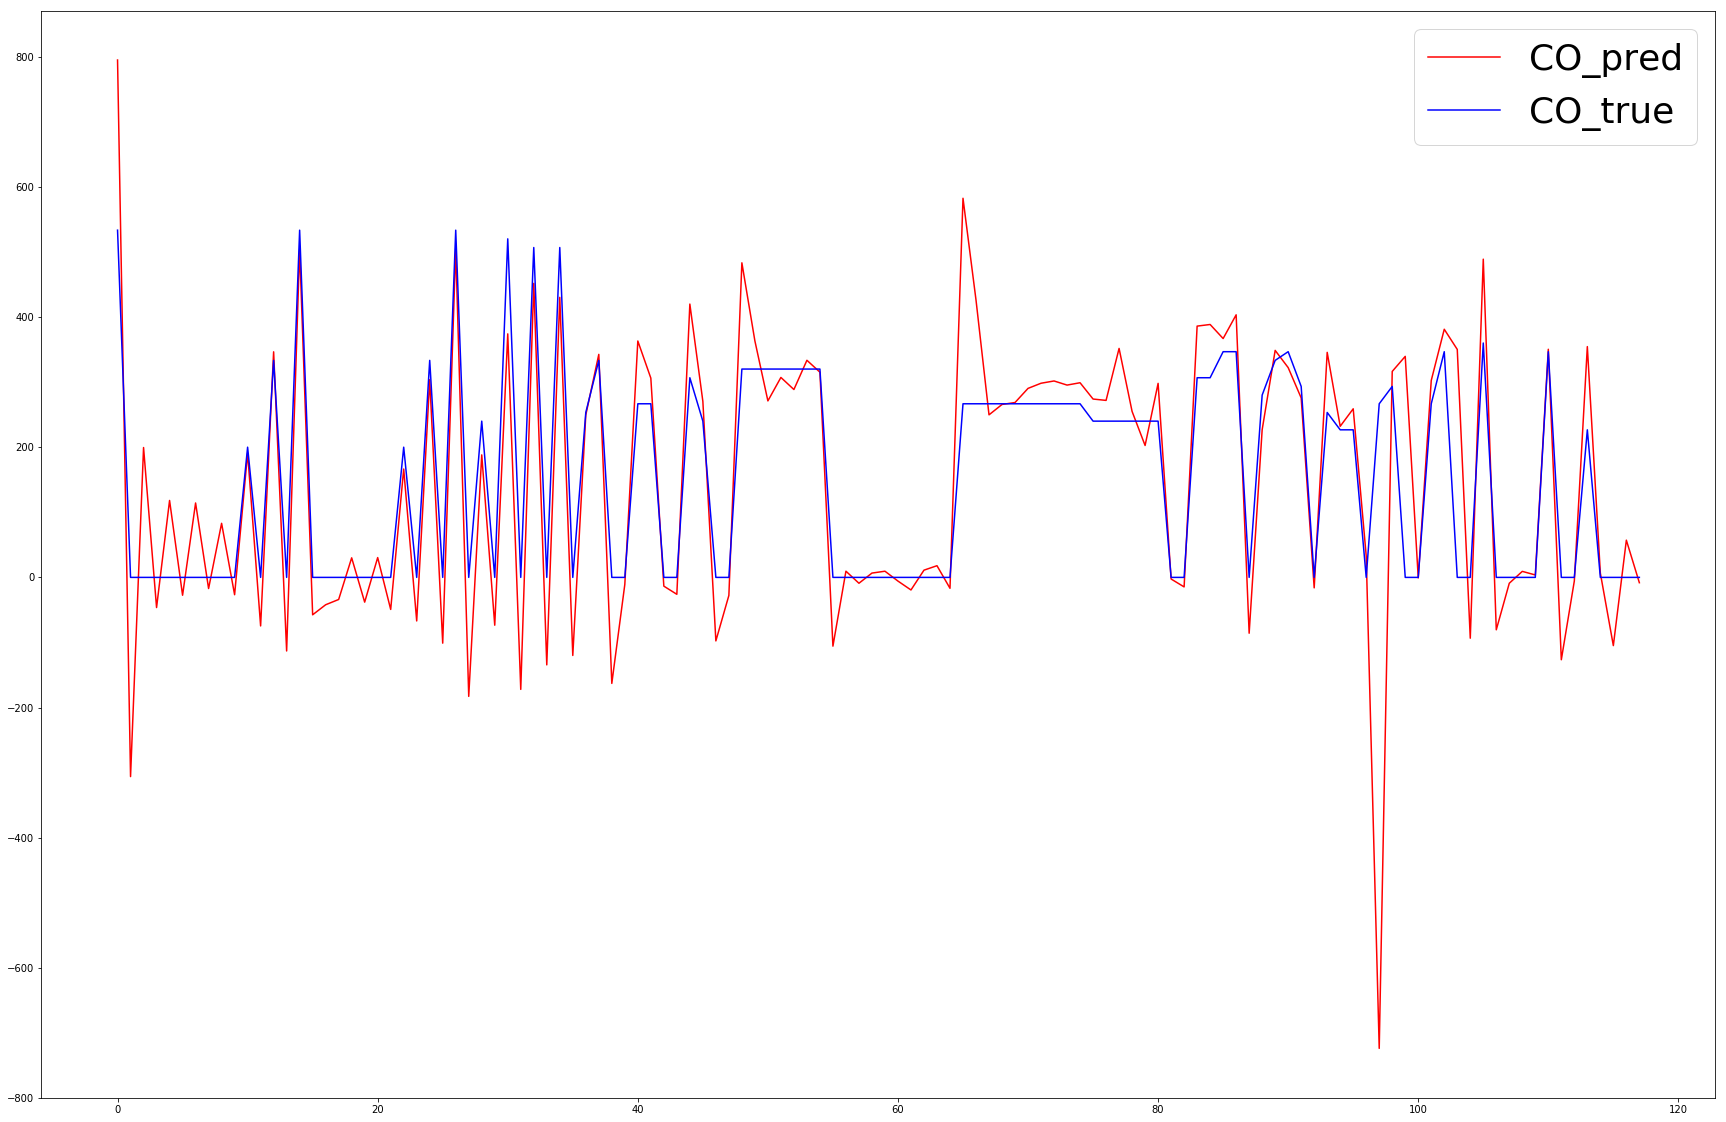

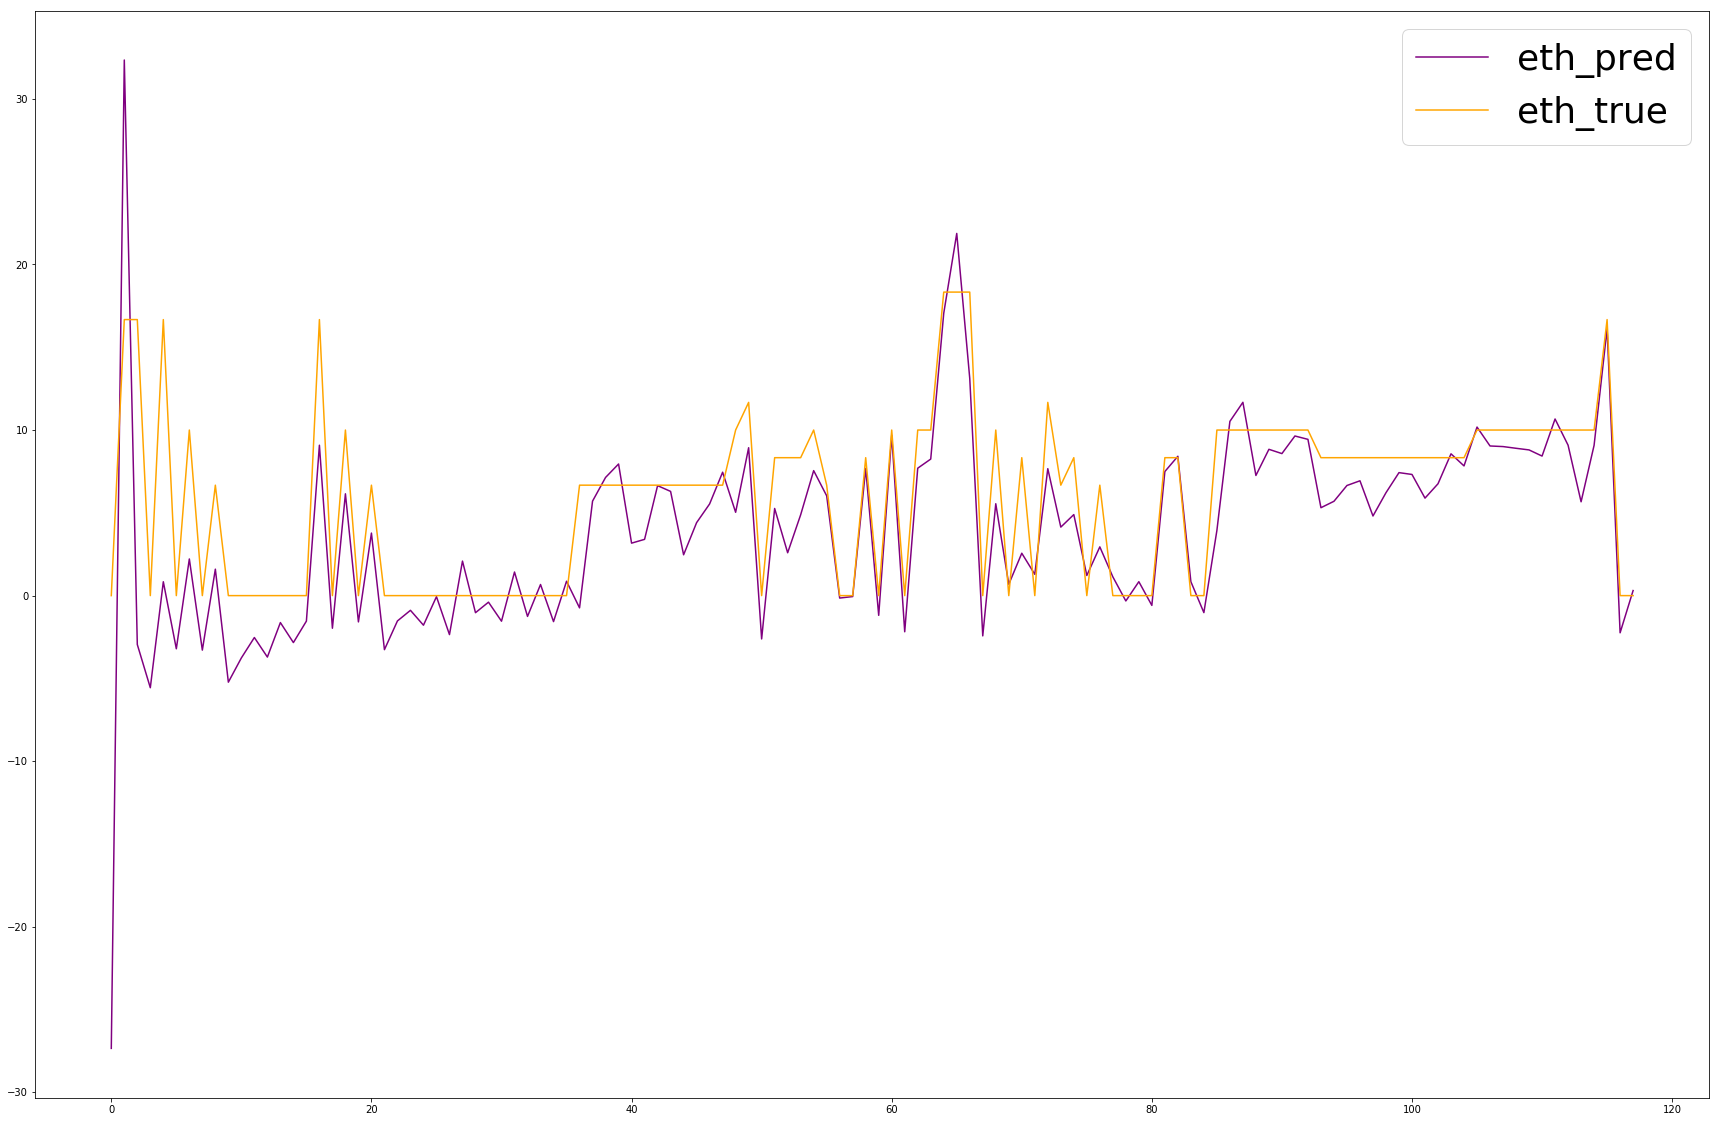

[[533.33,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  200.0,
  0.0,
  333.33,
  0.0,
  533.33,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  200.0,
  0.0,
  333.33,
  0.0,
  533.33,
  0.0,
  240.0,
  0.0,
  520.0,
  0.0,
  506.67,
  0.0,
  506.67,
  0.0,
  253.33,
  333.33,
  0.0,
  0.0,
  266.67,
  266.67,
  0.0,
  0.0,
  306.67,
  240.0,
  0.0,
  0.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  240.0,
  240.0,
  240.0,
  240.0,
  240.0,
  240.0,
  0.0,
  0.0,
  306.67,
  306.67,
  346.67,
  346.67,
  0.0,
  280.0,
  333.33,
  346.67,
  293.33,
  0.0,
  253.33,
  226.67,
  226.67,
  0.0,
  266.67,
  293.33,
  0.0,
  0.0,
  266.67,
  346.67,
  0.0,
  0.0,
  360.0,
  0.0,
  0.0,
  0.0,
  0.0,
  346.67,
  0.0,
  0.0,
  226.67,
  0.0,
  0.0,
  0.0,
  0.0],
 array([ 794.679237

In [46]:
imp.reload(ima3m)

ima3m.lasso_plot(features_filtered,CO_response,eth_response)

### 3. Multitask Lasso
2D (CO and ethylene) multitask lasso regression.

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)


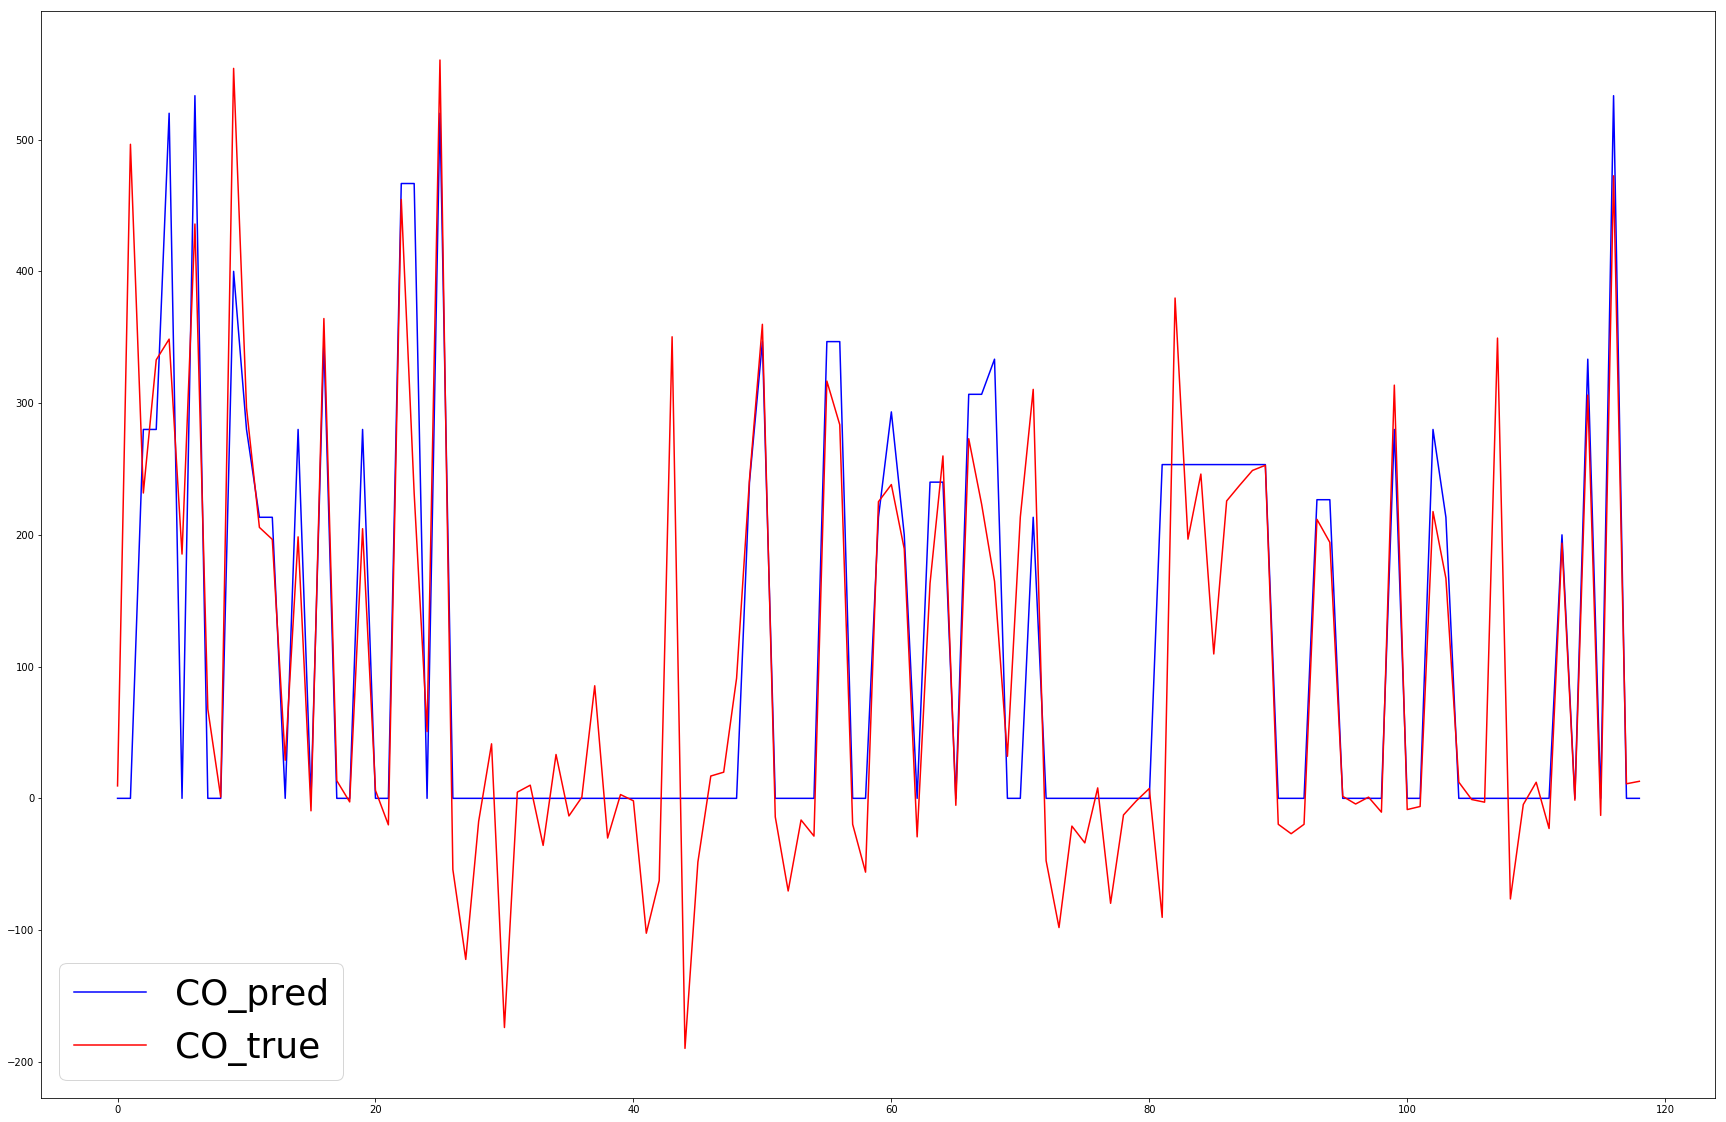

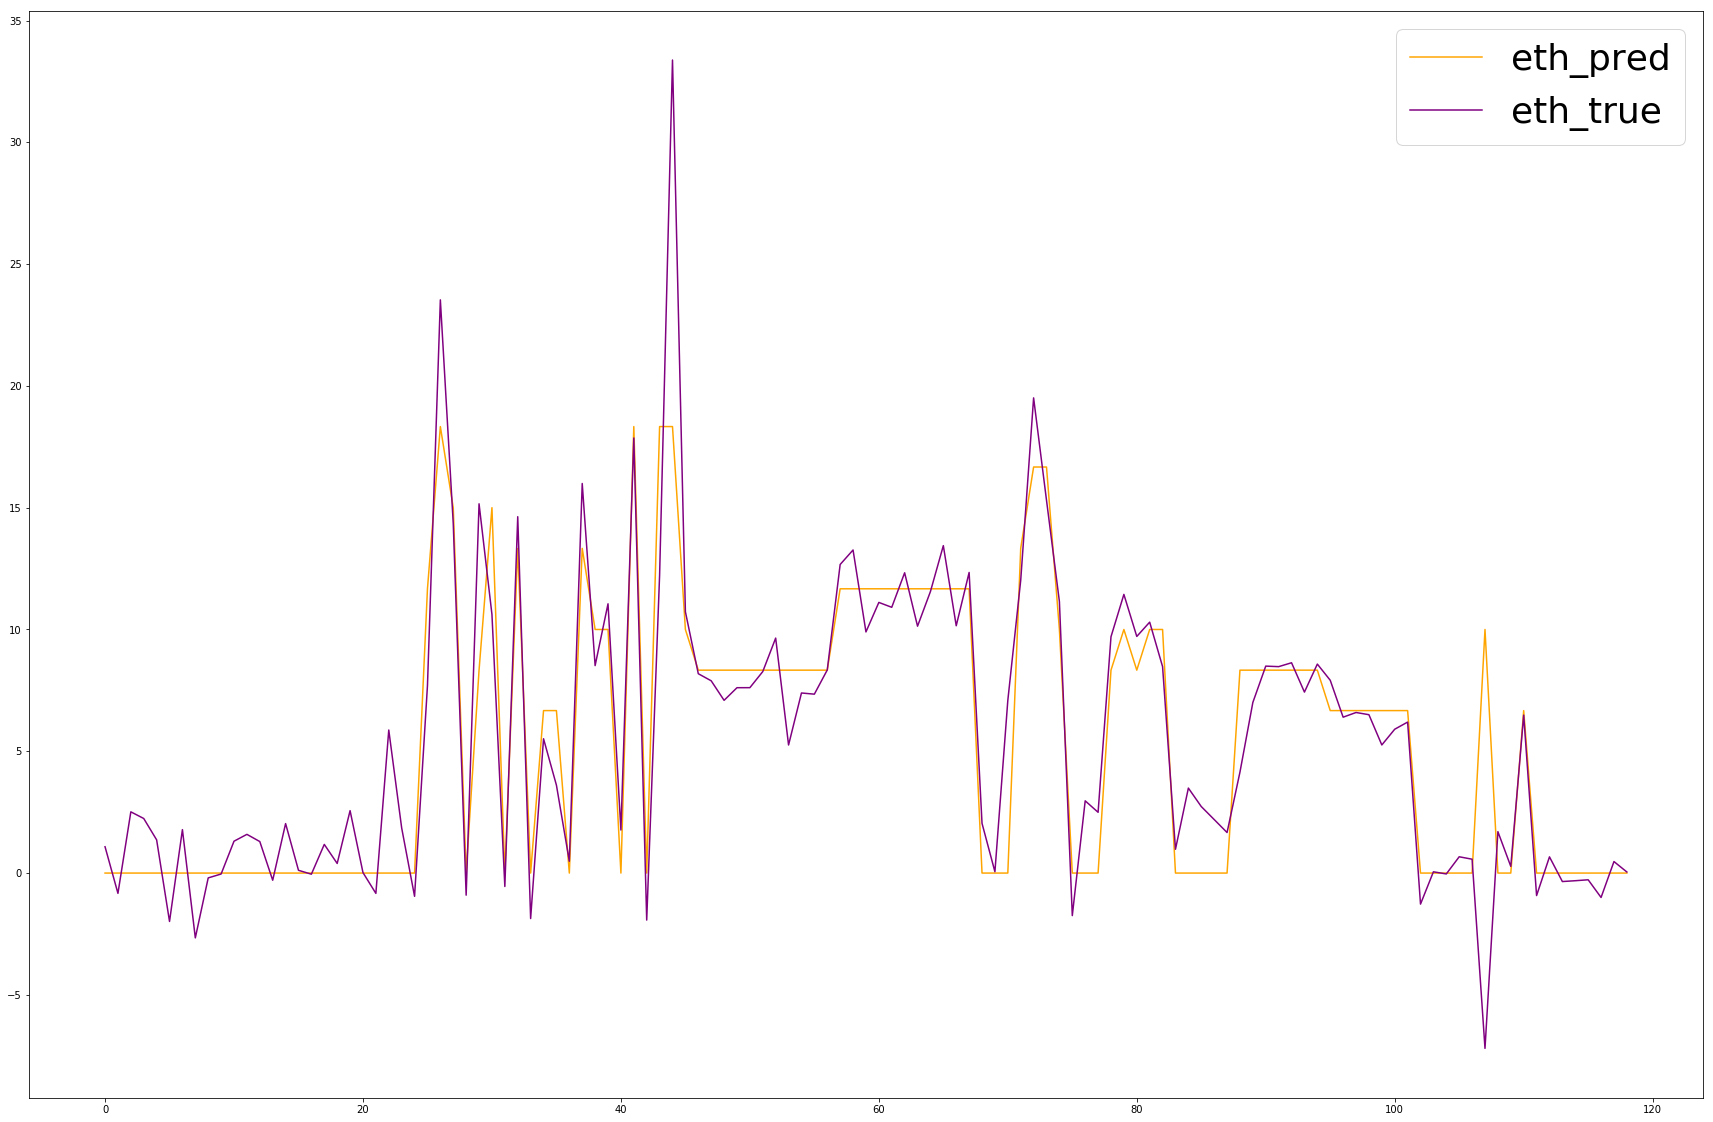

[[9.442109732149845,
  496.43693634841475,
  231.7655179774335,
  332.82356112641645,
  348.56497248737026,
  185.41711720227647,
  435.9349936843457,
  67.76136682908701,
  0.9835126479340985,
  554.061372190559,
  296.4120806066033,
  205.66220801829928,
  196.53785029816535,
  28.910912354023566,
  198.4692416336783,
  -9.468764652395741,
  364.1864227915124,
  13.4001415968537,
  -2.7091803233045795,
  204.6621329676268,
  6.038329672518138,
  -20.122656185066486,
  454.6088923874473,
  231.56520146389852,
  50.68436214761452,
  560.4099192357066,
  -54.03765560236971,
  -122.25969259129958,
  -17.502562876336995,
  41.3838099397297,
  -173.9518617386939,
  4.68917401485843,
  9.988517300271951,
  -35.72522925037731,
  33.27484944822611,
  -13.357820309976034,
  0.8462791395594635,
  85.45184638259519,
  -30.126376737423502,
  2.8756867935396215,
  -1.8748099793304291,
  -102.37739088889134,
  -62.4414157103343,
  350.3391941147104,
  -189.79150356857457,
  -48.3626126245598,
  16.

In [50]:
ima3m.multi_lasso_plot(features_filtered,CO_response,eth_response)

This doesn't look horrible so let us try and visualise it in its original format (timescale in seconds rather than time chunks).

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)


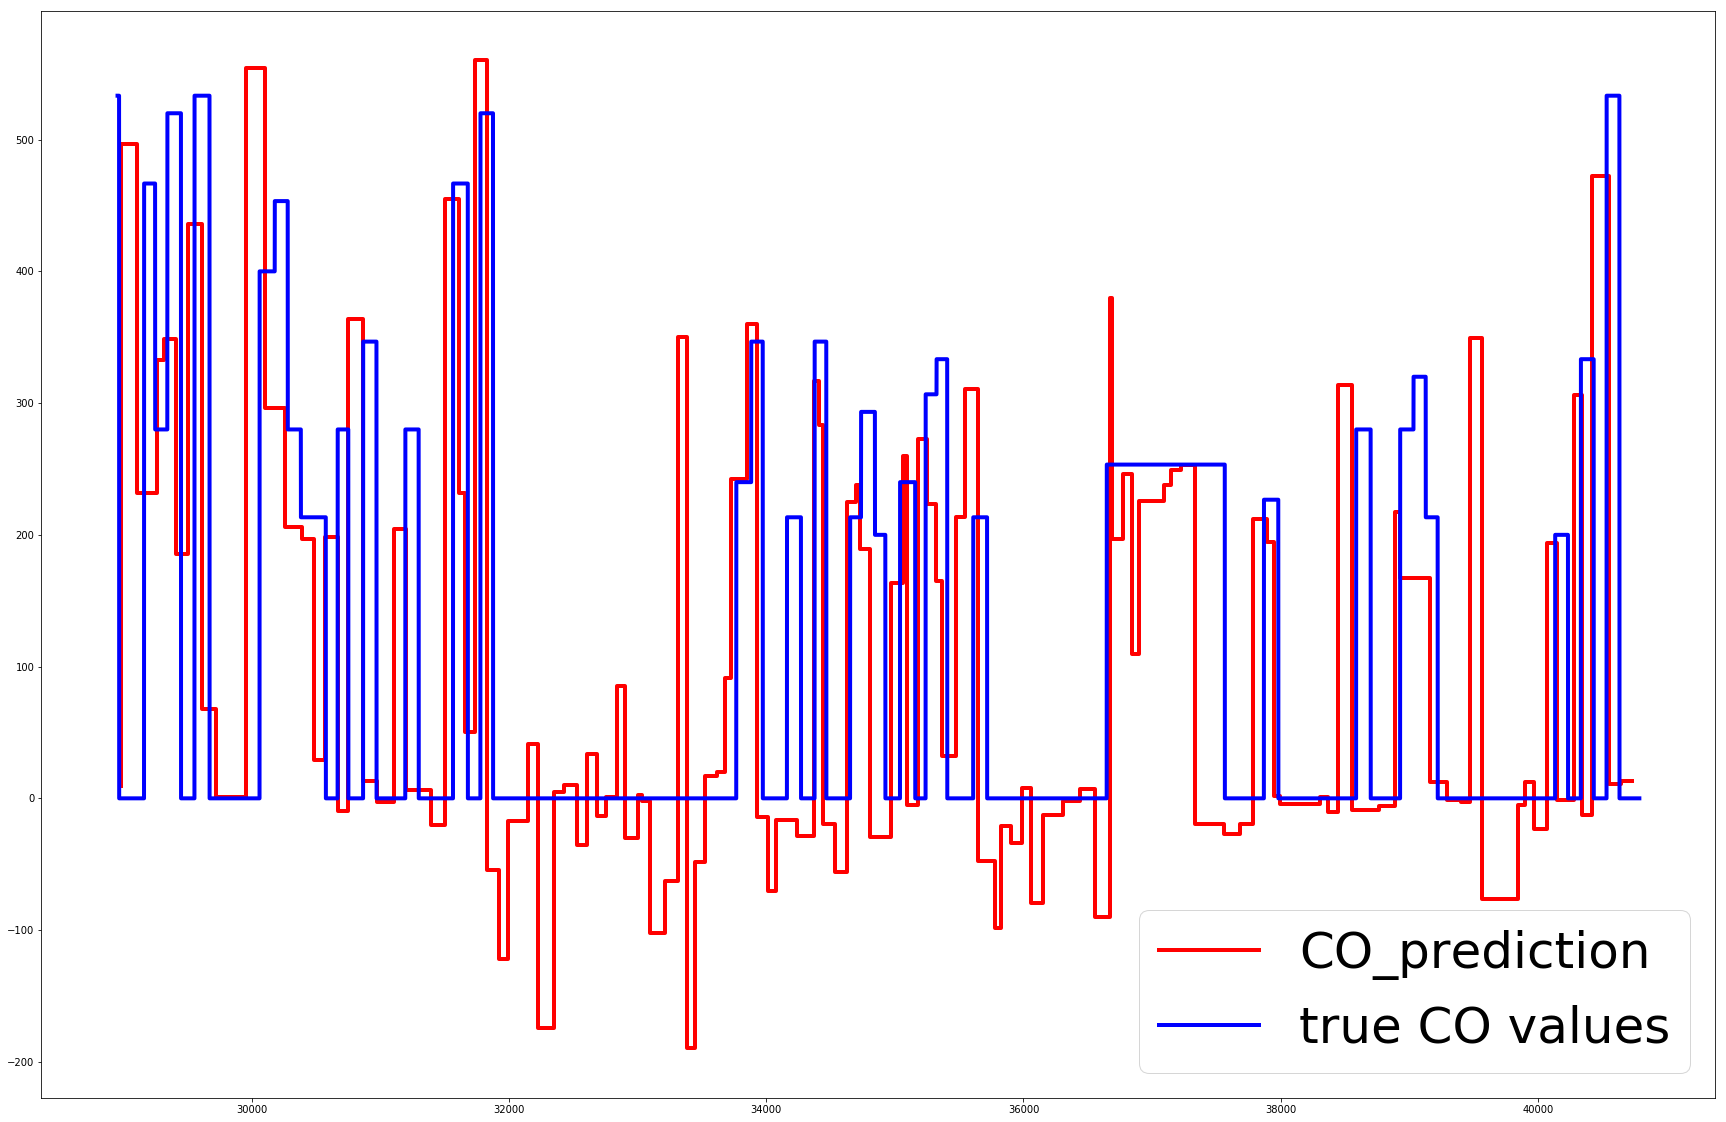

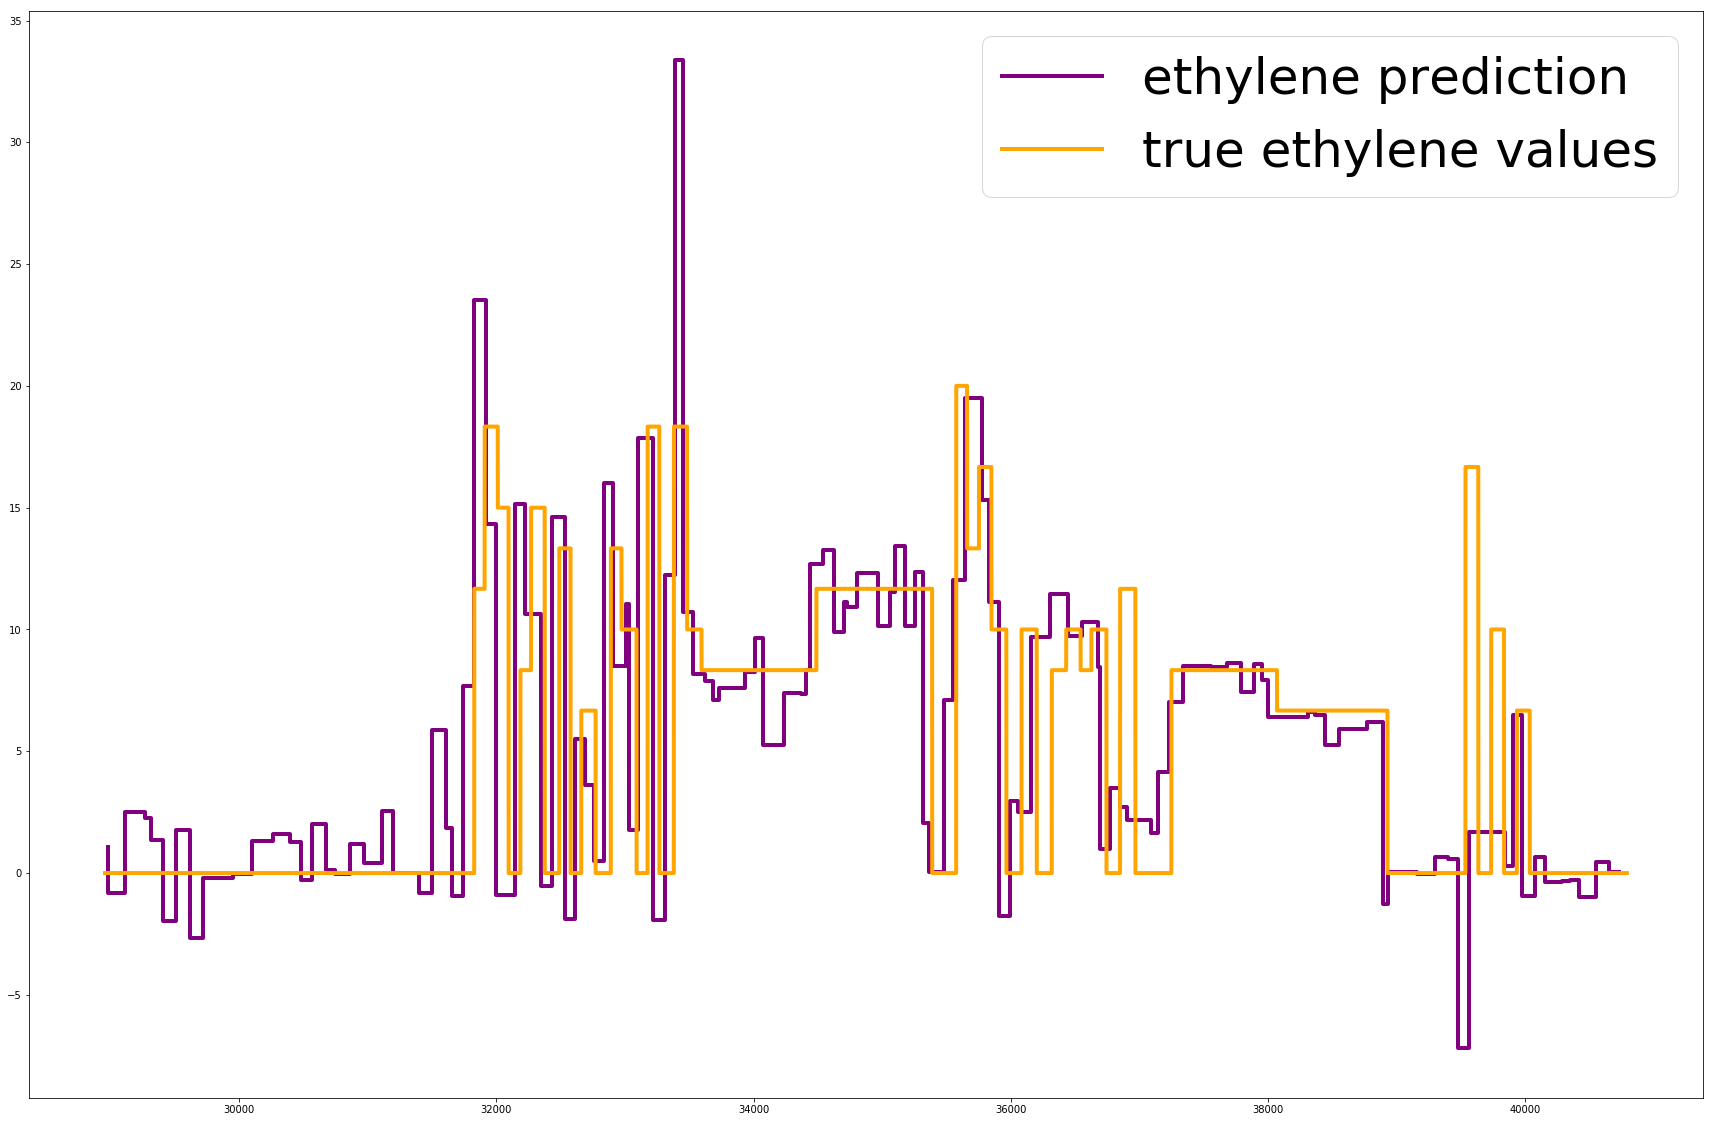

In [60]:
imp.reload(ima3m)

# Quick code to predict lasso and visualise

[co30,eth30]=ima3m.multi_lasso_plot(features_filtered,CO_response,eth_response,supress=True)

n=int(len(CO_response)*0.7) #70 % for training

ima3m.plot_to_original(co30,eth30,comb_change[n:],df_smooth)


# This looks pretty bad. It seems to be getting very confused when both gases are present.

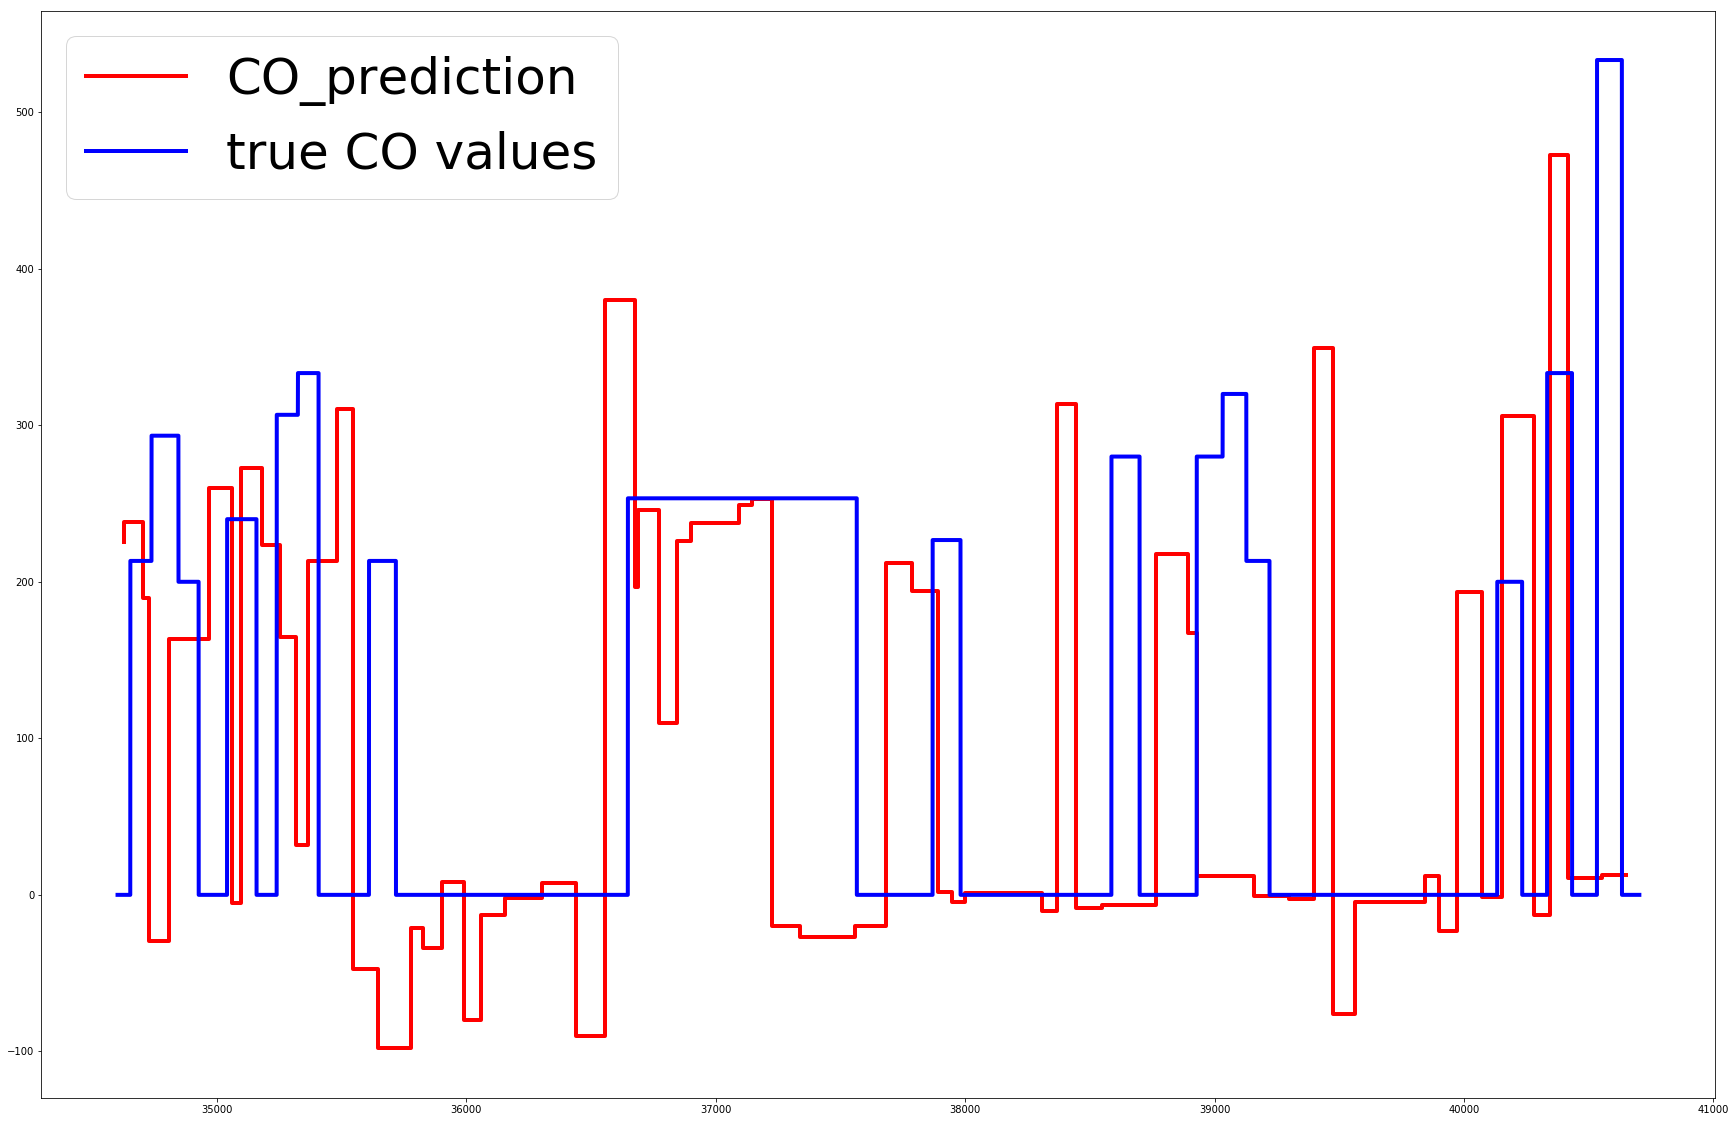

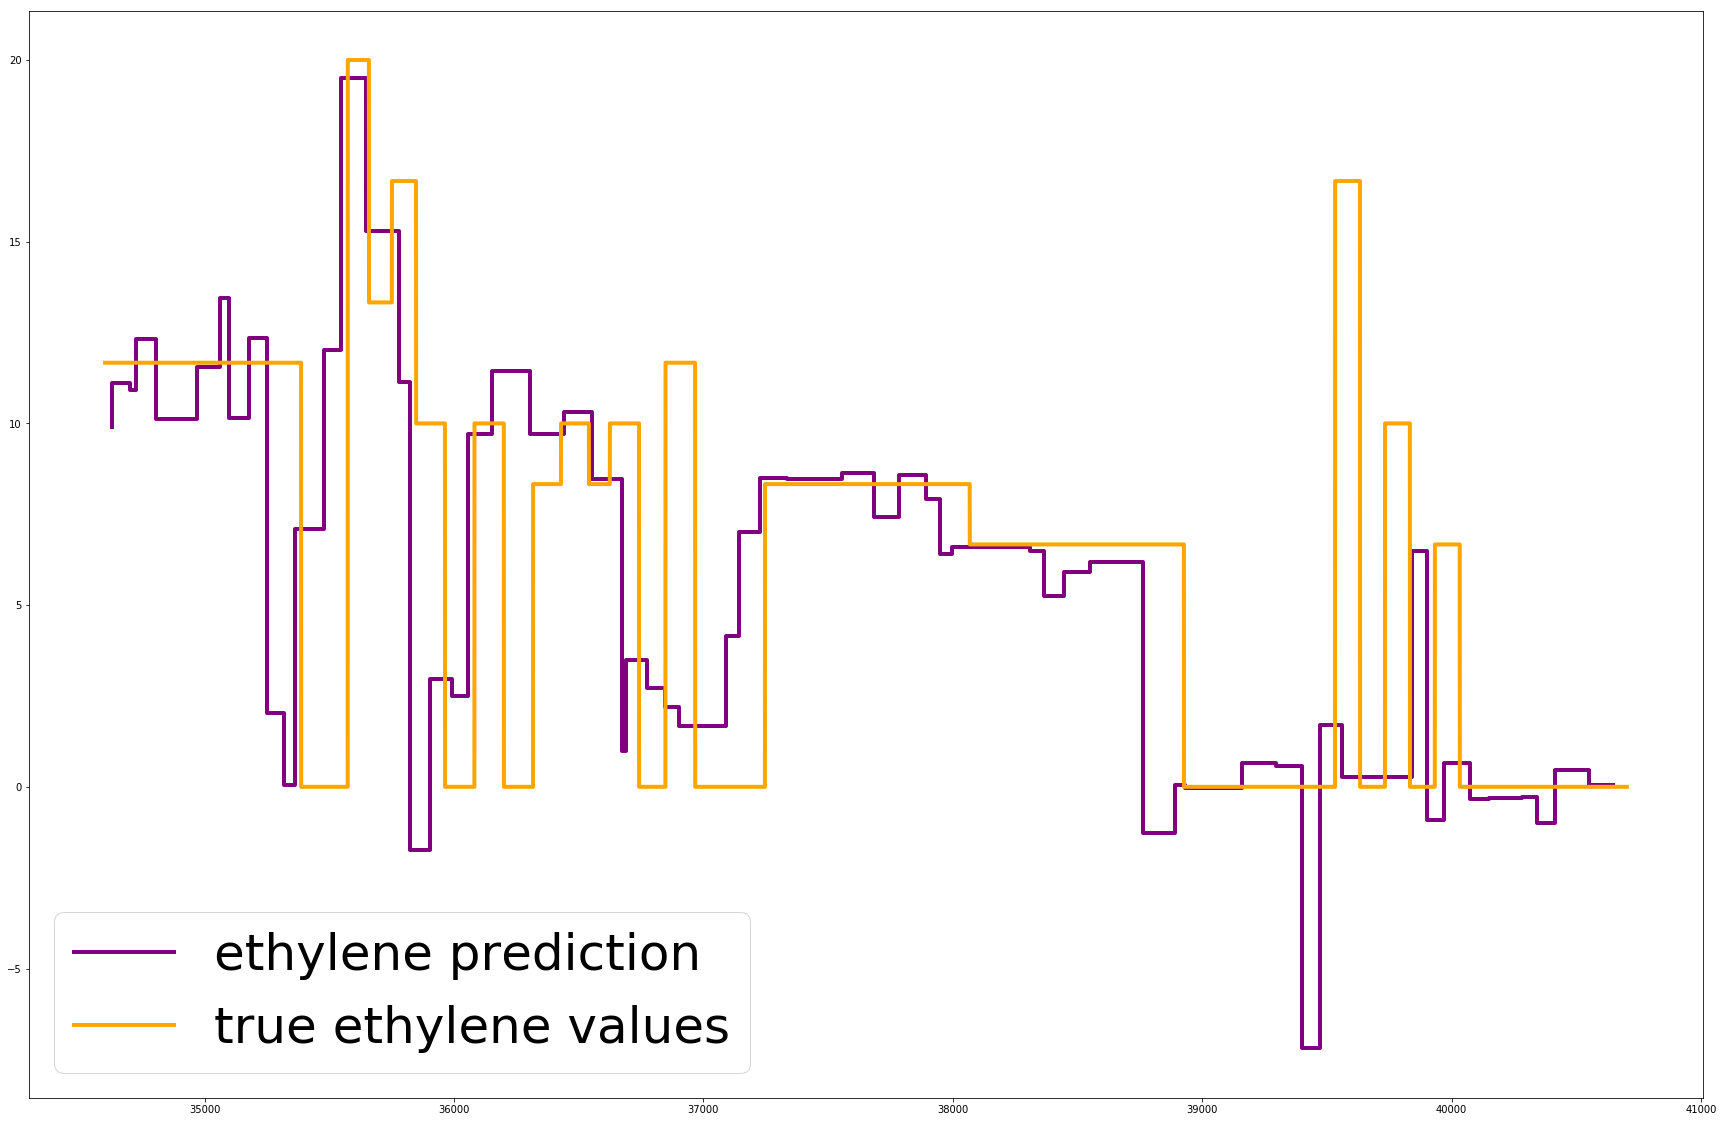

In [62]:
#### Let's zoom in a bit on the other half
n=int(len(CO_response)*0.85)
m=len(CO_response)

ima3m.plot_to_original(co30[n-m:],eth30[n-m:],comb_change[n-1:m],df_smooth)

This is not horrendous but certainly not satisfactory. The models seems to picking up on changes in the gas concentration but does not distringuish between the two gasses.

## July 24th, 2018

<font color='blue'> Update: </font> I ran SVR with 10 features and linear kernel the whole night and it still did not finish, so perhaps we should give up on that idea.

<font color='blue'> Tentative plan for today: </font>
- Ridge regression
- Elastic net
- Random forest regression
- Ridge+ Kernel

### Elastic net

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


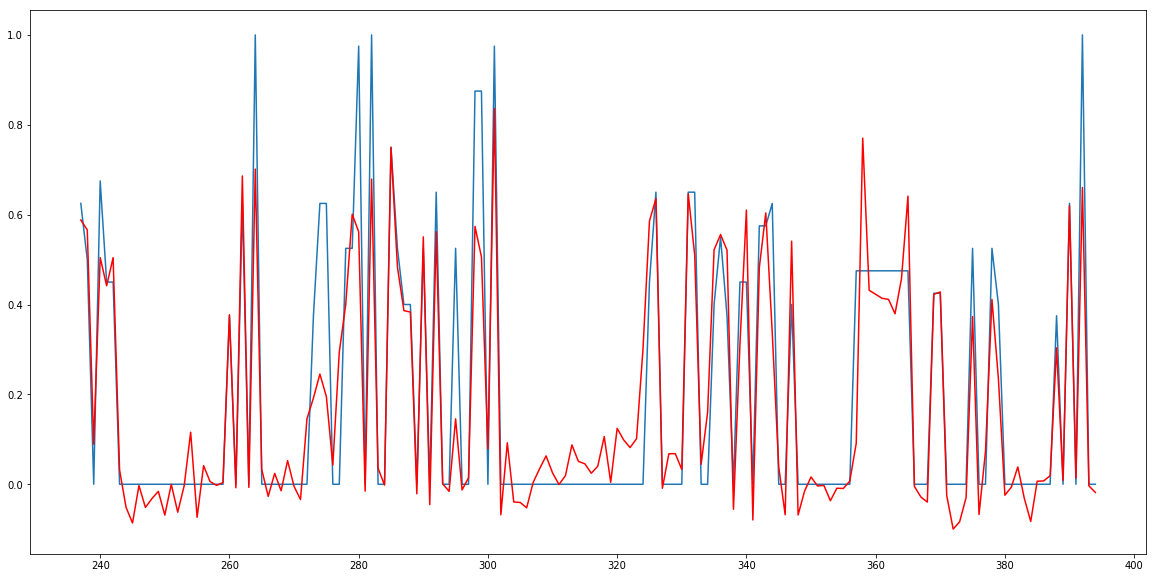

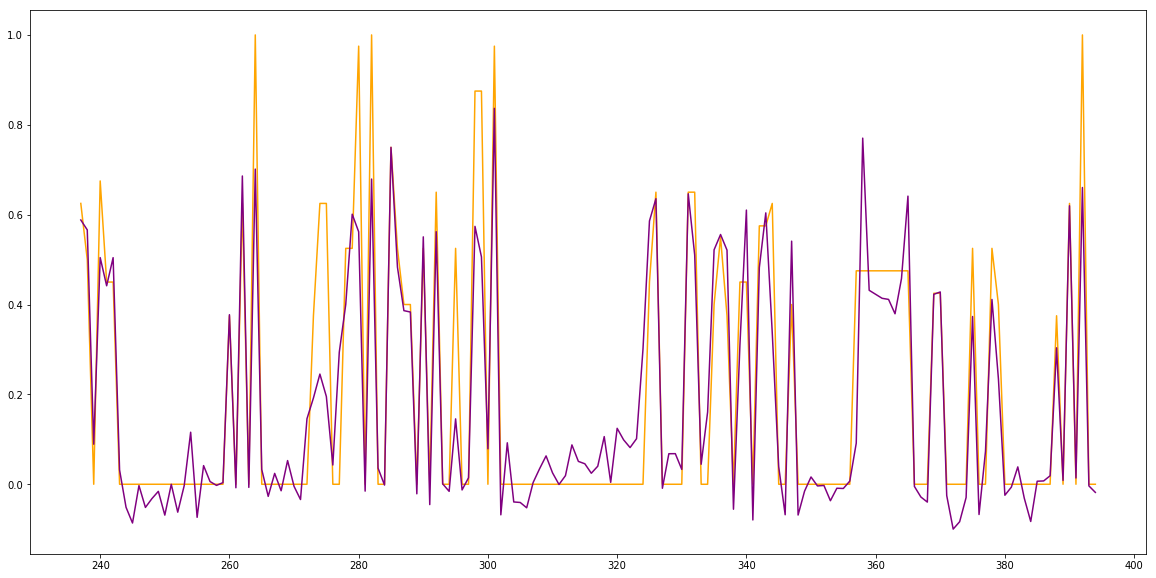

In [76]:
# Now let us try it with a lot of different feature selections

# All features
ima3m.elastic_net_plot(features_filtered, CO_response, eth_response,0.001)

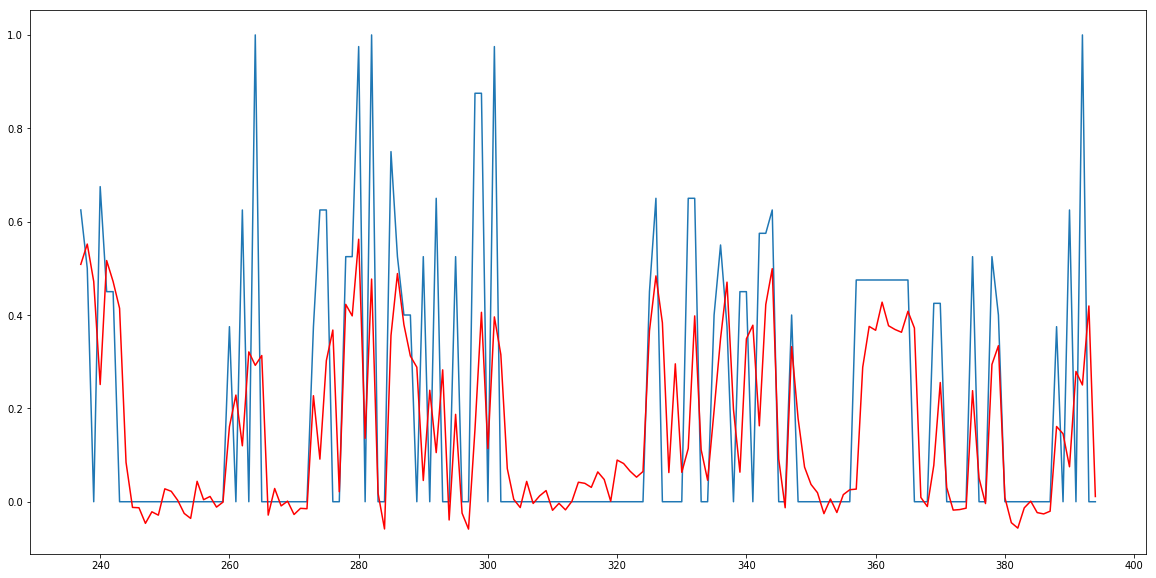

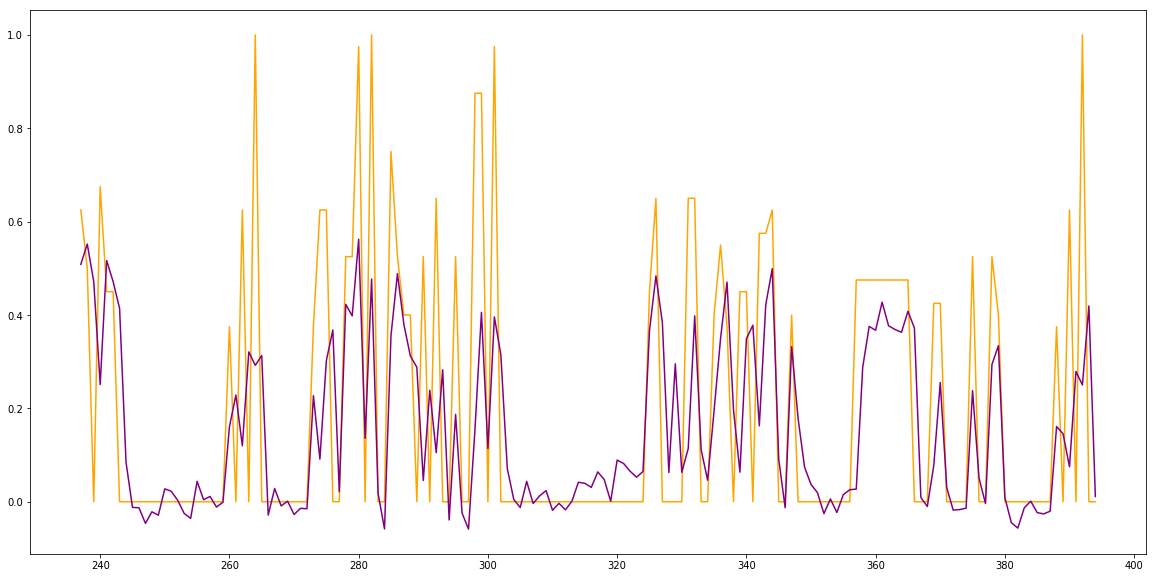

In [77]:
# 10 best features according to f test
# SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_new = SelectKBest(f_regression, k=10).fit_transform(features_filtered, CO_response)

ima3m.elastic_net_plot(X_new,CO_response,eth_response,0.001)

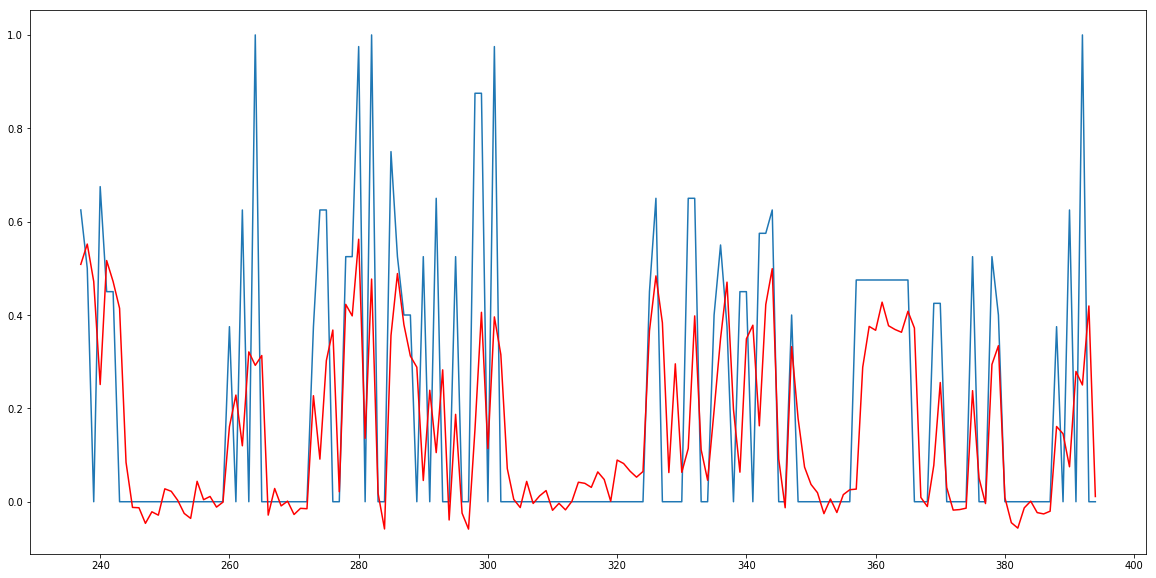

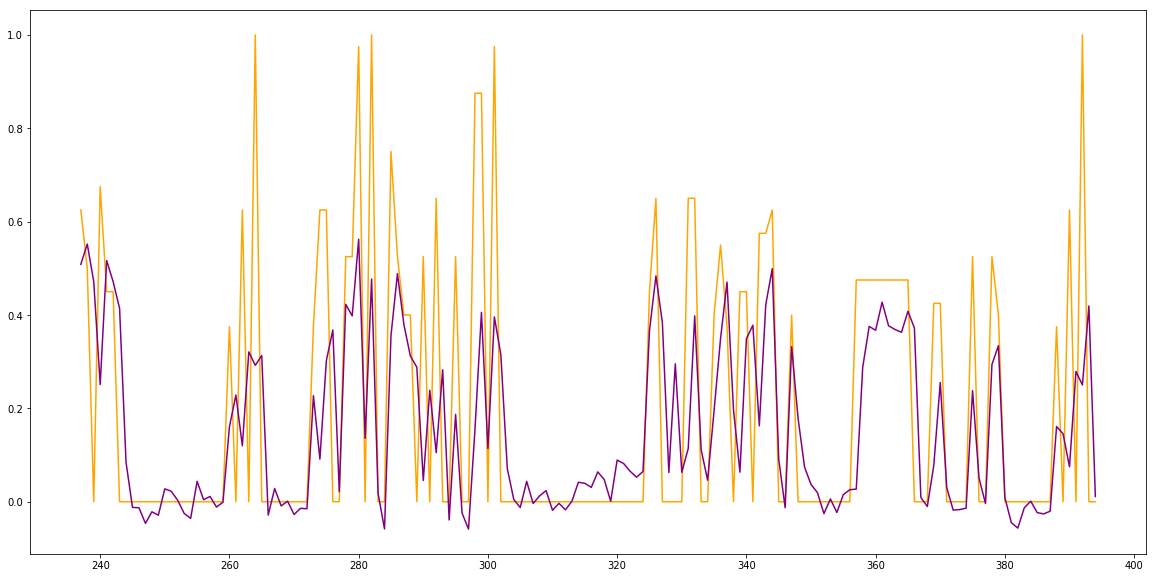

In [78]:
# 1000 best features according to f test
# SelectKBest

def SelectK(X,kappa):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression

    X_new = SelectKBest(f_regression, k=kappa).fit_transform(X, CO_response)
    return X_new
    
X_new=SelectK(features_filtered,10)

ima3m.elastic_net_plot(X_new,CO_response,eth_response,0.001)

<font color='blue'> Observation: </font> The number of features doesn't seem to affect the accuracry of this method

### Next: Random Tree Regression

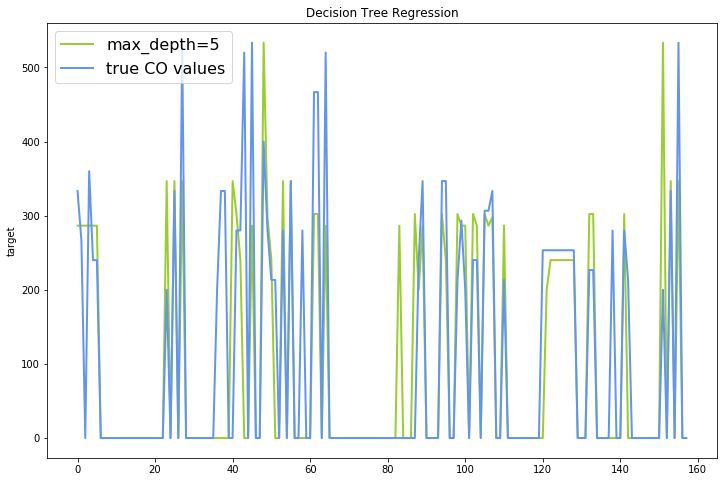

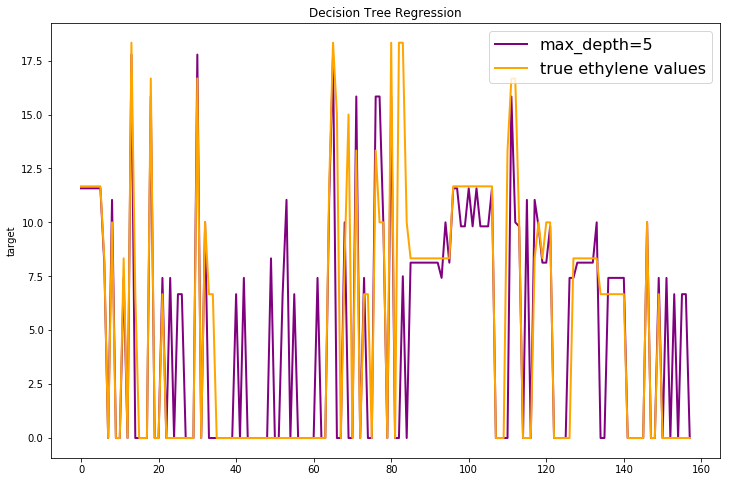

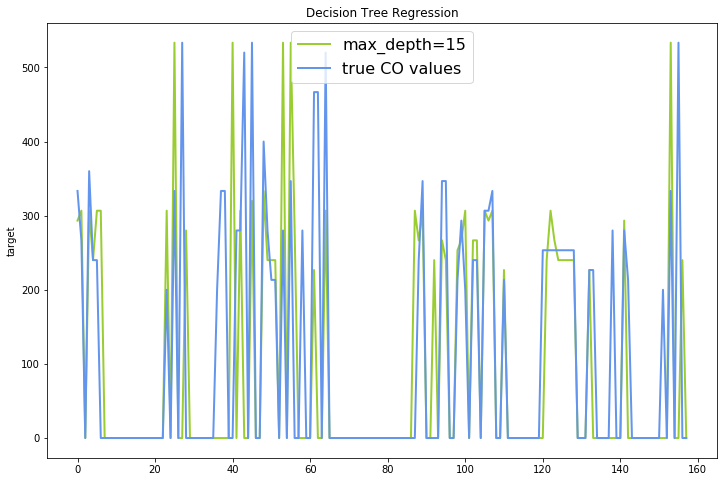

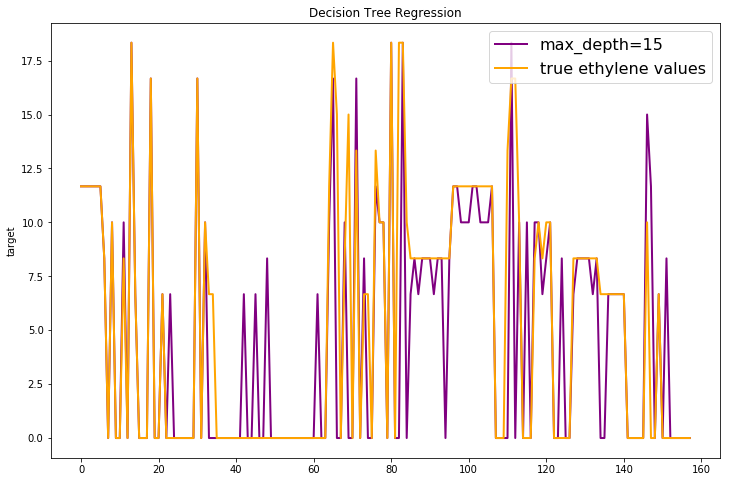

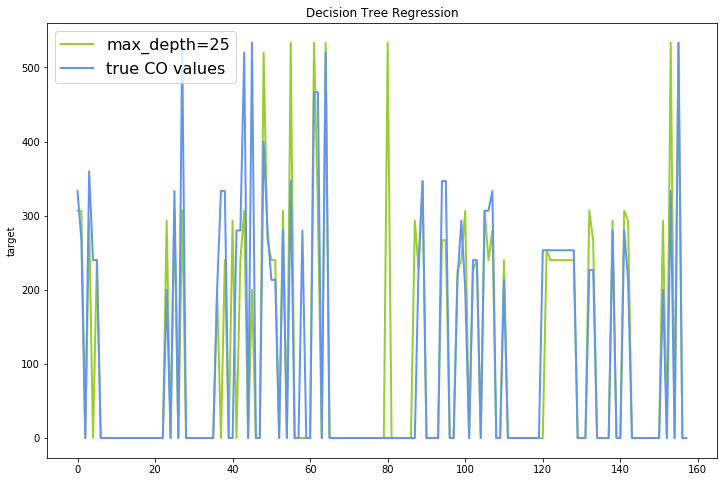

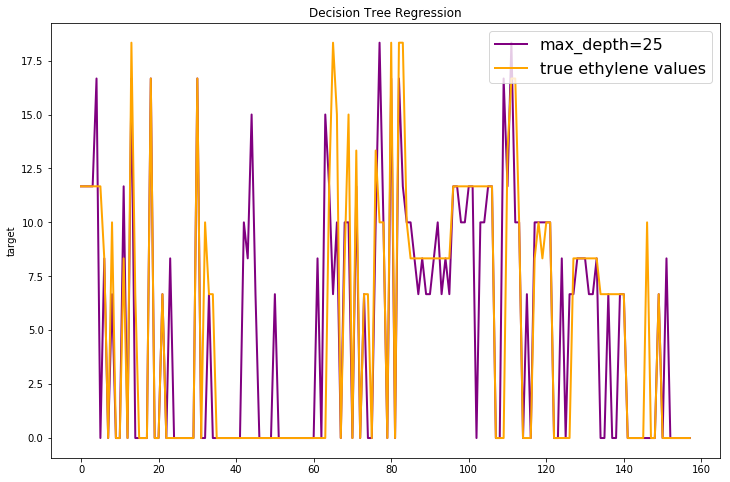

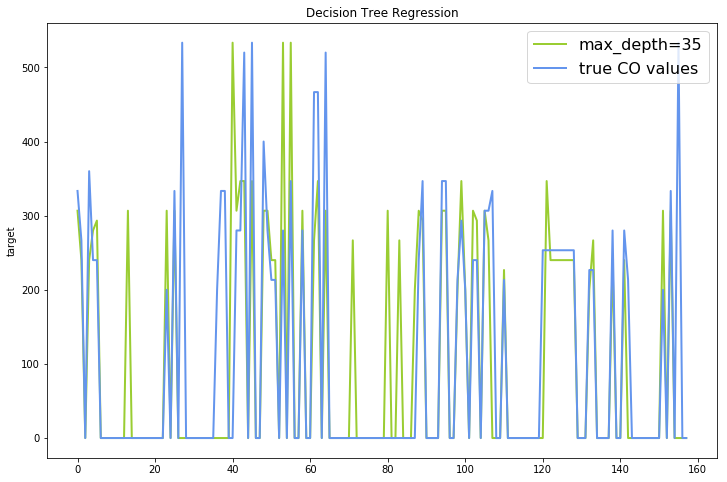

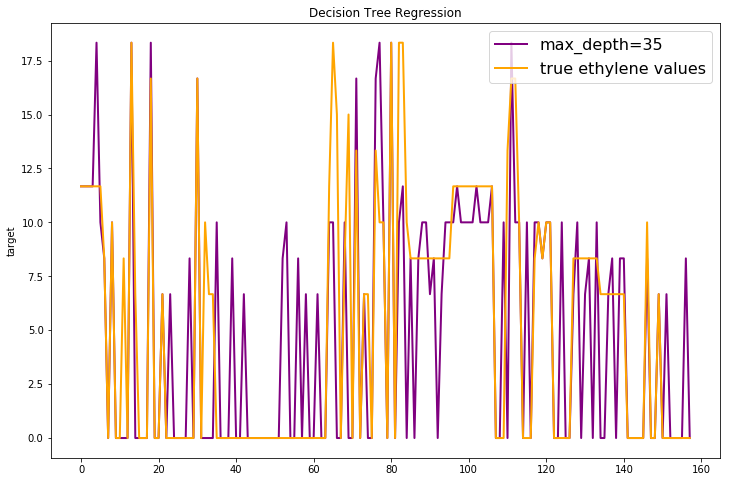

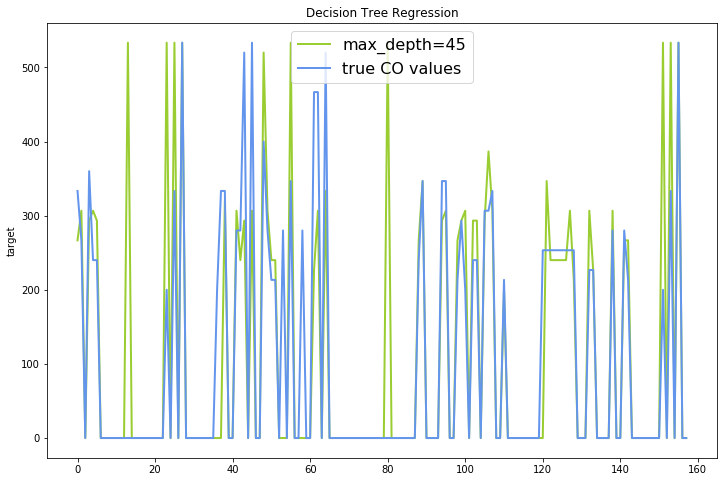

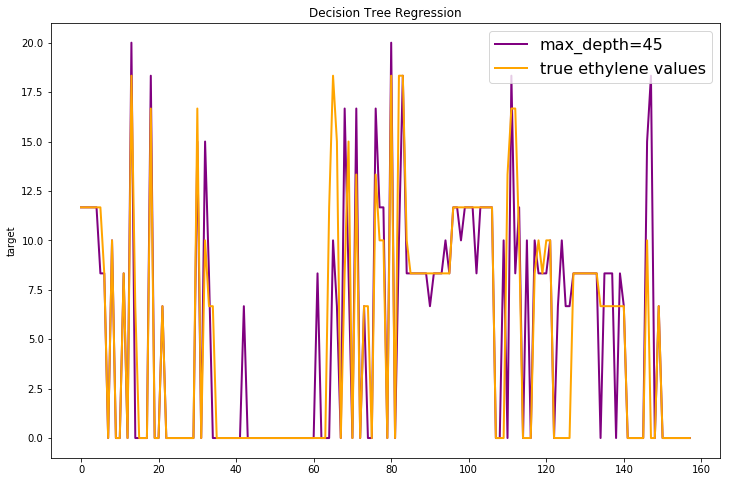

In [80]:
# Let's try a few different depths now
for i in range(1,10,2):
    ima3m.random_tree_plot(features_filtered,CO_response,eth_response,i*5,i)
    # From this we see that depth 15 is the best for CO. Ethylene is pretty bad.

\
\
## Random Forest Regression
\

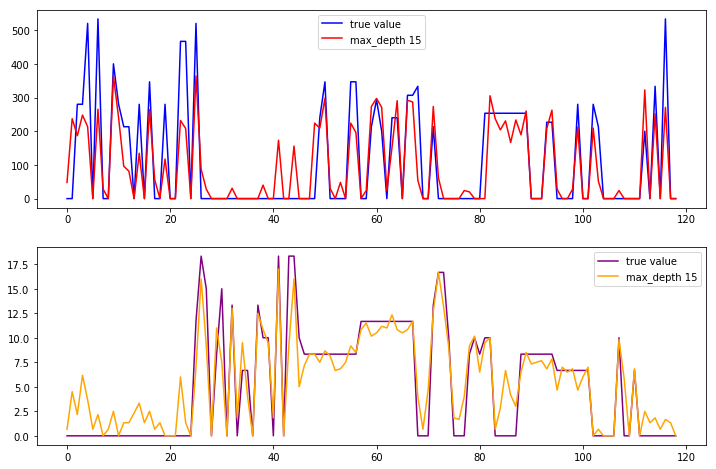

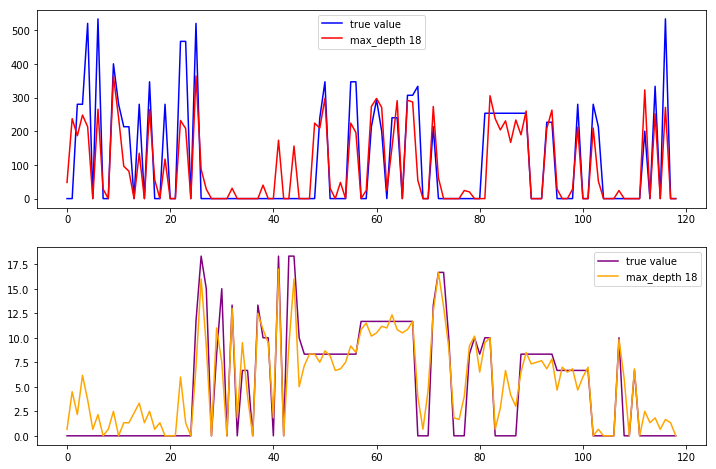

In [84]:
imp.reload(ima3m)

# Let's try this with different depths
for i in range(5,7):
    ima3m.random_forest_plot(features_filtered,CO_response,eth_response,i*3,i)

This doesn't look that bad, so let us visualise it in the original scale.

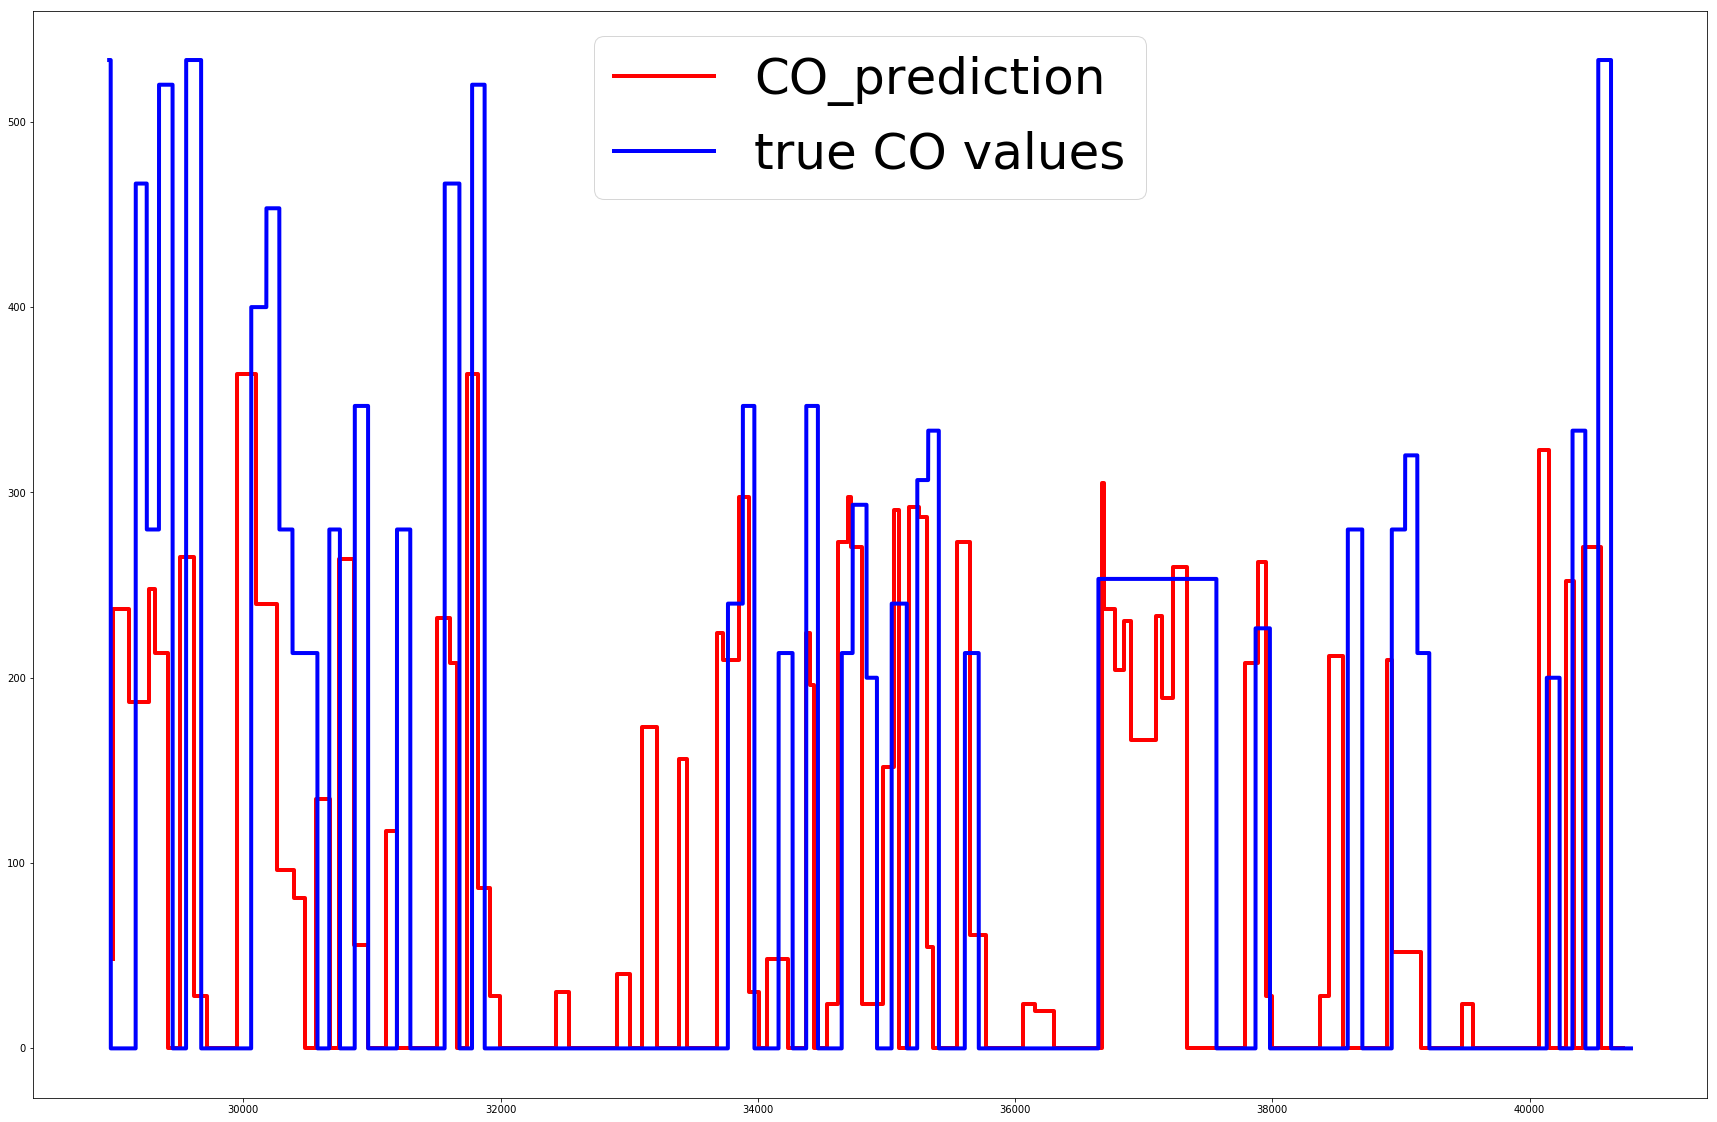

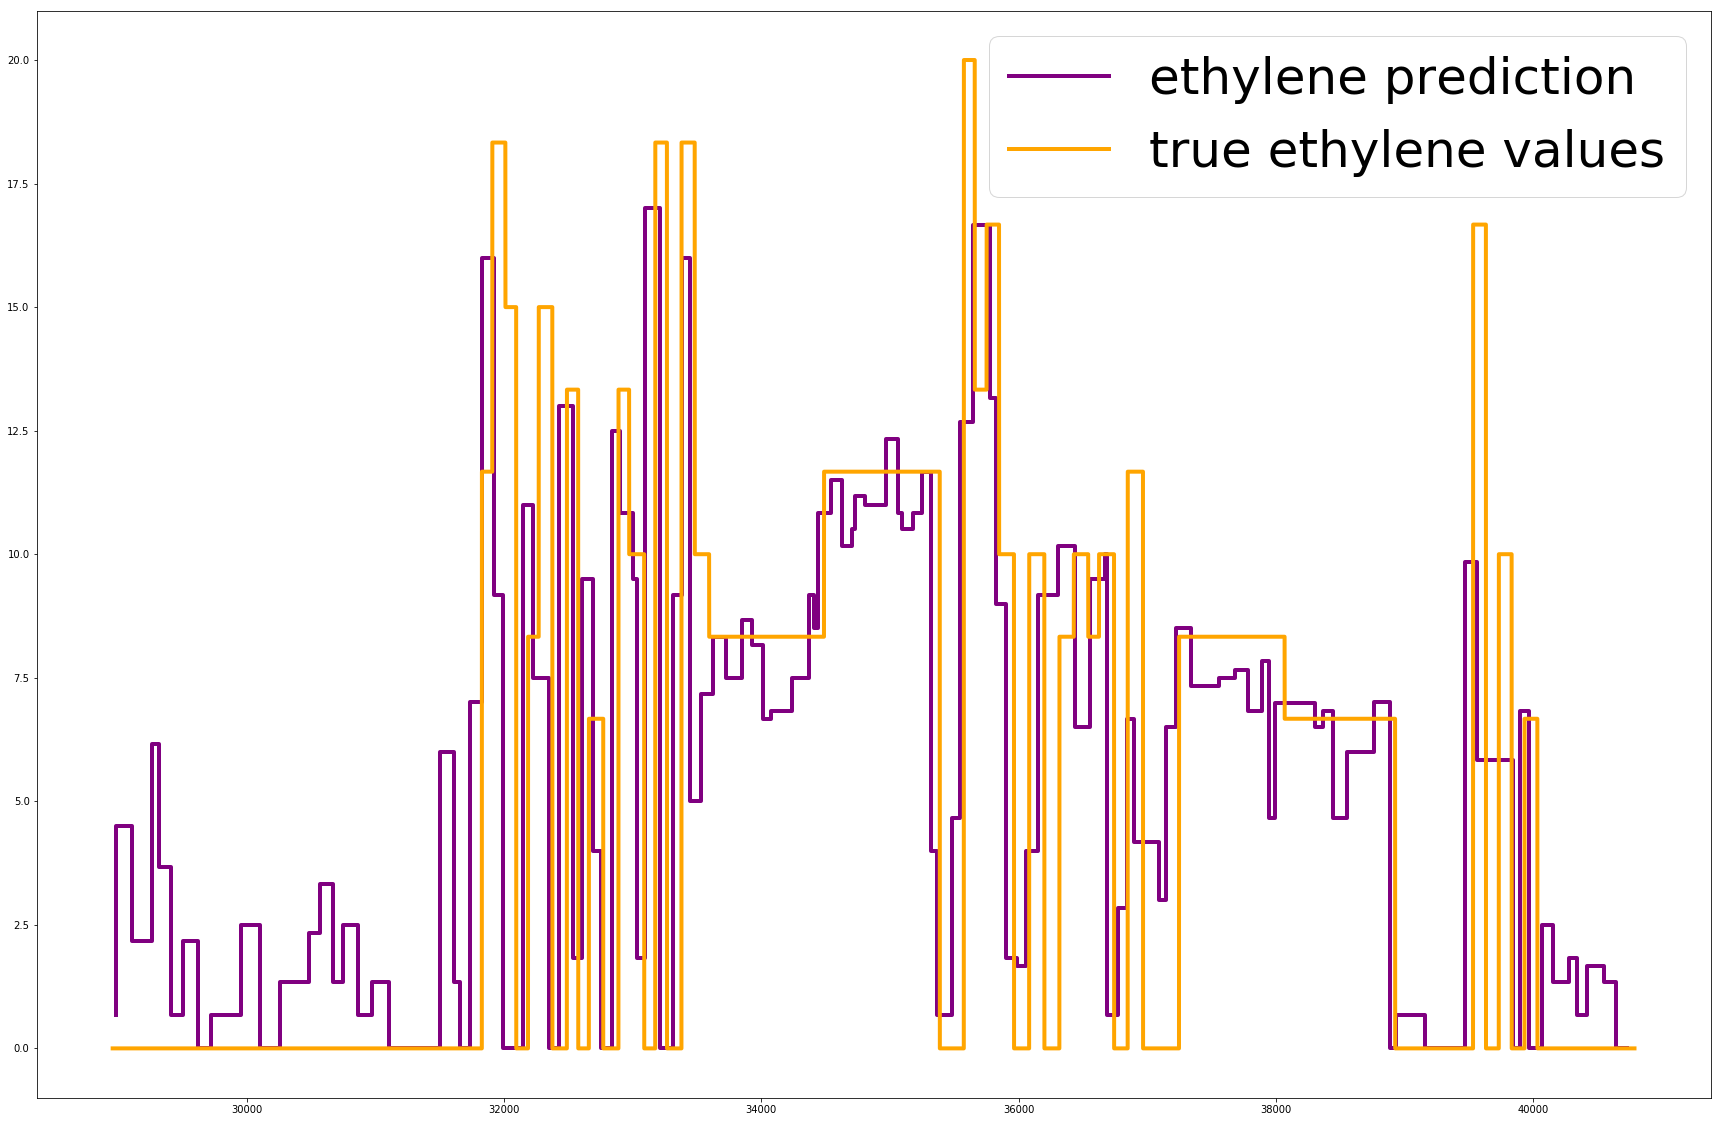

In [88]:
[co30,eth30]=ima3m.random_forest_plot(features_filtered,CO_response,eth_response,15,supress=True)
n=int(len(CO_response)*0.7)
ima3m.plot_to_original(co30,eth30,comb_change[n:],df_smooth)

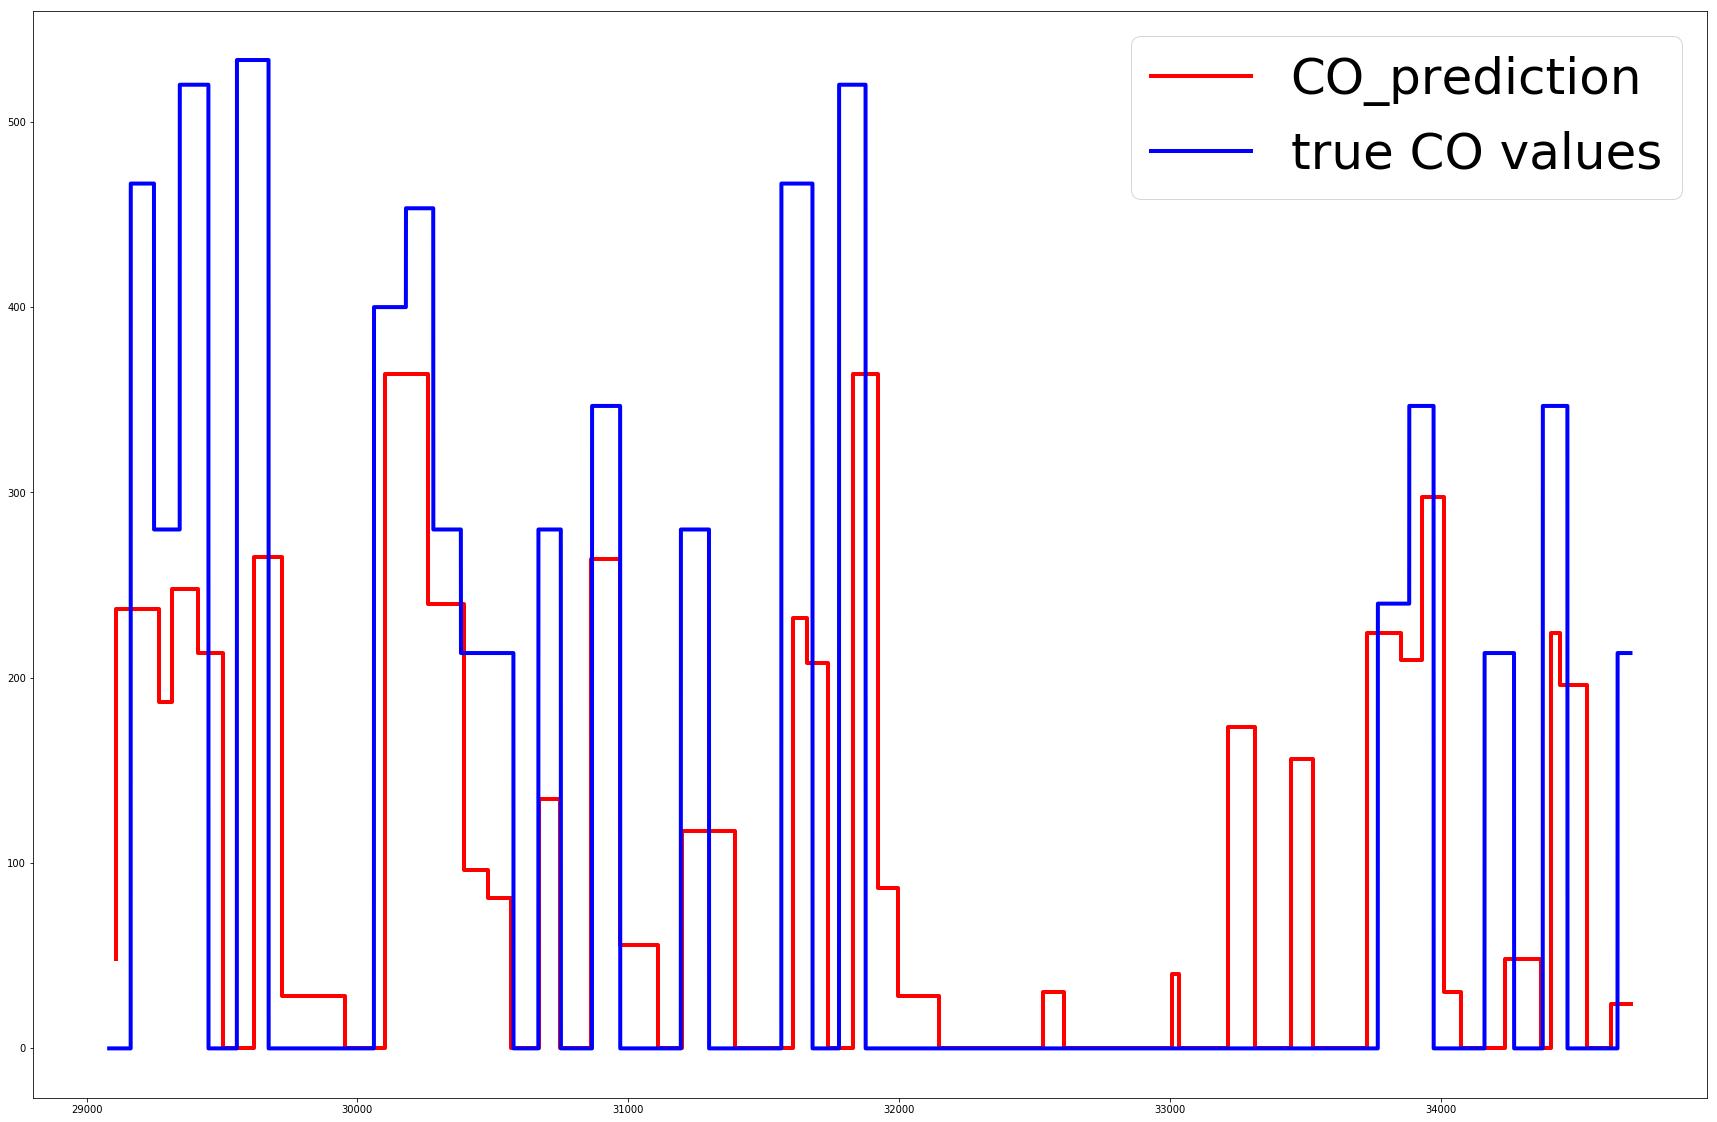

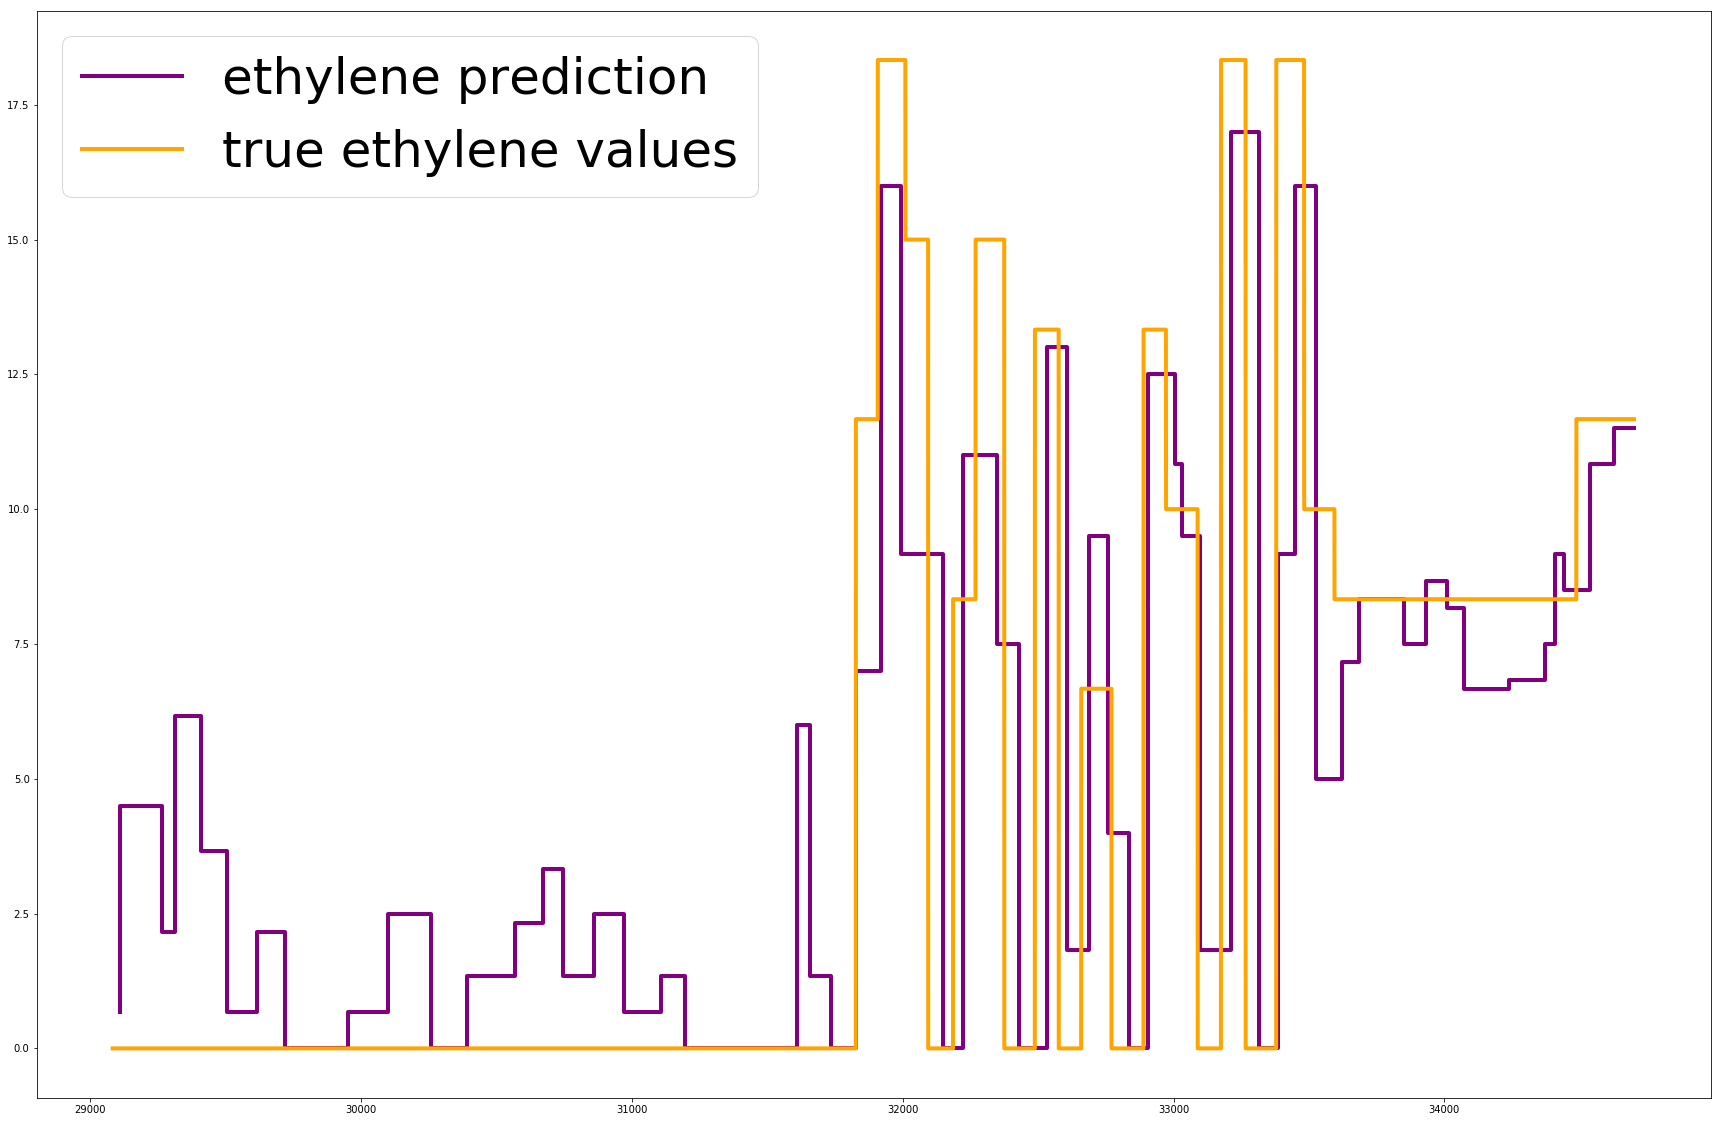

In [91]:
# Zoom in

n=int(len(comb_change)*0.7)
m=int(len(comb_change)*0.85)
ima3m.plot_to_original(co30[:m-n],eth30[:m-n],comb_change[n:m+1],df_smooth)

### Kernel Ridge

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


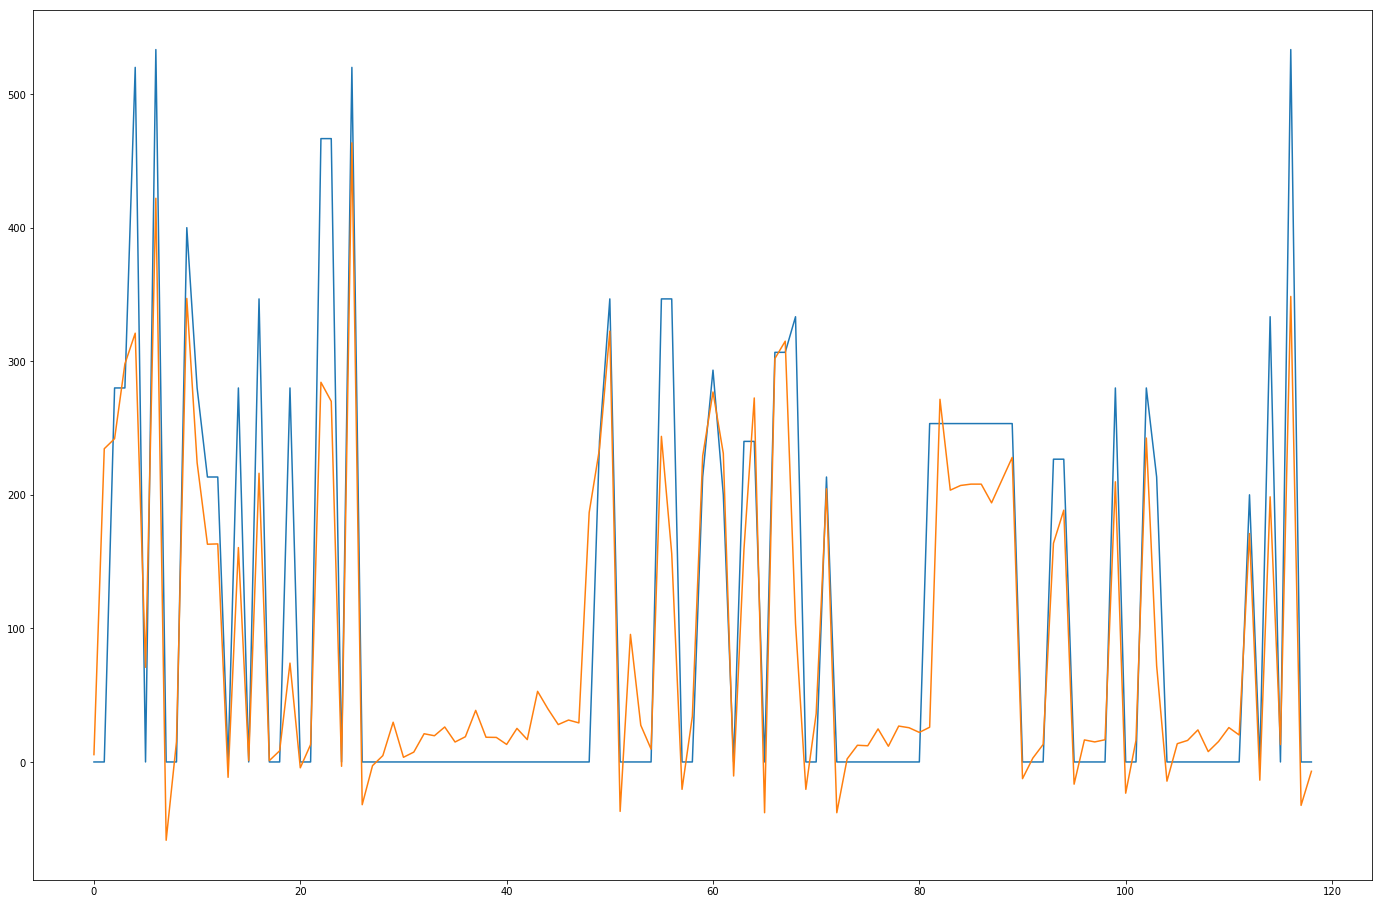

In [97]:
ima3m.kernel_ridge_plot(X,CO_response) #linear kernel

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


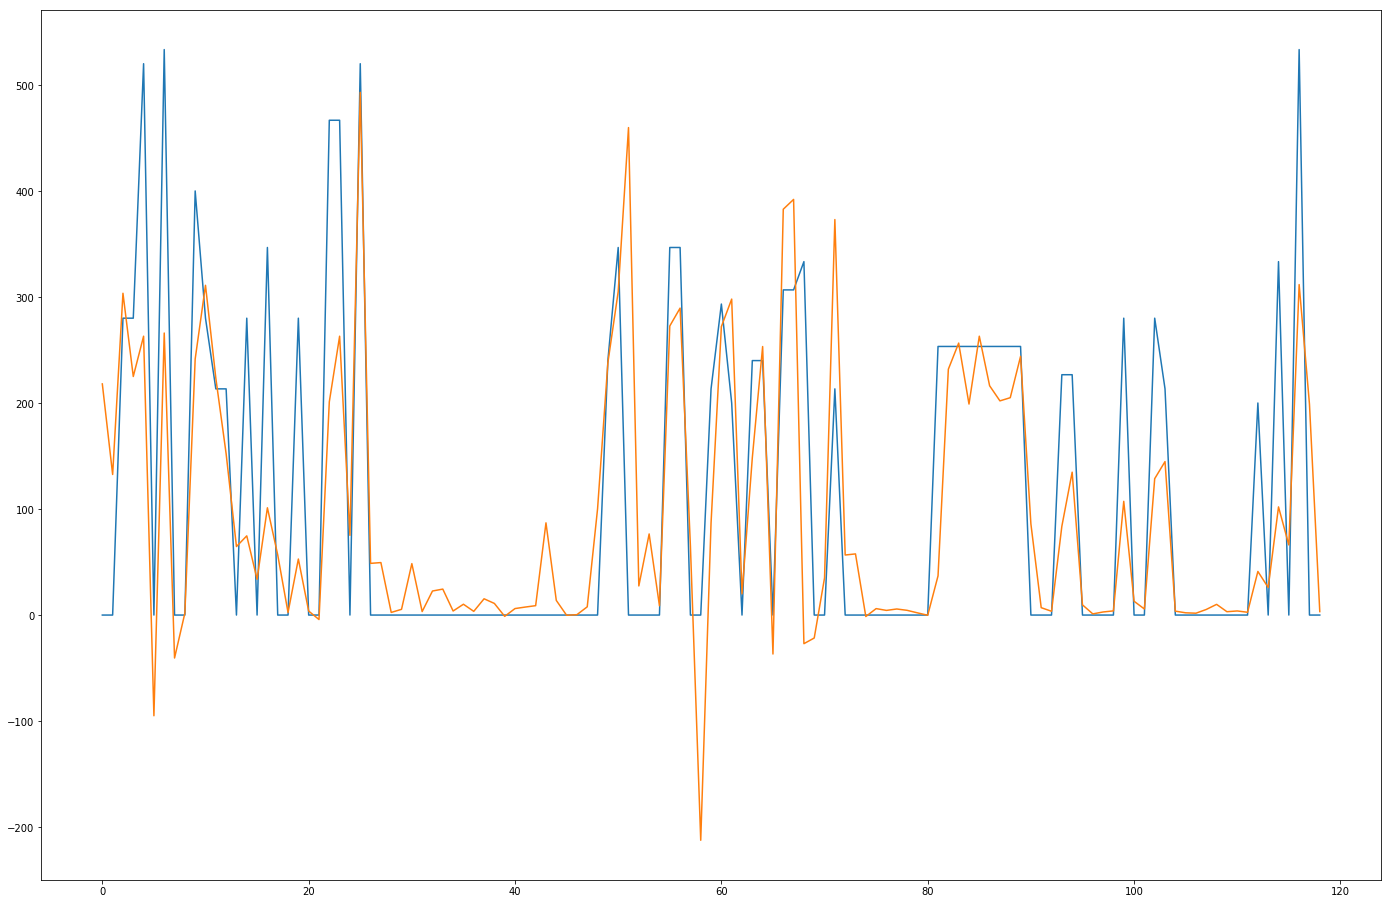

In [99]:
# polynomial kernel
ima3m.kernel_ridge_plot(X,CO_response,'poly')

## Conclusions:
1. We can detect change-points fairly well (with a lag of 25~26 seconds). However, we do pick up extra change-points due to the other gas (cannot distinguish between types of change-points)
2. All of these methods fail to incorporate the dependancy of the two response variables (ethylene and CO) and thus, for a method like this to work, we most likely need a different model.
3. Note that we also tried machine learning with just the linear regression coefficients and got unsatisfactory results for those as well.

Cf. below for examples.

C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Michelle Pin\Anaconda3\envs\ima\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


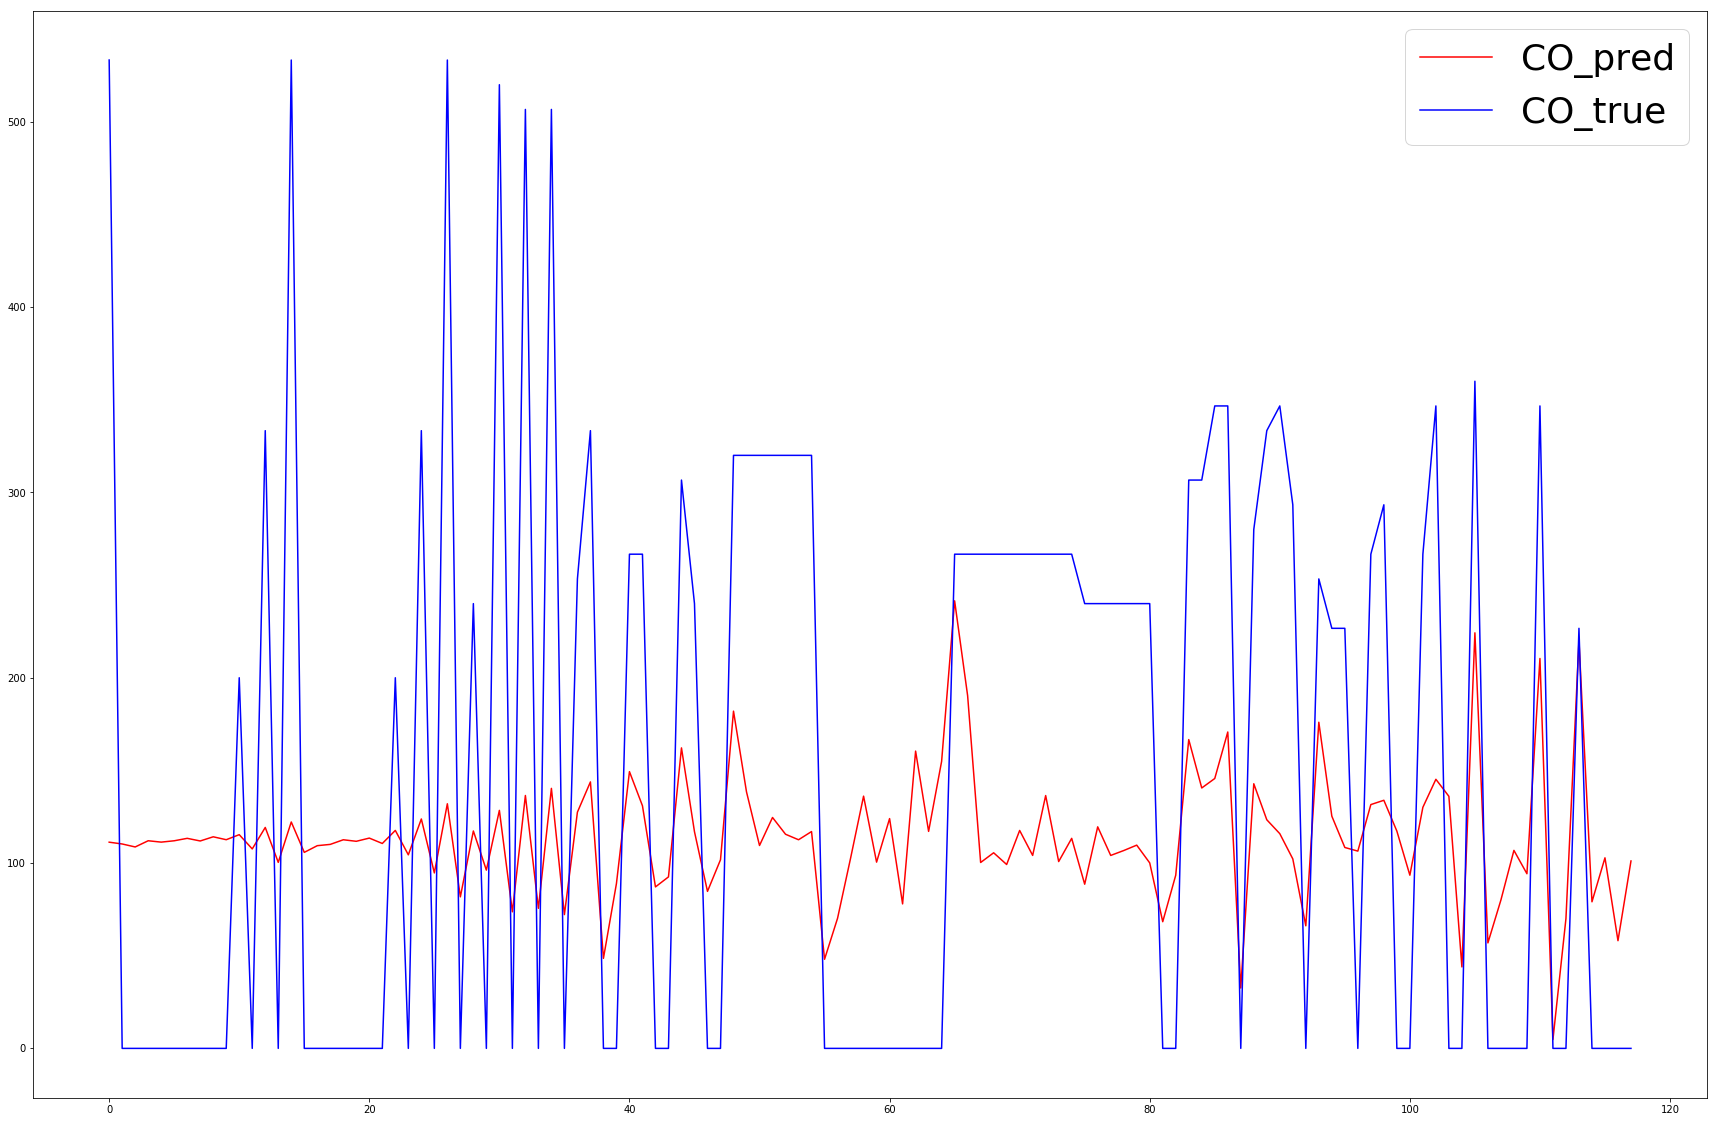

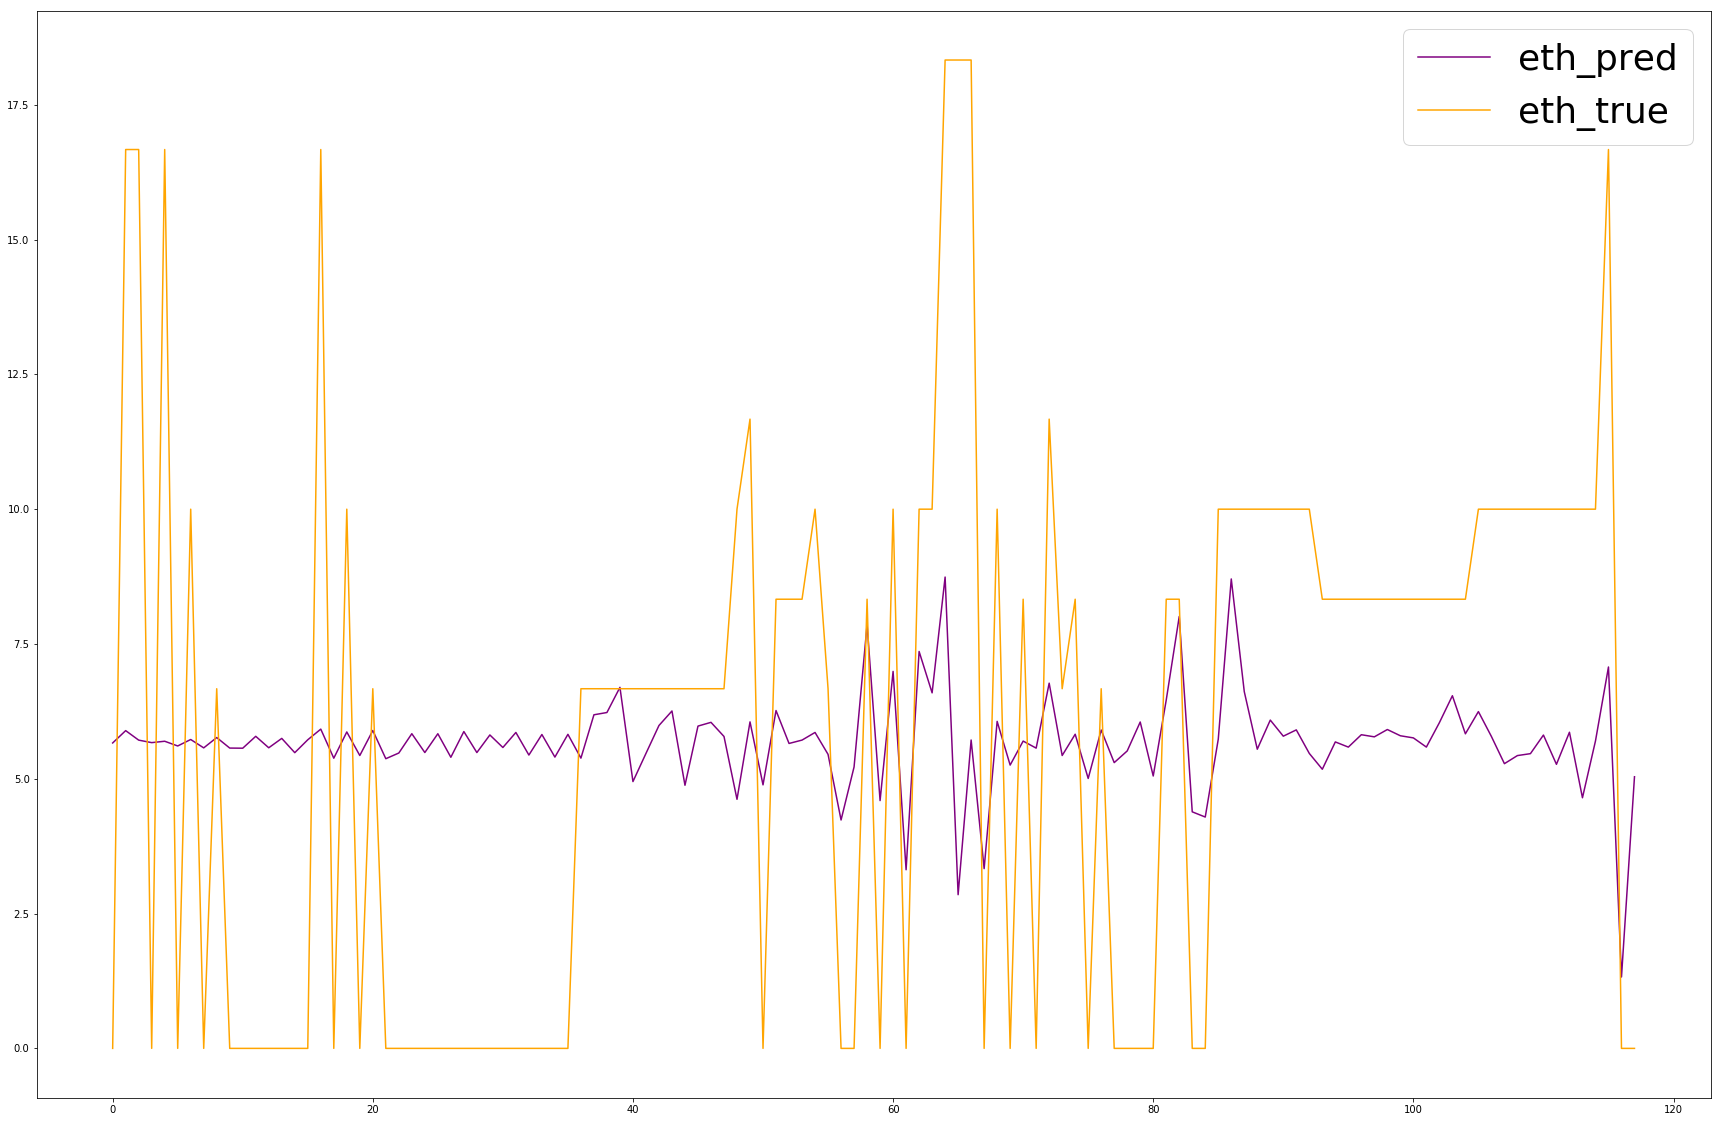

[[533.33,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  200.0,
  0.0,
  333.33,
  0.0,
  533.33,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  200.0,
  0.0,
  333.33,
  0.0,
  533.33,
  0.0,
  240.0,
  0.0,
  520.0,
  0.0,
  506.67,
  0.0,
  506.67,
  0.0,
  253.33,
  333.33,
  0.0,
  0.0,
  266.67,
  266.67,
  0.0,
  0.0,
  306.67,
  240.0,
  0.0,
  0.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  320.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  266.67,
  240.0,
  240.0,
  240.0,
  240.0,
  240.0,
  240.0,
  0.0,
  0.0,
  306.67,
  306.67,
  346.67,
  346.67,
  0.0,
  280.0,
  333.33,
  346.67,
  293.33,
  0.0,
  253.33,
  226.67,
  226.67,
  0.0,
  266.67,
  293.33,
  0.0,
  0.0,
  266.67,
  346.67,
  0.0,
  0.0,
  360.0,
  0.0,
  0.0,
  0.0,
  0.0,
  346.67,
  0.0,
  0.0,
  226.67,
  0.0,
  0.0,
  0.0,
  0.0],
 array([111.2678681

In [101]:
ima3m.lasso_plot(lin_df,CO_response, eth_response)

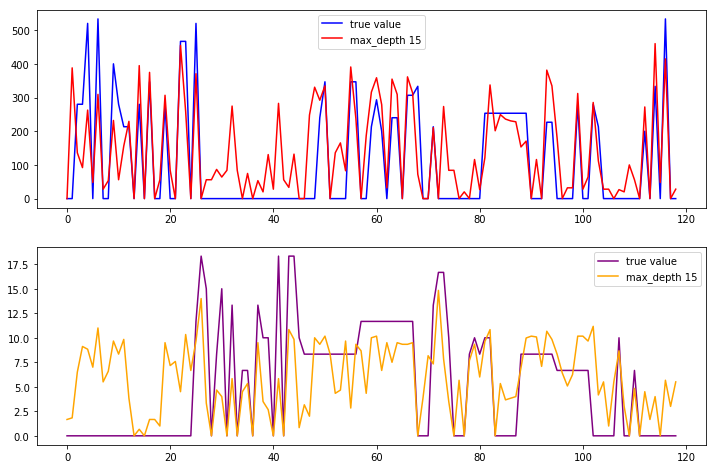

[array([  0.   , 387.999, 136.   ,  92.001, 262.668,  48.   , 309.333,
         28.   ,  53.334, 232.   ,  56.   , 156.   , 229.335,   0.   ,
        394.665,   0.   , 374.665,   0.   ,  56.   , 306.668,  84.   ,
          0.   , 454.665, 258.667,   0.   , 370.667,   0.   ,  56.   ,
         56.   ,  86.666,  64.   ,  84.   , 274.666,  84.   ,   0.   ,
         74.667,   0.   ,  53.333,  20.   , 130.668,  28.   , 282.667,
         56.   ,  33.333, 132.001,   0.   ,   0.   , 248.001, 330.667,
        292.001, 334.668,   0.   , 136.   , 165.334,  82.667, 390.665,
        237.335,   0.   , 186.668, 315.999, 358.668, 278.668,  32.   ,
        354.666, 309.334,   0.   , 361.332, 313.335,  72.   ,   0.   ,
          0.   , 210.666,   0.   , 273.335,  84.   ,  84.   ,   0.   ,
         20.   ,   0.   , 116.001,  26.667, 121.333, 337.334, 201.335,
        249.335, 236.001, 230.667, 228.002, 153.334, 170.666,   0.   ,
        116.   ,   0.   , 381.333, 334.668, 180.   ,   0.   ,  32.   ,
      

In [103]:
ima3m.random_forest_plot(lin_df,CO_response, eth_response,15)